<div style="color:white;display:fill;border-radius:8px;
            background-color:#a7d5ed;font-size:170%;
            font-family:Nexa;letter-spacing:4.5px;">    
    <h1 style="padding:15px;color:black;text-align: center"> Ponto de partida (EDA) </h1> 
</div>

![](img/header.png?t=2021-04-09-00-57-05)

A edição agosto do <b>Tabular Playgroud Series de 2022</b> é  uma oportunidade para ajudar a empresa fictícia <b>Keep It Dry</b> a melhorar seu principal produto <b>Super Soaker</b>, o produto é usado em fábricas para absorver derramamentos e vazamentos.

A empresa acaba de concluir um grande estudo de teste para diferentes protótipos de produtos,  podemos usar esses dados para construir um modelo que prevê falhas do produto? Esse é o grande desafio. 


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> OBJETIVO </h1>    
</div>

Neste notebook vamos fazer uma análise (EDA) para conhencer os dados e estabelecer uma linha de base, mostrarei as etapas iniciais de uma competição do Kaggle - desde a compreensão do conjunto de dados até a preparação dos dados para serem usados em um modelo machine learning. Vamos passar pelas seguintes tarefas:

- Leitura no conjunto de dados
- Calculando estatísticas sobre o conjunto de dados
- Visualização univariada
- Visualizando multivariada
- Pré-processamento 




---

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 1. IMPORTAÇÕES </h1>    
</div>

## 1.1. Instalações

In [1]:
# https://pub.towardsai.net/use-google-colab-like-a-pro-39a97184358d
COLAB = 'google.colab' in str(get_ipython()) 

if COLAB:        
    !pip install --q scikit-plot
    !pip install --q category_encoders
    !pip install --q shap
    !pip install --q inflection    
    !pip install --q catboost
    #!pip install --q optbinning
    #!pip install --q catboost
    #!pip install --q pandas-profiling
    #!pip install --q pycaret
        
    from google.colab import drive
    drive.mount('/content/drive')

## 1.2. Bibliotecas 

In [2]:
import warnings
import random
import os
import gc
import torch
import sklearn.exceptions
import datetime
import multiprocessing

In [3]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt 
import seaborn           as sns
import joblib            as jb
import scipy.stats       as stats
import plotly.express    as px
import scikitplot        as skplt
import plotly.graph_objs as go
import xgboost           as xgb
import category_encoders as ce

In [874]:
from matplotlib.axes._axes      import _log as matplotlib_axes_logger
from sklearn.model_selection    import train_test_split, KFold, StratifiedKFold, GroupKFold, GridSearchCV
from sklearn.model_selection    import StratifiedShuffleSplit
from sklearn.preprocessing      import StandardScaler, MinMaxScaler, FunctionTransformer, MaxAbsScaler
from sklearn.preprocessing      import PowerTransformer, RobustScaler, Normalizer, PolynomialFeatures
from sklearn.preprocessing      import QuantileTransformer, LabelEncoder, OneHotEncoder, KBinsDiscretizer
from category_encoders          import TargetEncoder
from sklearn.metrics            import roc_auc_score, f1_score, log_loss, roc_curve, auc, brier_score_loss
from sklearn.metrics            import classification_report, confusion_matrix, precision_score

In [5]:
from sklearn.compose            import ColumnTransformer, make_column_transformer
from sklearn.pipeline           import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_selection  import VarianceThreshold
from sklearn.impute             import SimpleImputer
from scipy.stats                import chi2_contingency
from plotly.subplots            import make_subplots

In [6]:
from imblearn.over_sampling     import SMOTE
from imblearn.under_sampling    import RandomUnderSampler

In [7]:
from sklearn.base               import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn                    import calibration as skc, linear_model as sklm
from sklearn.feature_selection  import SelectPercentile, VarianceThreshold, f_classif
from sklearn.calibration        import calibration_curve #, CalibratedClassifierCV,

In [8]:
from sklearn.ensemble           import RandomForestClassifier
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.linear_model       import RidgeClassifier, Ridge, LogisticRegression
from lightgbm                   import LGBMClassifier, early_stopping
from catboost                   import CatBoostClassifier
from sklearn.ensemble           import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes        import GaussianNB

In [9]:
from sklearn                    import set_config 
from sklearn.utils              import estimator_html_repr 
from IPython.core.display       import HTML , display_html 
from imblearn.pipeline          import Pipeline

In [10]:
from sklearn.linear_model                 import LogisticRegressionCV, LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.calibration                  import CalibratedClassifierCV, calibration_curve

In [11]:
from dataclasses import dataclass
from sklearn.impute import KNNImputer
from sklearn.ensemble import VotingClassifier
from sklearn.utils import class_weight
import tensorflow as tf
from feature_engine.encoding import WoEEncoder

In [240]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import layers, callbacks
from sklearn.utils import class_weight as cw 

In [13]:
#from skorecard.datasets  import load_uci_credit_card
#from skorecard.bucketers import OrdinalCategoricalBucketer
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.utils.validation import check_is_fitted
#import plotly.express as px


---

## 1.3. Funções
Aqui centralizamos todas as funções desenvolvidas durante o projeto para melhor organização do código.

In [14]:
class Utility():
        
    def __init__(self):
        self.name_ =''
       
    def jupyter_setting():
    
        %matplotlib inline

        #os.environ["WANDB_SILENT"] = "true" 
        #plt.style.use('bmh') 
        #plt.rcParams['figure.figsize'] = [20,15]
        #plt.rcParams['font.size']      = 13

        matplotlib_axes_logger.setLevel('ERROR')

        pd.options.display.max_columns = None
        #pd.set_option('display.expand_frame_repr', False)

        warnings.filterwarnings(action='ignore')
        warnings.simplefilter('ignore')
        warnings.filterwarnings('ignore')
        warnings.filterwarnings('ignore', category=DeprecationWarning)
        warnings.filterwarnings('ignore', category=FutureWarning)
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        warnings.filterwarnings('ignore', category=UserWarning)
        warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
        warnings.filterwarnings("ignore", category= sklearn.exceptions.UndefinedMetricWarning)

        pd.set_option('display.max_rows', 200)
        pd.set_option('display.max_columns', 500)
        pd.set_option('display.max_colwidth', 200)

        icecream = ["#00008b", "#960018","#008b00", "#00468b", "#8b4500", "#582c00"]
        #sns.palplot(sns.color_palette(icecream))

        colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
              "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
              "lightskyblue", "sandybrown", "yellowgreen", "indianred",
              "lightsteelblue", "mediumorchid", "deepskyblue"]

        # Colors
        dark_red   = "#b20710"
        black      = "#221f1f"
        green      = "#009473"
        myred      = '#CD5C5C'
        myblue     = '#6495ED'
        mygreen    = '#90EE90'    
        color_cols = [myred, myblue,mygreen]

        return icecream, colors, color_cols

    def missing_zero_values_table(self, df):
        
        mis_val         = df.isnull().sum()
        mis_val_percent = round(df.isnull().mean().mul(100), 2)
        mz_table        = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table        = mz_table.rename(columns = {df.index.name:'col_name', 
                                                     0 : 'Valores ausentes', 
                                                     1 : '% de valores totais'})
        
        mz_table['Tipo de dados'] = df.dtypes
        mz_table                  = mz_table[mz_table.iloc[:,1] != 0 ]. \
                                     sort_values('% de valores totais', ascending=False)
        
        msg = "Seu dataframe selecionado tem {} colunas e {} " + \
              "linhas. \nExistem {} colunas com valores ausentes."
            
        print (msg.format(df.shape[1], df.shape[0], mz_table.shape[0]))
        
        return mz_table.reset_index()
    
    def reduce_memory_usage(self, df, verbose=True):
    
        numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
        start_mem = df.memory_usage().sum() / 1024 ** 2

        for col in df.columns:

            col_type = df[col].dtypes

            if col_type in numerics:
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == "int":
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if (
                        c_min > np.finfo(np.float16).min
                        and c_max < np.finfo(np.float16).max
                    ):
                        df[col] = df[col].astype(np.float16)
                    elif (
                        c_min > np.finfo(np.float32).min
                        and c_max < np.finfo(np.float32).max
                    ):
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        end_mem = df.memory_usage().sum() / 1024 ** 2
        if verbose:
            print(
                "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                    end_mem, 100 * (start_mem - end_mem) / start_mem
                )
            )

        return df
    
    def graf_label(self, ax, total):

         for i in ax.patches:
            # get_width pulls left or right; get_y pushes up or down
            width, height = i.get_width() -.2 , i.get_height()

            x, y  = i.get_xy()  
            color = 'white'
            alt   = .5
            soma  = 0 

            if height < 70:
                color = 'black'
                alt   = 1
                soma  = 10

            ax.annotate(str(round((i.get_height() * 100.0 / total), 1) )+'%', 
                        (i.get_x()+.55*width, 
                         i.get_y()+soma + alt*height),
                         color   = color,
                         weight = 'bold',
                         size   = 14)
            
    def graf_bar(self, df, col, title, xlabel, ylabel, tol = 0):
    
        #ax    = df.groupby(['churn_cat'])['churn_cat'].count()
        ax     = df    
        colors = col

        if tol == 0: 
            total  = sum(ax)
            ax = (ax).plot(kind    ='bar',
                           stacked = True,
                           width   = .5,
                           rot     = 0,
                           color   = colors, 
                           grid    = False)
        else:
            total  = tol     
            ax = (ax).plot(kind    ='bar',
                           stacked = True,
                           width   = .5,
                           rot     = 0,
                           figsize = (10,6),
                           color   = colors,
                           grid    = False)

        title   = title #+ ' \n'
        xlabel  = '\n ' + xlabel 
        ylabel  = ylabel + ' \n'

        ax.set_title(title  , fontsize=22)
        ax.set_xlabel(xlabel, fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)    

        min = [0,23000000]
        #ax.set_ylim(min)
        self.graf_label(ax, total)

    def correlation(self, df_, threshold_):
        col_corr    = set()  
        corr_matrix = df_.corr()
        
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold_: 
                    colname = corr_matrix.columns[i]  
                    col_corr.add(colname)
                    
        return col_corr

    def __graf_fature_corr(df_, annot_=False, threshold_=.8, print_var_=False, 
                         print_graf_=True, mask_=True, title_='', method_='pearson'):
        
        msg_title = '\n Correlação das variável {} -{} \n'.format(title_, 'method_')
        
        df = df_.copy().corr(method =method_).round(5)
        
        if print_graf_: 
            # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
            mask = np.zeros_like(df)
            mask[np.triu_indices_from(mask)] = mask_
            
            # Making a plot
            ax = sns.heatmap(df, annot=annot_, 
                             mask=mask, 
                             cmap="RdBu", 
                             annot_kws={"weight": "bold", "fontsize":13}                              
                            )

            ax.set_title(msg_title, fontsize=17)
            
            plt.setp(ax.get_xticklabels(), 
                     rotation      = 90, 
                     ha            = "right",
                     rotation_mode = "anchor", 
                     weight        = "normal", style = 'whitegrid', palette= 'pastel')

            plt.setp(ax.get_yticklabels(), 
                     weight        = "normal",
                     rotation_mode = "anchor", 
                     rotation      = 0, 
                     ha            = "right", style = 'whitegrid', palette= 'pastel')
            
            
            
            plt.show();
            
            
            
        if print_var_:         
            df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
            if len(df_corr)>0:            
                print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                df_corr.columns =  ['var_1', 'var_2', 'corr']
                display(df_corr)
            else: 
                print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
        
        #sns.set(style="darkgrid")
        plt.show();
                        
    def describe(self, df):
        var = df.columns

        # Medidas de tendência central, média e mediana 
        ct1 = pd.DataFrame(df[var].apply(np.mean)).T
        ct2 = pd.DataFrame(df[var].apply(np.median)).T

        # Dispensão - str, min , max range skew, kurtosis
        d1 = pd.DataFrame(df[var].apply(np.std)).T
        d2 = pd.DataFrame(df[var].apply(min)).T
        d3 = pd.DataFrame(df[var].apply(max)).T
        d4 = pd.DataFrame(df[var].apply(lambda x: x.max() - x.min())).T
        d5 = pd.DataFrame(df[var].apply(lambda x: x.skew())).T
        d6 = pd.DataFrame(df[var].apply(lambda x: x.kurtosis())).T
        d7 = pd.DataFrame(df[var].apply(lambda x: (3 *( np.mean(x) - np.median(x)) / np.std(x) ))).T

        # concatenete 
        m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6, d7]).T.reset_index()
        m.columns = ['attrobutes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis','coef_as']

        return m

    def graf_outlier(self, df, feature):
        col = [(0,4), (5,9)]

        df_plot = ((df[feature] - df[feature].min())/
                   (df[feature].max() - df[feature].min()))

        fig, ax = plt.subplots(len(col), 1, figsize=(15,7))

        for i, (x) in enumerate(col): 
            sns.boxplot(data = df_plot.iloc[:, x[0]:x[1] ], ax = ax[i]); 

    def diff(self, t_a, t_b):
        from dateutil.relativedelta import relativedelta
        t_diff = relativedelta(t_b, t_a)  # later/end time comes first!
        return '{h}h {m}m {s}s'.format(h=t_diff.hours, m=t_diff.minutes, s=t_diff.seconds)

    def free_gpu_cache(self):

        # https://www.kaggle.com/getting-started/140636
        #print("Initial GPU Usage")
        #gpu_usage()                             

        #cuda.select_device(0)
        #cuda.close()
        #cuda.select_device(0)   

        gc.collect()
        torch.cuda.empty_cache()

    def graf_eval(self):

        results     = model.evals_result()
        ntree_limit = model.best_ntree_limit

        plt.figure(figsize=(20,7))

        for i, error in  enumerate(['mlogloss', 'merror']):#

            plt.subplot(1,2,i+1)
            plt.plot(results["validation_0"][error], label="Treinamento")
            plt.plot(results["validation_1"][error], label="Validação")

            plt.axvline(ntree_limit, 
                        color="gray", 
                        label="N. de árvore ideal {}".format(ntree_limit))


            title_name ='\n' + error.upper() + ' PLOT \n'
            plt.title(title_name)
            plt.xlabel("Número de árvores")
            plt.ylabel(error)
            plt.legend();

    def linear_fit_slope(self, y):
        """Return the slope of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return slope

    def linear_fit_intercept(self, y):
        """Return the intercept of a linear fit to a series."""
        y_pure = y.dropna()
        length = len(y_pure)
        x = np.arange(0, length)
        slope, intercept = np.polyfit(x, y_pure.values, deg=1)
        return intercept

    def cromer_v(self, x, y):
        cm       = pd.crosstab(x, y).to_numpy()        
        n        = cm.sum()
        r, k     = cm.shape
        chi2     = stats.chi2_contingency(cm)[0]
        chi2corr = max(0, chi2 - (k-1) * (r-1) /(n-1))
        kcorr    = k - (k-1) **2/(n-1)
        rcorr    = r - (r-1) **2/(n-1)    
        v        = np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))        
        return v  

    def generate_category_table(self, data):

        cols    = data.select_dtypes(include='object').columns
        dataset = pd.DataFrame()

        for i in cols:
            corr = []
            for x in cols: 
                corr.append(self.cromer_v(data[i],data[x]))

            aux     = pd.DataFrame({i:corr})
            dataset = pd.concat([dataset, aux], axis=1) 

        return dataset.set_index(dataset.columns)
            
    def graf_feature_corr(self, df_, annot_=False, threshold_=.8, print_var_=False, 
                          print_graf_=True, mask_=True, title_='', method_='pearson'):

        df = df_.corr(method=method_).round(5)

        if print_graf_: 
            # Máscara para ocultar a parte superior direita do gráfico, pois é uma duplicata
            mask = np.zeros_like(df)
            mask[np.triu_indices_from(mask)] = mask_

            sns.set(style="whitegrid", palette="pastel") 
            
            # Making a plot
            ax = sns.heatmap(df, annot = annot_, 
                             mask      = mask, 
                             cmap      = "RdBu", 
                             fmt       = ".2f",
                             annot_kws = {"weight": "bold", "fontsize":10}
                            )
            
            ax.set_title("\n Correlação das variável {} - {} \n".format(title_, method_.upper()), fontsize=17)

            plt.setp(ax.get_xticklabels(), 
                     rotation      = 90, 
                     ha            = "right",
                     rotation_mode = "anchor", 
                     weight        = "normal")

            plt.setp(ax.get_yticklabels(), 
                     weight        = "normal",
                     rotation_mode = "anchor", 
                     rotation      = 0, 
                     ha            = "right")
            
            sns.set(style="darkgrid")

            plt.show();

        if print_var_:         
            df_corr = df[abs(df)>threshold_][df!=1.0].unstack().dropna().reset_index()
            if len(df_corr)>0:            
                print('Variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                df_corr.columns =  ['var_1', 'var_2', 'corr']
                display(df_corr)
            else: 
                print('Não tem variáveis autocorrelacionadas threshold={:2.2f}'.format(threshold_))
                
        return self.correlation(df_, threshold_)

    def plot_roc_curve(self, fpr, tpr, label=None):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, "r-", label=label)
        ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for FLAI 08')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.grid(True)

    def feature_engineering(self, df_):

        var_f27 = ''
        for col in df_['f_27']: 
            var_f27 +=col

        var_f27 = list(set(var_f27))
        var_f27.sort()

        df_["fe_f_27_unique"] = df_["f_27"].apply(lambda x: len(set(x)))

        for letra in var_f27:             
            df_['fe_' + letra.lower() + '_count'] = df2_train["f_27"].str.count(letra)

        return df_ 

    def identifies_outliers(self, df):

        cols_num = df.select_dtypes(np.number).columns

        for col in cols_num: 
            if col != 'unnamed':            
                Q1  = df[col].quantile(0.25)
                Q3  = df[col].quantile(0.75)
                IQR = Q3-Q1
                lowqe_bound=Q1 - 1.5 * IQR
                upper_bound=Q3 + 1.5 * IQR

                df['outliers_'+ col] = 0
                df['outliers_'+ col][(df[col]<=lowqe_bound)|(df[col]>=upper_bound)] = 1    

                df[col] = np.where(df[col] > df[col].quantile(0.95),
                                                df[col].median(),
                                                df[col])

    def evaluation(self, y_, predictions_):
        mae  = metrics.mean_absolute_error(y_, predictions_)
        mse  = metrics.mean_squared_error(y_, predictions_)
        rmse = metrics.mean_squared_error(y_, predictions_, squared=False) 
        mape = metrics.mean_absolute_percentage_error(y_, predictions_)
        r2   = metrics.r2_score(y_, predictions_)    
        return rmse, mae, mse, mape, r2
    
    def feature_statistic(self, df, feature_float, feature_cat=None):
        df['fe_mean']        = df[feature_float].mean(axis=1)   
        df['fe_std']         = df[feature_float].std(axis=1)   
        df['fe_median']      = df[feature_float].median(axis=1)   
        df['fe_var']         = df[feature_float].var(axis=1) 
        df['fe_min']         = df[feature_float].min(axis=1)   
        df['fe_max']         = df[feature_float].max(axis=1)   
        df['fe_skew']        = df[feature_float].skew(axis=1)   
        df['fe_quantile_25'] = df[feature_float].quantile(q=.25, axis=1)
        df['fe_quantile_50'] = df[feature_float].quantile(q=.5, axis=1)
        df['fe_quantile_75'] = df[feature_float].quantile(q=.75, axis=1)
        
        if feature_cat is not None:
            df['fe_dammy_count'] = df[feature_cat].sum(axis=1)   
        
        return df
    
    def gridSearchCV(self, model_, params_, X_train_, y_train_):
        """
        @param    model: sklearn estimator
        @param    params (dict): Dictionary of possible parameters

        @return   cv_results (DataFrame)
        """
        model_cv = GridSearchCV(model_, param_grid=params_, scoring='roc_auc', cv=5)
        model_cv.fit(X_train_, y_train_)
        cv_results = pd.DataFrame(model_cv.cv_results_)[['params', 'mean_test_score']]

        return cv_results
    
    def evaluate(self, model,X_train_, y_train_, X_test_, plotROC=False):

        model.fit(X_train_, y_train_)
        probs = model.predict_proba(X_train_)
        preds = probs[:,1]
        fpr, tpr, threshold = roc_curve(y_train_, preds)
        roc_auc = auc(fpr, tpr)
        print(f'AUC: {roc_auc:.4f}')

        rocDf = pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'threshold':threshold})
        rocDf['tpr - fpr'] = rocDf.tpr - rocDf.fpr
        optimalThreshold = rocDf.threshold[rocDf['tpr - fpr'].idxmax()]

        y_pred = np.where(preds >= optimalThreshold, 1, 0)

        # Plot ROC AUC
        if plotROC:
            plt.title('Receiver Operating Characteristic')
            plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.show()    

    def iqr_outliers(self, df,ft):

        q1  = df[ft].quantile(0.25)
        q3  = df[ft].quantile(0.75)
        iqr = q3-q1
        c   = 0 

        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr

        for i in range(len(df[ft])):
            if df[ft][i] > Upper_tail or df[ft][i] < Lower_tail:
                c+=1
        return c
    
    def outlier_create_feature_check(self, df_tr_, df_ts_, cols_=[], qt_inferior_=.25, qt_superior_=.75, 
                                     flg_ts_=True, input_limete_=False, verbose_=True):
    
        col_oltlier         = 'fe_outlier'
        df_tr_[col_oltlier] = 0 
        df_ts_[col_oltlier] = 0 

        for c in cols_:

            percentil25 = df_tr_[c].quantile(qt_inferior_)
            percentil75 = df_tr_[c].quantile(qt_superior_)

            iqr= percentil75 - percentil25 

            limite_inferior = percentil25 - 1.5 * iqr
            limite_superior = percentil75 + 1.5 * iqr

            df_tr_[col_oltlier][df_tr_[c]>limite_superior] = -1
            df_tr_[col_oltlier][df_tr_[c]<limite_inferior] = -1

            if input_limete_:
                df_tr_[c][df_tr_[c]>limite_superior] = limite_superior
                df_tr_[c][df_tr_[c]<limite_inferior] = limite_inferior

            if flg_ts_:
                df_ts_[col_oltlier][df_ts_[c]>limite_superior] = -1
                df_ts_[col_oltlier][df_ts_[c]<limite_inferior] = -1
                
                if input_limete_:
                    df_ts_[c][df_ts_[c]>limite_superior] = limite_superior
                    df_ts_[c][df_ts_[c]<limite_inferior] = limite_inferior

            if verbose_:
                print('Com a variável {}'.format(c))
                print(df_tr_[col_oltlier].value_counts())
                print()

        return df_tr_, df_ts_
        
    def calibrated_classifier_graf_model(self, mdl_list_, X_, y_, seed_=12359, figsize_=(10, 10), verbose_=False): 

        fig = plt.figure(1, figsize=figsize_)
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
        
        if verbose_: ax2 = plt.subplot2grid((3, 1), (2, 0))

        ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado")

        for name, mdl1 in mdl_list_:  
            model_pipeline  = Pipeline(steps=[
                ('preprocessor', preprocessor_1),
                #('sampler_over', over), 
                #('sampler_under', under),    
                ('variancethreshold', VarianceThreshold(threshold=0.1)),    
                ('selectpercentile', SelectPercentile(f_classif, percentile=90)), 
                ('model', mdl1)
                ])

            X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.5, random_state=seed_)

            model_calibrated = CalibratedClassifierCV(model_pipeline, method='isotonic', cv=2) 
            # method='isotonic' sigmoid

            model_calibrated.fit(X_train, y_train)

            if hasattr(model_calibrated, "predict_proba"):
                prob_pos = model_calibrated.predict_proba(X_val)[:, 1]
            else:  
                prob_pos = model_calibrated.decision_function(X_val)
                prob_pos = (prob_pos-prob_pos.min()) / (prob_pos.max()-prob_pos.min())

            score = brier_score_loss(y_val, prob_pos, pos_label=y_val.max())

            frac_of_pos, mean_pred_value = calibration_curve(y_val, prob_pos, n_bins=15, normalize=True)      

            ax1.plot(mean_pred_value, frac_of_pos, "s-", label="%s (%1.3f)" % (name, score))

            ax1.set_ylabel('Fração de positivos')
            ax1.set_ylim([-0.05, 1.05])
            ax1.legend(loc='upper left' )
            ax1.set_title('\nGráficos de calibração (curva de confiabilidade)\n', fontsize=18)

            if verbose_: 
                ax2.hist(prob_pos, range=(0, 1), bins=100, label=name, histtype="step", lw=2)    
                ax2.set_xlabel('Valor médio previsto')
                ax2.set_ylabel('Quantidade')
                ax2.legend(loc="upper left", ncol=1)

                plt.tight_layout()

                msg = 'AUC: {:2.5f} - F1: {:2.5f} - Perda: {:2.3f} -> {}'
                auc = roc_auc_score(y_val, prob_pos)
                f1  = f1_score(y_val, (prob_pos>.5).astype(int))
                print(msg.format(auc,f1, score, name))

        plt.show()

utility = Utility()

In [15]:
class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        
        # Average predictions
        predictions = np.mean(predictions, axis=1)
        predictions = np.where(predictions >= 0.5, 1, 0)
        
        return predictions
    
    def predict_proba(self, X):
        
        # Get predictions from trained clone models
        probs_1 = np.column_stack([model.predict_proba(X)[:, 1] for model in self.models_])
        
        # Average predictions
        probs_1 = np.mean(probs_1, axis=1)
        probs_0 = 1 - probs_1
        probs   = np.column_stack([probs_0, probs_1])
        
        return probs

In [16]:
# REFERÊNCIA: https://towardsdatascience.com/extracting-plotting-feature-names-importance-from-scikit-learn-pipelines-eb5bfa6a31f4
class FeatureImportance:

    """    
    Extract & Plot the Feature Names & Importance Values from a Scikit-Learn Pipeline.
    
    The input is a Pipeline that starts with a ColumnTransformer & ends with a regression or classification model. 
    As intermediate steps, the Pipeline can have any number or no instances from sklearn.feature_selection.
    Note: 
    If the ColumnTransformer contains Pipelines and if one of the transformers in the Pipeline is adding completely new columns, 
    it must come last in the pipeline. For example, OneHotEncoder, MissingIndicator & SimpleImputer(add_indicator=True) add columns 
    to the dataset that didn't exist before, so there should come last in the Pipeline.
    
    
    Parameters
    ----------
    pipeline : a Scikit-learn Pipeline class where the a ColumnTransformer is the first element and model estimator is the last element
    verbose : a boolean. Whether to print all of the diagnostics. Default is False.
    
    Attributes
    __________
    column_transformer_features :  A list of the feature names created by the ColumnTransformer prior to any selectors being applied
    transformer_list : A list of the transformer names that correspond with the `column_transformer_features` attribute
    discarded_features : A list of the features names that were not selected by a sklearn.feature_selection instance.
    discarding_selectors : A list of the selector names corresponding with the `discarded_features` attribute
    feature_importance :  A Pandas Series containing the feature importance values and feature names as the index.    
    plot_importances_df : A Pandas DataFrame containing the subset of features and values that are actually displaced in the plot. 
    feature_info_df : A Pandas DataFrame that aggregates the other attributes. The index is column_transformer_features. The transformer column contains the transformer_list.
        value contains the feature_importance values. discarding_selector contains discarding_selectors & is_retained is a Boolean indicating whether the feature was retained.
    
    """
    
    def __init__(self, pipeline, verbose=False):
        self.pipeline = pipeline
        self.verbose = verbose

    def get_feature_names(self, verbose=None):  

        """
        Get the column names from the a ColumnTransformer containing transformers & pipelines
        Parameters
        ----------
        verbose : a boolean indicating whether to print summaries. 
            default = False
        Returns
        -------
        a list of the correct feature names
        Note: 
        If the ColumnTransformer contains Pipelines and if one of the transformers in the Pipeline is adding completely new columns, 
        it must come last in the pipeline. For example, OneHotEncoder, MissingIndicator & SimpleImputer(add_indicator=True) add columns 
        to the dataset that didn't exist before, so there should come last in the Pipeline.
        Inspiration: https://github.com/scikit-learn/scikit-learn/issues/12525 
        """

        if verbose is None:
            verbose = self.verbose
            
        if verbose: print('''\n\n---------\nRunning get_feature_names\n---------\n''')
        
        column_transformer = self.pipeline[0]     
        
        assert isinstance(column_transformer, ColumnTransformer), "Input isn't a ColumnTransformer"
        
        check_is_fitted(column_transformer)

        new_feature_names, transformer_list = [], []

        for i, transformer_item in enumerate(column_transformer.transformers_): 
            
            transformer_name, transformer, orig_feature_names = transformer_item
            orig_feature_names = list(orig_feature_names)
            
            if verbose: 
                print('\n\n', i, '. Transformer/Pipeline: ', transformer_name, ',', 
                      transformer.__class__.__name__, '\n')
                print('\tn_orig_feature_names:', len(orig_feature_names))

            if transformer == 'drop':                    
                continue
                
            if isinstance(transformer, Pipeline):
                # if pipeline, get the last transformer in the Pipeline
                transformer = transformer.steps[-1][1]

            if hasattr(transformer, 'get_feature_names'):
                if 'input_features' in transformer.get_feature_names.__code__.co_varnames:
                    names = list(transformer.get_feature_names(orig_feature_names))
                else:
                    names = list(transformer.get_feature_names(orig_feature_names))

            elif hasattr(transformer,'indicator_') and transformer.add_indicator:
                # is this transformer one of the imputers & did it call the MissingIndicator?
                missing_indicator_indices = transformer.indicator_.features_
                missing_indicators = [orig_feature_names[idx] + '_missing_flag'\
                                      for idx in missing_indicator_indices]
                names = orig_feature_names + missing_indicators

            elif hasattr(transformer,'features_'):
                # is this a MissingIndicator class? 
                missing_indicator_indices = transformer.features_
                missing_indicators = [orig_feature_names[idx] + '_missing_flag'\
                                      for idx in missing_indicator_indices]

            else:

                names = orig_feature_names

            if verbose: 
                print('\tn_new_features:', len(names))
                print('\tnew_features:\n', names)

            new_feature_names.extend(names)
            transformer_list.extend([transformer_name] * len(names))
        
        self.transformer_list, self.column_transformer_features = transformer_list,\
                                                                    new_feature_names

        return new_feature_names
    
    def get_selected_features(self, verbose=None):
        """
        Get the Feature Names that were retained after Feature Selection (sklearn.feature_selection)
        Parameters
        ----------
        verbose : a boolean indicating whether to print summaries. default = False
        Returns
        -------
        a list of the selected feature names
        """

        if verbose is None:
            verbose = self.verbose

        assert isinstance(self.pipeline, Pipeline), "Input isn't a Pipeline"

        features = self.get_feature_names()
        
        if verbose: print('\n\n---------\nRunning get_selected_features\n---------\n')
            
        all_discarded_features, discarding_selectors = [], []

        for i, step_item in enumerate(self.pipeline.steps[:]):
            
            step_name, step = step_item

            if hasattr(step, 'get_support'):

                if verbose: print('\nStep ', i, ": ", step_name, ',', 
                                  step.__class__.__name__, '\n')
                    
                check_is_fitted(step)

                feature_mask_dict = dict(zip(features, step.get_support()))
                
                features = [feature for feature, is_retained in feature_mask_dict.items()\
                            if is_retained]
                                         
                discarded_features = [feature for feature, is_retained in feature_mask_dict.items()\
                                      if not is_retained]
                
                all_discarded_features.extend(discarded_features)
                discarding_selectors.extend([step_name] * len(discarded_features))
                
                
                if verbose: 
                    print(f'\t{len(features)} retained, {len(discarded_features)} discarded')
                    if len(discarded_features) > 0:
                        print('\n\tdiscarded_features:\n\n', discarded_features)

        self.discarded_features, self.discarding_selectors = all_discarded_features,\
                                                                discarding_selectors
        
        return features

    def get_feature_importance(self):
        
        """
        Creates a Pandas Series where values are the feature importance values from the model and feature names are set as the index. 
        
        This Series is stored in the `feature_importance` attribute.
        Returns
        -------
        A pandas Series containing the feature importance values and feature names as the index.
        
        """
        
        assert isinstance(self.pipeline, Pipeline), "Input isn't a Pipeline"

        features = self.get_selected_features()
             
        assert hasattr(self.pipeline[-1], 'feature_importances_'),\
            "The last element in the pipeline isn't an estimator with a feature_importances_ attribute"
        
        importance_values = self.pipeline[-1].feature_importances_
        
        assert len(features) == len(importance_values),\
            "The number of feature names & importance values doesn't match"
        
        feature_importance = pd.Series(importance_values, index=features)
        self.feature_importance = feature_importance
        
        # create feature_info_df
        column_transformer_df =\
            pd.DataFrame(dict(transformer=self.transformer_list),
                         index=self.column_transformer_features)

        discarded_features_df =\
            pd.DataFrame(dict(discarding_selector=self.discarding_selectors),
                         index=self.discarded_features)

        importance_df = self.feature_importance.rename('value').to_frame()

        self.feature_info_df = \
            column_transformer_df\
            .join([importance_df, discarded_features_df])\
            .assign(is_retained = lambda df: ~df.value.isna())        


        return feature_importance
    
    def plot(self, top_n_features=100, rank_features=True, max_scale=True, 
             display_imp_values=True, display_imp_value_decimals=1,
             height_per_feature=25, orientation='h', width=750, height=None, 
             str_pad_width=15, yaxes_tickfont_family='Courier New', 
             yaxes_tickfont_size=15):
        """
        Plot the Feature Names & Importances 
        Parameters
        ----------
        top_n_features : the number of features to plot, default is 100
        rank_features : whether to rank the features with integers, default is True
        max_scale : Should the importance values be scaled by the maximum value & mulitplied by 100?  Default is True.
        display_imp_values : Should the importance values be displayed? Default is True.
        display_imp_value_decimals : If display_imp_values is True, how many decimal places should be displayed. Default is 1.
        height_per_feature : if height is None, the plot height is calculated by top_n_features * height_per_feature. 
        This allows all the features enough space to be displayed
        orientation : the plot orientation, 'h' (default) or 'v'
        width :  the width of the plot, default is 500
        height : the height of the plot, the default is top_n_features * height_per_feature
        str_pad_width : When rank_features=True, this number of spaces to add between the rank integer and feature name. 
            This will enable the rank integers to line up with each other for easier reading. 
            Default is 15. If you have long feature names, you can increase this number to make the integers line up more.
            It can also be set to 0.
        yaxes_tickfont_family : the font for the feature names. Default is Courier New.
        yaxes_tickfont_size : the font size for the feature names. Default is 15.
        Returns
        -------
        plot
        """
        if height is None:
            height = top_n_features * height_per_feature
            
        # prep the data
        
        all_importances = self.get_feature_importance()
        n_all_importances = len(all_importances)
        
        plot_importances_df =\
            all_importances\
            .nlargest(top_n_features)\
            .sort_values()\
            .to_frame('value')\
            .rename_axis('feature')\
            .reset_index()
                
        if max_scale:
            plot_importances_df['value'] = \
                                plot_importances_df.value.abs() /\
                                plot_importances_df.value.abs().max() * 100
            
        self.plot_importances_df = plot_importances_df.copy()
        
        if len(all_importances) < top_n_features:
            title_text = 'All Feature Importances'
        else:
            title_text = f'Top {top_n_features} (of {n_all_importances}) Feature Importances'       
        
        if rank_features:
            padded_features = \
                plot_importances_df.feature\
                .str.pad(width=str_pad_width)\
                .values
            
            ranked_features =\
                plot_importances_df.index\
                .to_series()\
                .sort_values(ascending=False)\
                .add(1)\
                .astype(str)\
                .str.cat(padded_features, sep='. ')\
                .values

            plot_importances_df['feature'] = ranked_features
        
        if display_imp_values:
            text = plot_importances_df.value.round(display_imp_value_decimals)
        else:
            text = None

        # create the plot 
        
        fig = px.bar(plot_importances_df, 
                     x='value', 
                     y='feature',
                     orientation=orientation, 
                     width=width, 
                     height=height,
                     text=text)
        fig.update_layout(title_text=title_text, title_x=0.5) 
        fig.update(layout_showlegend=False)
        fig.update_yaxes(tickfont=dict(family=yaxes_tickfont_family, 
                                       size=yaxes_tickfont_size),
                         title='')
        fig.show()

In [17]:
icecream, colors, color_cols = Utility.jupyter_setting()
n_threads = multiprocessing.cpu_count()

-----

## 1.4. Dataset

### 1.4.1. Descrição de dados

- <b>id</b>: identificação da amostra;  
- <b>product_code</b>: código do produto;  
- <b>loading</b>: quantidade de fluído usado no experimento;
- <b>attribute_0 até attribute_3</b>: são atributos do produto;
- <b>measurement_0 até measurement_17</b>: são medidas realizadas nos experimentos;
- <b>failure</b>: variável que indica se houve falha ou não.


Os dados essa competição representam os resultados de um grande estudo de teste de produtos. Para cada <b>product_code</b> recebemo um número de produtos e atributos (fixo para o código), bem como uma série de medidas  para cada produto individual, representando vários métodos de teste de laboratório. Cada produto é usado em um experimento simulado de ambiente do mundo real e absorve uma certa quantidade de fluido (loading) para ver se falha ou não.

Nossa tarefa é usar os dados para prever falhas de novos códigos de produtos individuais com seus resultados de testes de laboratório individuais. 


### 1.4.2. Arquivos 
- <b>train.csv</b> - os dados de treinamento, que incluem a variável alvo(failure);
- <b>test.csv</b> - o conjunto de teste; a tarefa é prever a probabilidade de uma falha;
- <b>sample_submission.csv</b> - um arquivo de envio de amostra no formato correto

### 1.4.3. Estrutura de pasta
A finalidade é criar um estrutura de pasta para armazenar os artefatos criados no processo de análise e modelagem.

In [18]:
path        =  '/content/drive/MyDrive/kaggle/Tabular Playground Series/2022/08 - Agosto/' if COLAB else ''      
path_data   = 'Data/'  
path_automl = 'automl/'
target      = 'failure'

In [19]:
paths = ['img', 'Data', 'Data/pkl', 'Data/submission', 'Data/tunning', 
         'model', 'model/preds', 'model/optuna','model/preds/test', 'Data/shap',
         'model/preds/test/n1', 'model/preds/test/n2', 'model/preds/test/n3', 
         'model/preds/train', 'model/preds/train/n1', 'model/preds/train/n2', 
         'model/preds/train/n3', 'model/preds/param', 'model/mdl', 'model/preds/folds' ]

for p in paths:
    try:
        os.mkdir(path+p)       
    except:
        pass 

### 1.4.4. Carrega dados

In [20]:
df1_train     = pd.read_csv(path + path_data + 'train.csv')
df1_test      = pd.read_csv(path + path_data + 'test.csv')
df_submission = pd.read_csv(path + path_data + 'sample_submission.csv')

df1_train.shape,  df_submission.shape

((26570, 26), (20775, 2))

In [21]:
df1_train.head()

id product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
0   0            A    80.10  material_7  material_8            9            5   
1   1            A    84.89  material_7  material_8            9            5   
2   2            A    82.43  material_7  material_8            9            5   
3   3            A   101.07  material_7  material_8            9            5   
4   4            A   188.06  material_7  material_8            9            5   

   measurement_0  measurement_1  measurement_2  measurement_3  measurement_4  \
0              7              8              4         18.040         12.518   
1             14              3              3         18.213         11.540   
2             12              1              5         18.057         11.652   
3             13              2              6         17.295         11.188   
4              9              2              8         19.346         12.950   

   measurement_5  measurement_6  measurement_7  measurement_8  measurement_9  \
0         15.748         19.292         11.739         20.155         10.672   
1         17.717         17.893         12.748         17.889         12.448   
2         16.738         18.240         12.718         18.288         12.715   
3         18.576         18.339         12.583         19.060         12.471   
4         16.990         15.746         11.306         18.093         10.337   

   measurement_10  measurement_11  measurement_12  measurement_13  \
0          15.859          17.594          15.193          15.029   
1          17.947          17.915          11.755          14.732   
2          15.607             NaN          13.798          16.711   
3          16.346          18.377          10.020          15.250   
4          17.082          19.932          12.428          16.182   

   measurement_14  measurement_15  measurement_16  measurement_17  failure  
0             NaN          13.034          14.684         764.100        0  
1          15.425          14.395          15.631         682.057        0  
2          18.631          14.094          17.946         663.376        0  
3          15.562          16.154          17.172         826.282        0  
4          12.760          13.153          16.412         579.885        0

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Com base no dataframe acima, podemos observar que a maioria de nossas variáveis de previsão são numéricas e contínuas, com exceção de <b>attribute_0, attribute_1</b> e <b>product_code</b>.

</div>

--- 


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 2. Análise Exploratória de Dados (EDA) </h1>    
</div>

Antes de trabalhar com qualquer tipo de dados é importante entendê-los. Um passo crucial para esse objetivo é a Análise Exploratória de Dados (EDA): uma combinação de visualizações e análise estatística (uni, bi e multivariada) que nos ajude a entender melhor os dados com os quais estamos trabalhando e obter insights sobre seus relacionamentos.


In [22]:
df2_train = df1_train.copy()
df2_test  = df1_test.copy()

In [23]:
df2_train.head()

id product_code  loading attribute_0 attribute_1  attribute_2  attribute_3  \
0   0            A    80.10  material_7  material_8            9            5   
1   1            A    84.89  material_7  material_8            9            5   
2   2            A    82.43  material_7  material_8            9            5   
3   3            A   101.07  material_7  material_8            9            5   
4   4            A   188.06  material_7  material_8            9            5   

   measurement_0  measurement_1  measurement_2  measurement_3  measurement_4  \
0              7              8              4         18.040         12.518   
1             14              3              3         18.213         11.540   
2             12              1              5         18.057         11.652   
3             13              2              6         17.295         11.188   
4              9              2              8         19.346         12.950   

   measurement_5  measurement_6  measurement_7  measurement_8  measurement_9  \
0         15.748         19.292         11.739         20.155         10.672   
1         17.717         17.893         12.748         17.889         12.448   
2         16.738         18.240         12.718         18.288         12.715   
3         18.576         18.339         12.583         19.060         12.471   
4         16.990         15.746         11.306         18.093         10.337   

   measurement_10  measurement_11  measurement_12  measurement_13  \
0          15.859          17.594          15.193          15.029   
1          17.947          17.915          11.755          14.732   
2          15.607             NaN          13.798          16.711   
3          16.346          18.377          10.020          15.250   
4          17.082          19.932          12.428          16.182   

   measurement_14  measurement_15  measurement_16  measurement_17  failure  
0             NaN          13.034          14.684         764.100        0  
1          15.425          14.395          15.631         682.057        0  
2          18.631          14.094          17.946         663.376        0  
3          15.562          16.154          17.172         826.282        0  
4          12.760          13.153          16.412         579.885        0

## 2.1. Dimensão do DataSet

In [24]:
print('TREINO')
print('Numero de linhas : {}'.format(df2_train.shape[0]))
print('Numero de colunas: {}'.format(df2_train.shape[1]), end='\n\n')

print('TESTE')
print('Numero de linhas : {}'.format(df2_test.shape[0]))
print('Numero de colunas: {}'.format(df2_test.shape[1]), end='\n\n')

TREINO
Numero de linhas : 26570
Numero de colunas: 26

TESTE
Numero de linhas : 20775
Numero de colunas: 25



---

## 2.2. Tipo de dados

In [25]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [26]:
print(f'{3*"="} For Pandas {10*"="}\n{(df2_train.dtypes).value_counts()}')

=== For Pandas ==========
float64    16
int64       7
object      3
dtype: int64


In [27]:
feature_float = df2_test.select_dtypes(np.float64).columns.to_list() 
feature_int   = df2_test.select_dtypes(np.int64).columns.to_list() 
feature_cat   = df2_test.select_dtypes(object).columns.to_list() 
feature_int.remove('id')

Vamos dar uma olhada nas variáveis do tipo int64.  

In [28]:
for col in df2_train[feature_int]:       
    num_train = df2_train[col].unique().tolist()
    num_test  = df2_test[col].unique().tolist()
    
    num_train.sort()
    num_test.sort()
    
    print('-'* 70)
    print('Feature: {}'.format(col))
    print('Train: {}'.format(num_train))    
    print('Test : {}'.format(num_test))    
    print('-'* 70)
    print()

----------------------------------------------------------------------
Feature: attribute_2
Train: [5, 6, 8, 9]
Test : [6, 7, 9]
----------------------------------------------------------------------

----------------------------------------------------------------------
Feature: attribute_3
Train: [5, 6, 8, 9]
Test : [4, 5, 7, 9]
----------------------------------------------------------------------

----------------------------------------------------------------------
Feature: measurement_0
Train: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]
Test : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30]
----------------------------------------------------------------------

----------------------------------------------------------------------
Feature: measurement_1
Train: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 2

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

- Podemos observar que as variáveis: <b>measurement_0, measurement_1 e measurement_2</b> seguem uma ordem em relação as outras measurements, pode ser um indicativo que essas variáveis foram transformadas em ordinal no processo de geração dos datasets, sendo assim, temos que utilzar normalizador que não altere essa ordem, isso pode ser um diferencial para a modelagem.  Além disso temos nestas variáveis algumas classes que não existe no dataset de teste, por exemplo <b>measurement_2</b> com as seguintes classes/números:  <b>25, 26 e 28</b> não tem no dataset de treino.  <p>
    
- A variável <b>attribute_2</b> o número 8 não tem na base de dados de teste, sendo que no dataset de teste tem o 7, sendo assim, vamos alterar no dataset de treino o por 7, para que o modelo possa treinar em classe que existe em ambos dataset; <p>
    
- O mesmo acontece com a variável <b>attribute_3</b>, sendo que no dataset de teste temos duas classes (4 e 7) que não tem no dataset de treino; <p>
    

- Também podemos observar esse mesmo fenômeno nas variáveis: <b>measurement_0, measurement_1 e measurement_2</b> nas últimas classes. <p> <br>
    
    
</div>

In [29]:
for col in df2_train[feature_cat ]:   
    num_train = df2_train[col].unique().tolist()
    num_test  = df2_test[col].unique().tolist()
    
    num_train.sort()
    num_test.sort()
    
    print('-'* 70)
    print('Feature: {}'.format(col))
    print('Train: {}'.format(num_train))    
    print('Test : {}'.format(num_test))    
    print('-'* 70)
    print()

----------------------------------------------------------------------
Feature: product_code
Train: ['A', 'B', 'C', 'D', 'E']
Test : ['F', 'G', 'H', 'I']
----------------------------------------------------------------------

----------------------------------------------------------------------
Feature: attribute_0
Train: ['material_5', 'material_7']
Test : ['material_5', 'material_7']
----------------------------------------------------------------------

----------------------------------------------------------------------
Feature: attribute_1
Train: ['material_5', 'material_6', 'material_8']
Test : ['material_5', 'material_6', 'material_7']
----------------------------------------------------------------------



<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Observamos que a variável <b>product_code</b> as classes no dataset de treino são diferentes do dataset de teste, neste primeiro momento pode fazer a exclusão dessa variável, mas para uma solução mais sofisticada podemos utilizar um modelo para predizer o produto do dataset de teste. 
    
</div>

----------------------------------------------------------------------

## 2.3. Identificar NA

- <p style="color: black; font-family: Arial Black">Treino</p>

In [30]:
missing = utility.missing_zero_values_table(df2_train)
missing[:].style.background_gradient(cmap='Reds')

Seu dataframe selecionado tem 26 colunas e 26570 linhas. 
Existem 16 colunas com valores ausentes.


- <p style="color: black; font-family: Arial Black">Teste:</p>

In [31]:
missing = utility.missing_zero_values_table(df2_test)
missing[:].style.background_gradient(cmap='Reds')

Seu dataframe selecionado tem 25 colunas e 20775 linhas. 
Existem 16 colunas com valores ausentes.


<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Como podemos observar acima, o percentual de dados faltantes das variáveis é baixo, neste no primeiro momento vamos fazer a inputação da mediana para o modelo de linha de base. <p><br>
    
</div>

## 2.4. Duplicidade

In [32]:
duplicates = df2_train['id'].duplicated().sum()
print('Duplicates in data: {0}'.format(duplicates))

Duplicates in data: 0


In [33]:
df2_train[['product_code', 'attribute_0', 'attribute_1']].duplicated().sum()

26565

## 2.4 Estatística Descritiva
Abaixo estão as estatísticas básicas para cada variável que contém informações sobre contagem, média, desvio padrão, mínimo, 1º quartil, mediana, 3º quartil e máximo.

### 2.4.1. Descritivo

In [34]:
# CMRmap_r, YlOrRd, YlOrRd 'YlOrRd'
# 'BuPu', 'CMRmap_r', 'GnBu_r', 'OrRd' , 'Oranges', 'PuOr', 'RdBu_r', 'Reds'
# 'gnuplot_r', 'icefire_r'

cmap= 'icefire_r'
display(df2_train.drop(['id', target], axis=1).describe().T.style.background_gradient(cmap=cmap))  

display(df2_test.drop(['id'], axis=1).describe().T.style.background_gradient(cmap=cmap))

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

- As variáveis que mais me chamaram atenção são <b>measurement_17 e loading</b> com média e desvio padrão muito alto em relação as outras variáveis, neste caso podemos concluir que são variáveis  com relevância.  <p> 
- Identificamos alguns padrões em grupos de variáveis, que podem ser um indicativo de criação de novas variáveis, são os seguintes:
    
1. attribute_2 e attribute_3; 
2. measurement_0, measurement_1 e measurement_2
3. measurement_3, measurement_5, measurement_6, measurement_8, measurement_11 e measurement_13;
4. measurement_4, measurement_7, measurement_9, measurement_10, measurement_14, measurement_15 e measurement_16
<p> <br>
    
    
</div>

### 2.4.2. Gráfico de Variância

In [35]:
sns.set(style="darkgrid") 

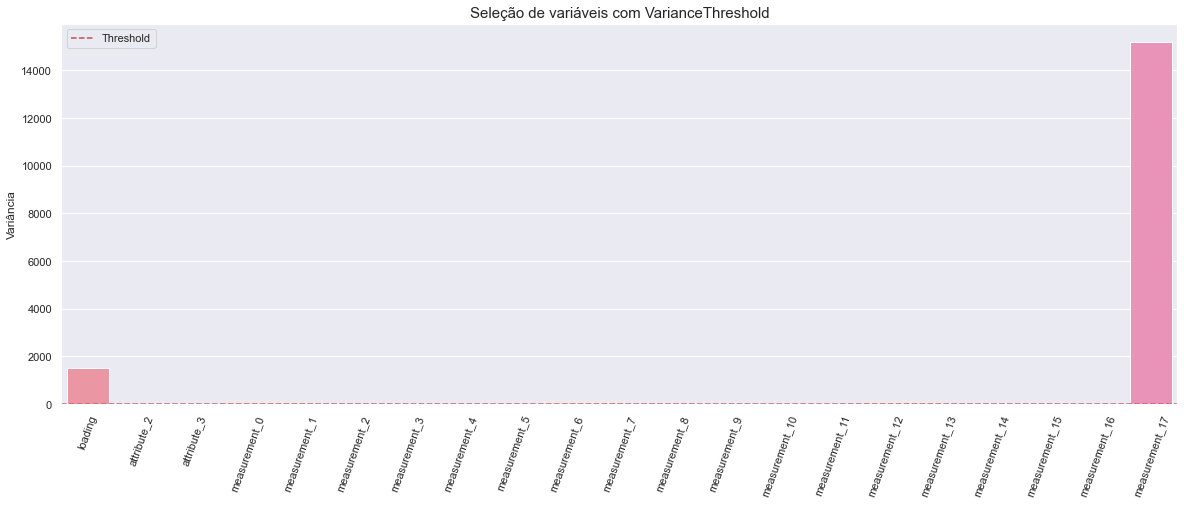

In [36]:
threshold = 2.2
selector  = VarianceThreshold(threshold=threshold)
df_aux    = df2_train.select_dtypes(np.number).drop(['id','failure'], axis=1)
selector.fit_transform(df_aux)

plt.figure(figsize=(20,7))
sns.barplot(y=selector.variances_, x=df_aux.columns, orient='v')
plt.title('Seleção de variáveis com VarianceThreshold',size=15);
plt.ylabel('Variância');
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xticks(rotation=70)
plt.legend();

del df_aux

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Acima observamos duas variáveis se destacando com alta variância, vamos verificar a variância por tipo de variáveis: <p> <br>
    
</div>

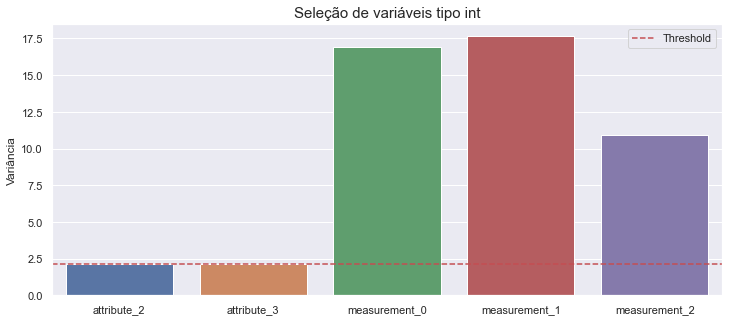

In [37]:
threshold = 2.1
selector  = VarianceThreshold(threshold=threshold)
df_aux    = df2_train.select_dtypes(np.int).drop(['id','failure'], axis=1)
selector.fit_transform(df_aux)

plt.figure(figsize=(12,5))
sns.barplot(y=selector.variances_, x=df_aux.columns, orient='v')
plt.title('Seleção de variáveis tipo int',size=15);

plt.ylabel('Variância');
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend();

del df_aux

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Por tipo de variável, neste caso int,  temos uma melhor visualização e entendimento da variância, temos três variáveis com alta variância, sendo que duas se destacam: <b>measurement_0 e measurement_1</b> e duas com baixa variância: <b> attribute_2 e attribute_3</b>.   
    
</div>

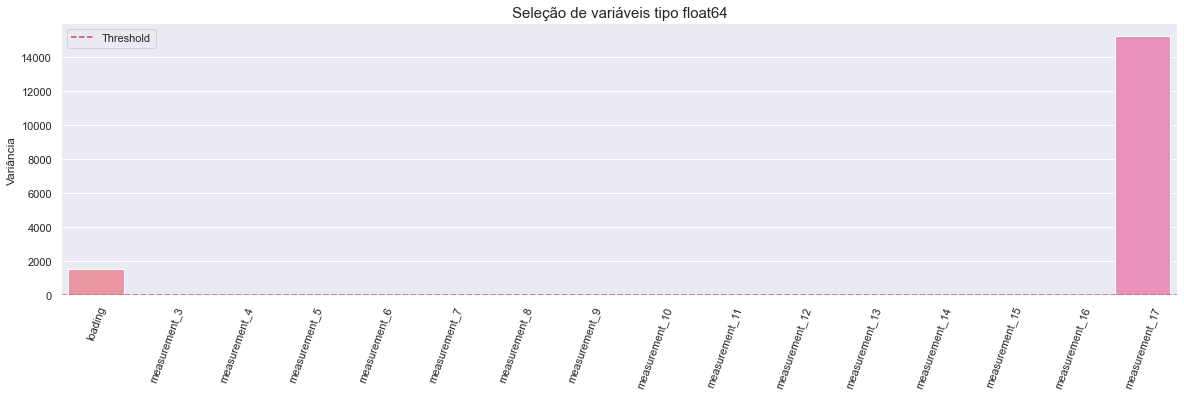

In [38]:
threshold = 2.5
selector  = VarianceThreshold(threshold=threshold)
df_aux    = df2_train.select_dtypes(np.float64)
selector.fit_transform(df_aux)

plt.figure(figsize=(20,5))
sns.barplot(y=selector.variances_, x=df_aux.columns, orient='v')

plt.xticks(rotation=70)
plt.title('Seleção de variáveis tipo float64',size=15);
plt.ylabel('Variância')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()

del df_aux;

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

As variáveis <b>loading e measurement_1</b> se destacam em relação as outras variáveis, vamos excluí-las do gráfico para termos um melhor entendimento das outras variáveis.  
    
</div>

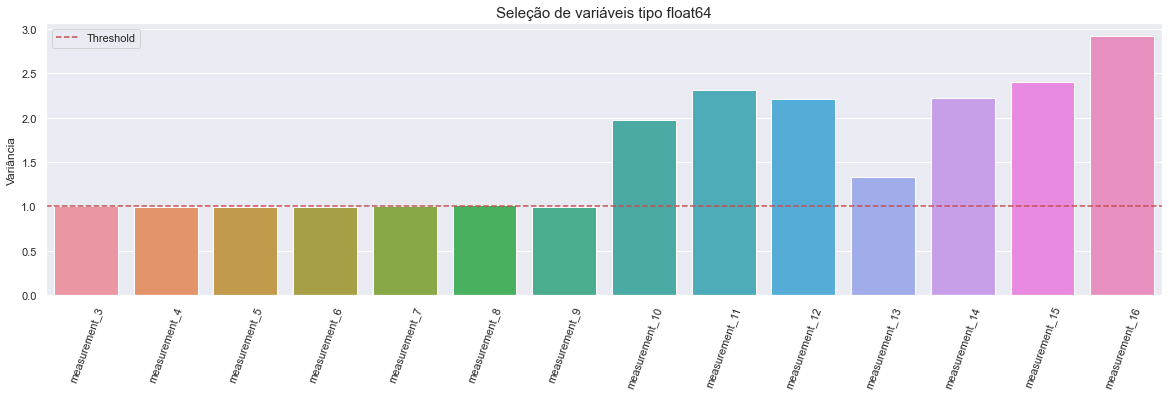

In [39]:
threshold = 1
selector  = VarianceThreshold(threshold=threshold)
df_aux    = df2_train.select_dtypes(np.float64).drop(['measurement_17', 'loading'], axis=1)
selector.fit_transform(df_aux)

plt.figure(figsize=(20,5))
sns.barplot(y=selector.variances_, x=df_aux.columns, orient='v')

plt.xticks(rotation=70)
plt.title('Seleção de variáveis tipo float64',size=15);
plt.ylabel('Variância')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()

del df_aux;

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Agora temos um melhor entendimento da variância com os gráficos acima, podemos destacar:  
- Entre as variávies do inteiro temos duas com alta variância e duas com baixa variância, a terceira (<b> measurement_2</b>) pode ser uma variável segnificativa na modelagem; <p>
    
- A <b>loading e measurement_1</b> são as variáveis que tem maior variância entre as variáveis continuas; <p>
    
- As variáveis entre <b>measurement_1 até a measurement_9</b> tem baixa variância entre as variáveis continuas, provavelmente não são relevantes para modelagem. 
    
    
<p> <br>
    
    
</div>

---

## 2.5. Distribuição

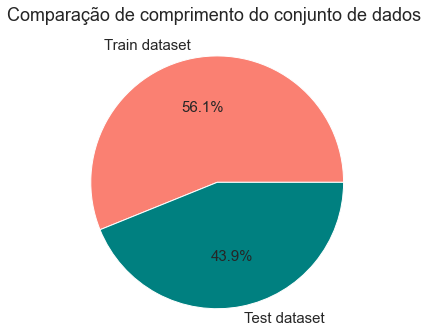

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))

pie = ax.pie([len(df1_train), len(df1_test)],
             labels   = ["Train dataset", "Test dataset"],
             colors   = ["salmon", "teal"],
             textprops= {"fontsize": 15},
             autopct  = '%1.1f%%')

ax.axis("equal")
ax.set_title("Comparação de comprimento do conjunto de dados \n", fontsize=18)
fig.set_facecolor('white')
plt.show();

### 2.5.1. Distribuição Train x Test

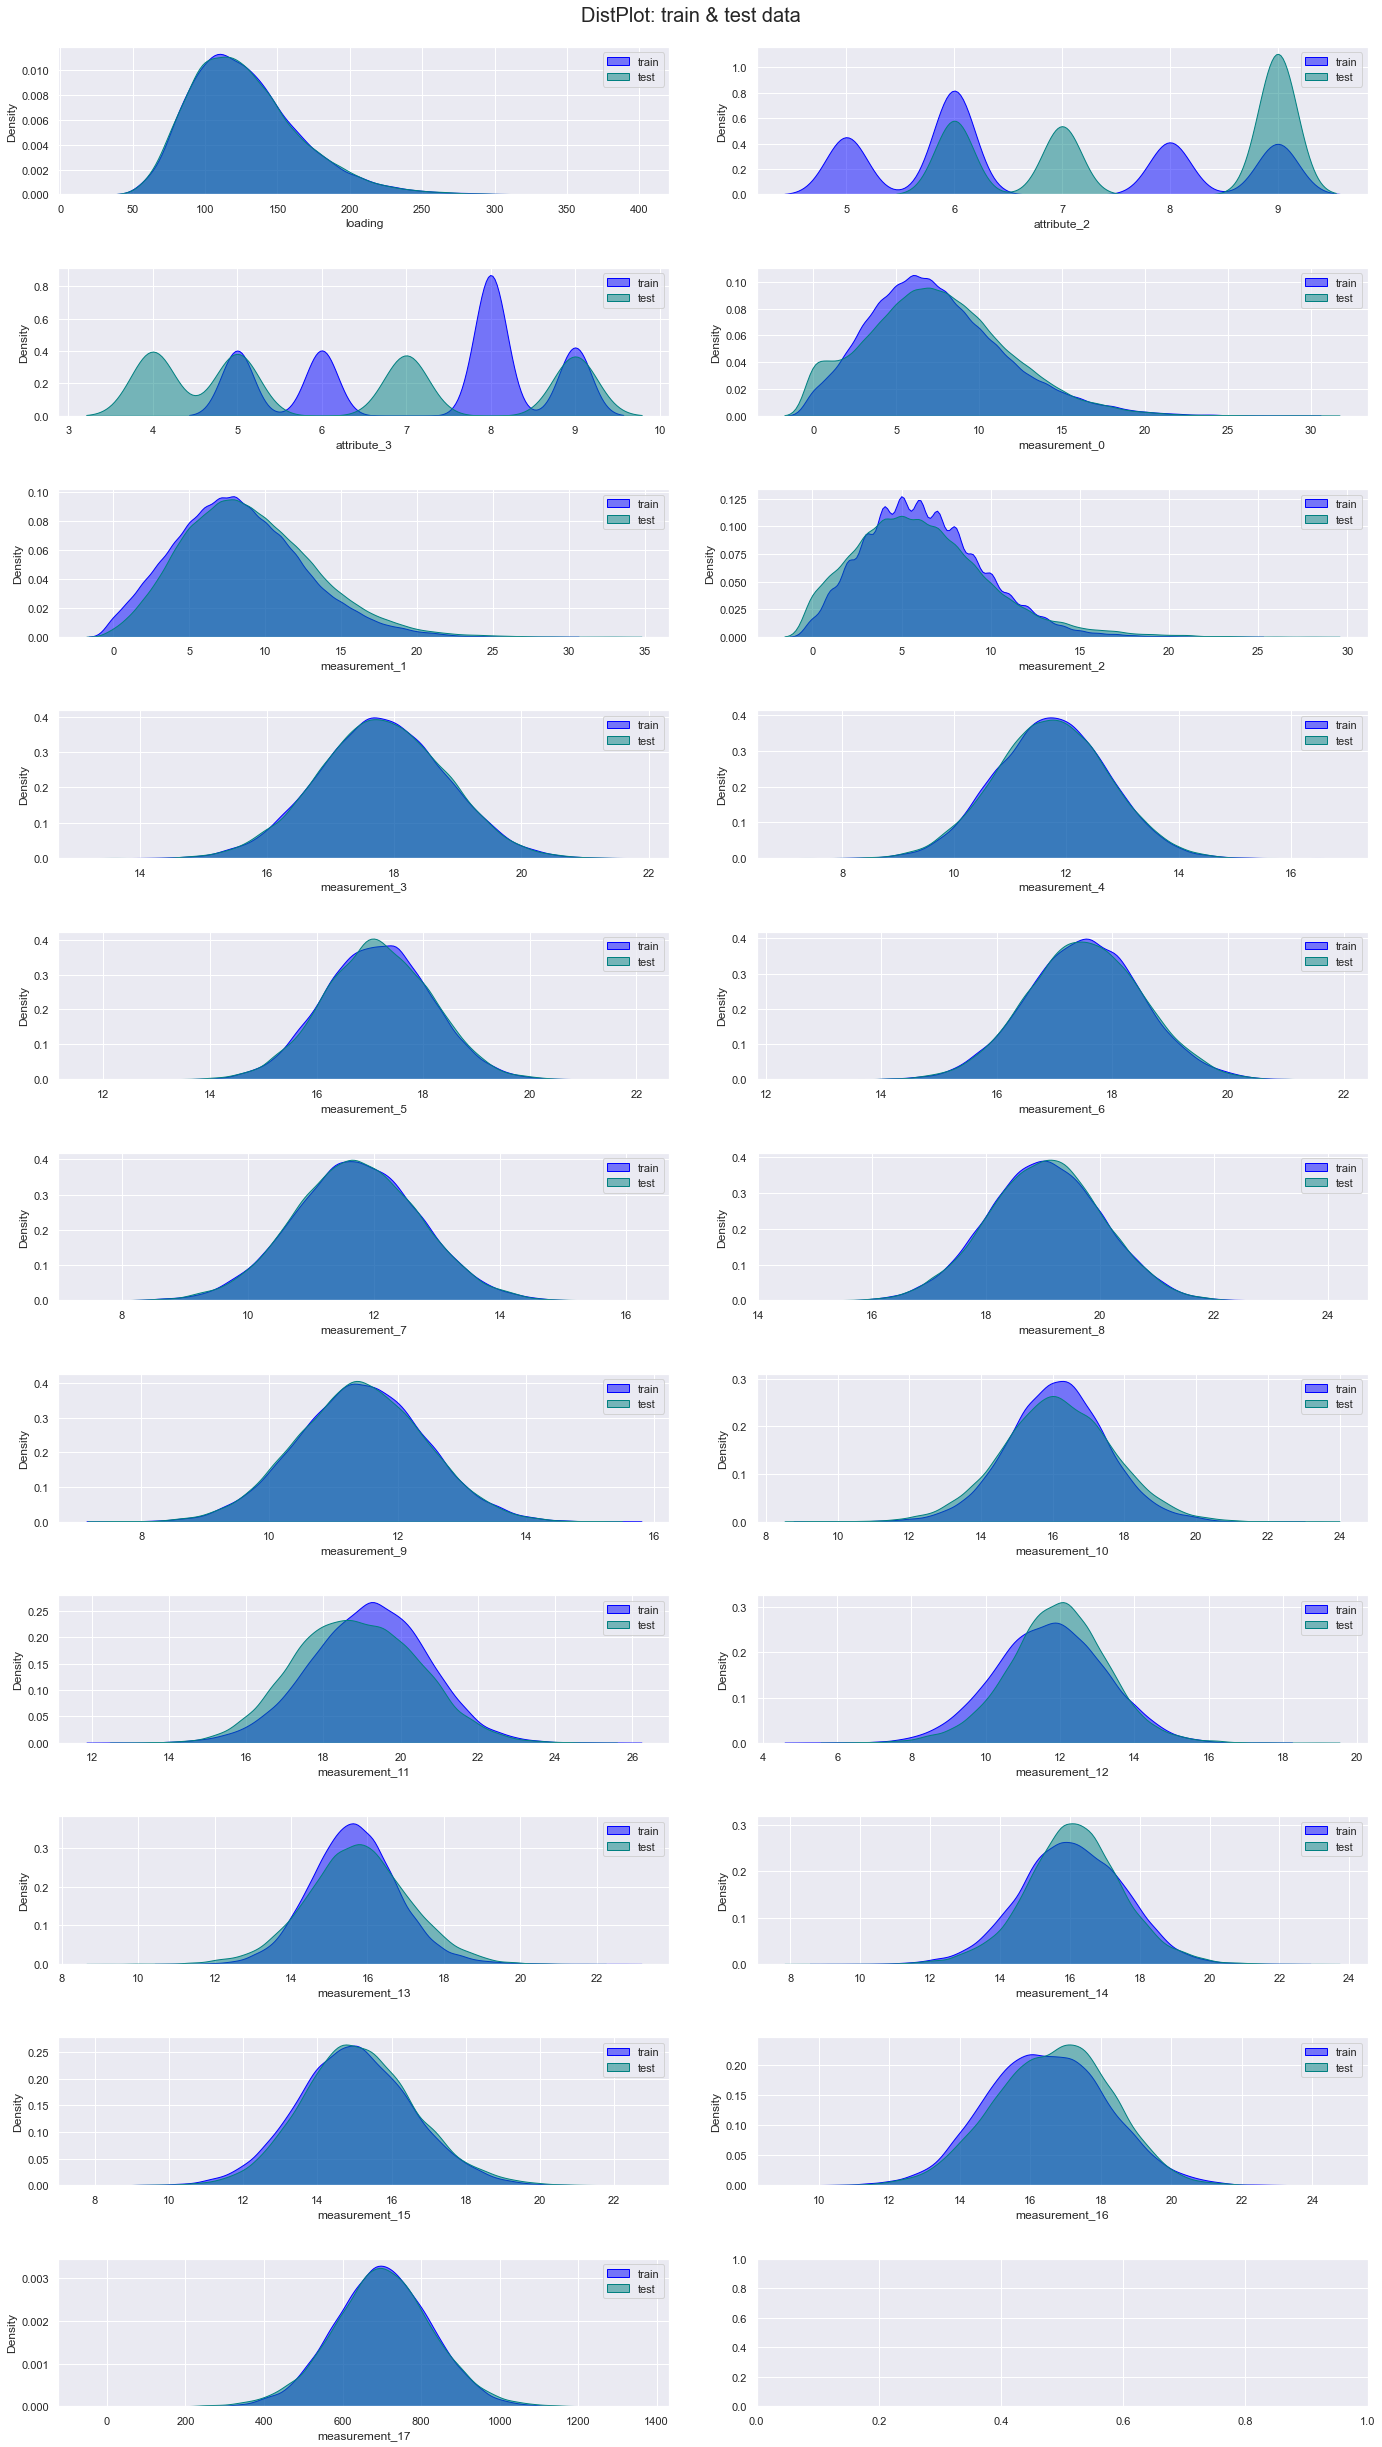

In [41]:
feature_float = df2_test.drop('id', axis=1).select_dtypes(np.number).columns.to_list()

lines   = int(len(feature_float)/2)+1
fig, ax = plt.subplots(lines,2 ,figsize=(20,35))

for i,feature in enumerate(feature_float):
    plt.subplot(lines,2,i+1)
    sns.kdeplot(df2_train[feature],color='blue', alpha=0.5, label='train', shade=True)
    sns.kdeplot(df2_test[feature] ,color='teal', alpha=0.5, label='test', shade=True)  
    plt.xlabel(feature, fontsize=12)
    plt.legend()
         
plt.suptitle('DistPlot: train & test data', fontsize=20)
plt.tight_layout(pad=3.0);

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Observamos apenas as diferenças na variáveis discretas, como foi mencionado anteriormente. 
    
</div>

### 2.5.2. Proporção de variáveis

In [42]:
feature_obj   = df2_test.select_dtypes(object).columns.to_list()
feature_cat   = df2_test.drop(['id'], axis=1).select_dtypes(int).columns.to_list()               
feature_float = df2_train.select_dtypes(np.float64).columns.to_list()
feature_cat   = feature_cat + feature_obj

feature_cat.sort()
feature_float.sort() 

print('CATEGÓRIAS: \n{}\n'.format(feature_cat))

print('CONTÍNUAS: \n{}\n'.format(feature_float))

CATEGÓRIAS: 
['attribute_0', 'attribute_1', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'product_code']

CONTÍNUAS: 
['loading', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9']



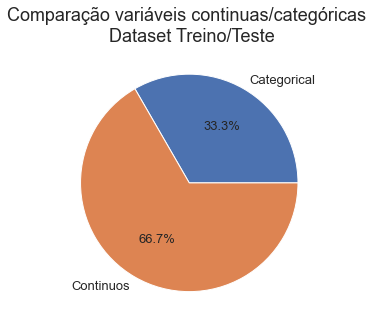

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.pie([ len(feature_cat), len(feature_float)], 
        labels=['Categorical', 'Continuos' ],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')

#ax.axis("equal")
ax.set_title("Comparação variáveis continuas/categóricas \n Dataset Treino/Teste", fontsize=18)
fig.set_facecolor('white')
plt.show()

### 2.5.3. Variável predidora

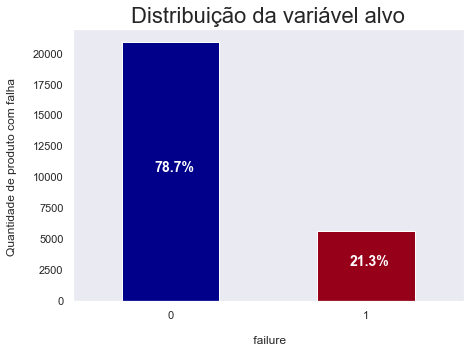

In [44]:
plt.figure(figsize=(7,5))  

utility.graf_bar(df2_train.groupby(['failure'])['failure'].count(), 
               icecream, 'Distribuição da variável alvo', 'failure', 
               'Quantidade de produto com falha');

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Observamos no gráfico acima o desbalanceamento da variável alvo, teste de balanceamento podem ser uma solução para ajuda na modelagem ou ajustes de parametros em alguns classificadores, esse processo é necessário para evitar que os modelos tenham maior preferência pela classe majoritária.  <p> <br>
    
    
</div>

## 2.6. Dados Númericos

### 2.6.1. Correlação

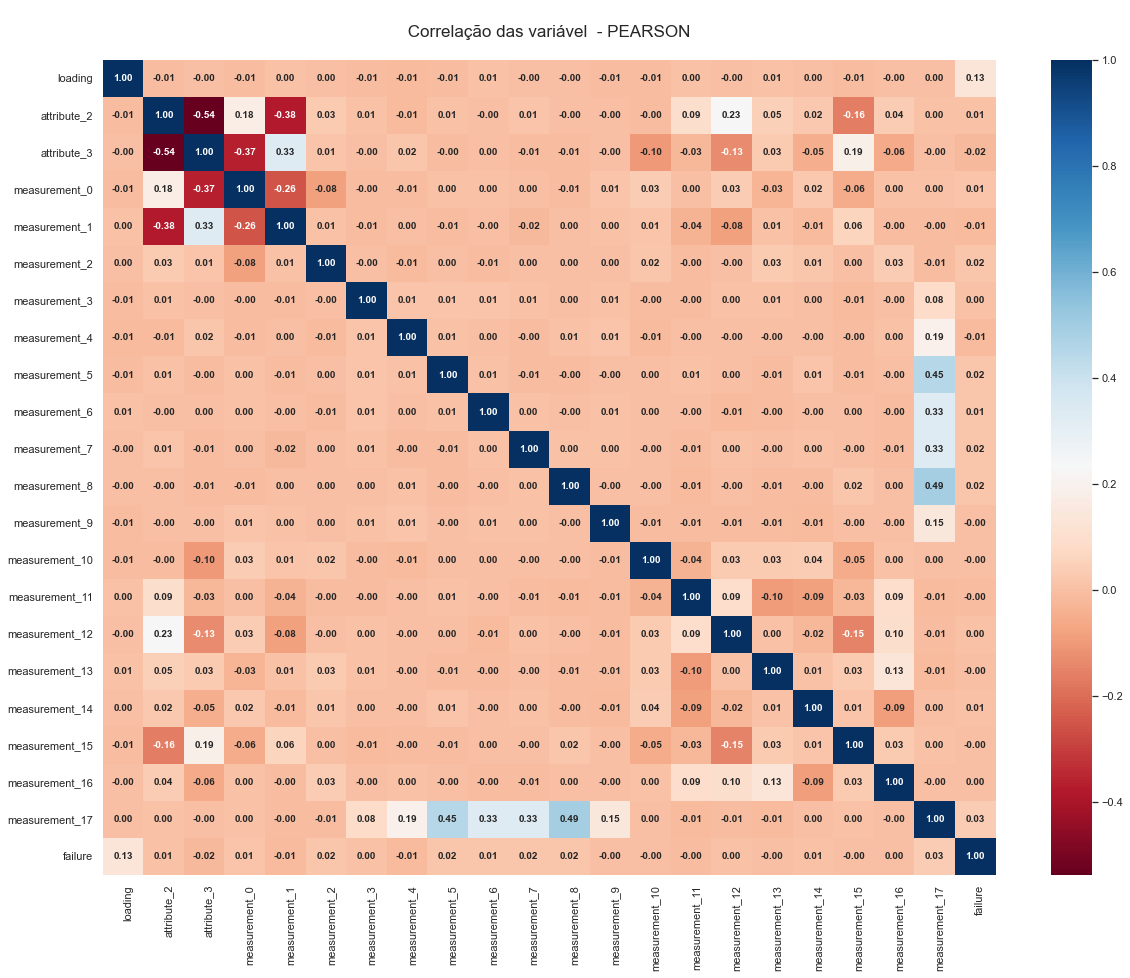

Variáveis autocorrelacionadas threshold=0.40


var_1           var_2     corr
0     attribute_2     attribute_3 -0.53870
1     attribute_3     attribute_2 -0.53870
2   measurement_5  measurement_17  0.45002
3   measurement_8  measurement_17  0.49284
4  measurement_17   measurement_5  0.45002
5  measurement_17   measurement_8  0.49284

In [45]:
plt.figure(figsize=(20,15))

feature_corr = \
    utility.graf_feature_corr(df_         = df2_train.drop('id', axis=1),                             
                              annot_      = True, 
                              threshold_  = .4, 
                              print_var_  = True, 
                              print_graf_ = True, 
                              mask_       = False, 
                              #method_     = 'spearman'
                              );

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

- Não temos autocorrelação significativa entre as variáveis, principalmete com a variável alvo sendo muito baixa, a variável com maior correlação é <b>loading</b> com 0.13; <p>
    
- A <b>measurement_17</b> tem uma correlação acima de .4 com as variáveis: measurement_5, measurement_8, pode ser uma oportunidade para criação de novas variáveis derivadas; <p>
    
- Também existe uma correlação negativa acima de 0.5 entre as variáveis <b>attribute_2 e attribute_3</b>. <p>  
    
Nesta competição quem tive aptidão para criar novas variáveis com relevância conseguirá se destacar. <p> <br>
</div>

### 2.6.2. Relação entre variáveis

Agora usaremos pairlplots para visualizar a distribuição de cada uma de nossas variáveis numéricas agrupadas por falha (0 ou 1). 

In [46]:
feature_corr = \
    utility.graf_feature_corr(df_         = df2_train.drop('id', axis=1),                             
                              annot_      = True, 
                              threshold_  = .01, 
                              print_var_  = False, 
                              print_graf_ = False, 
                              mask_       = False, 
                              #method_     = 'spearman'
                              );

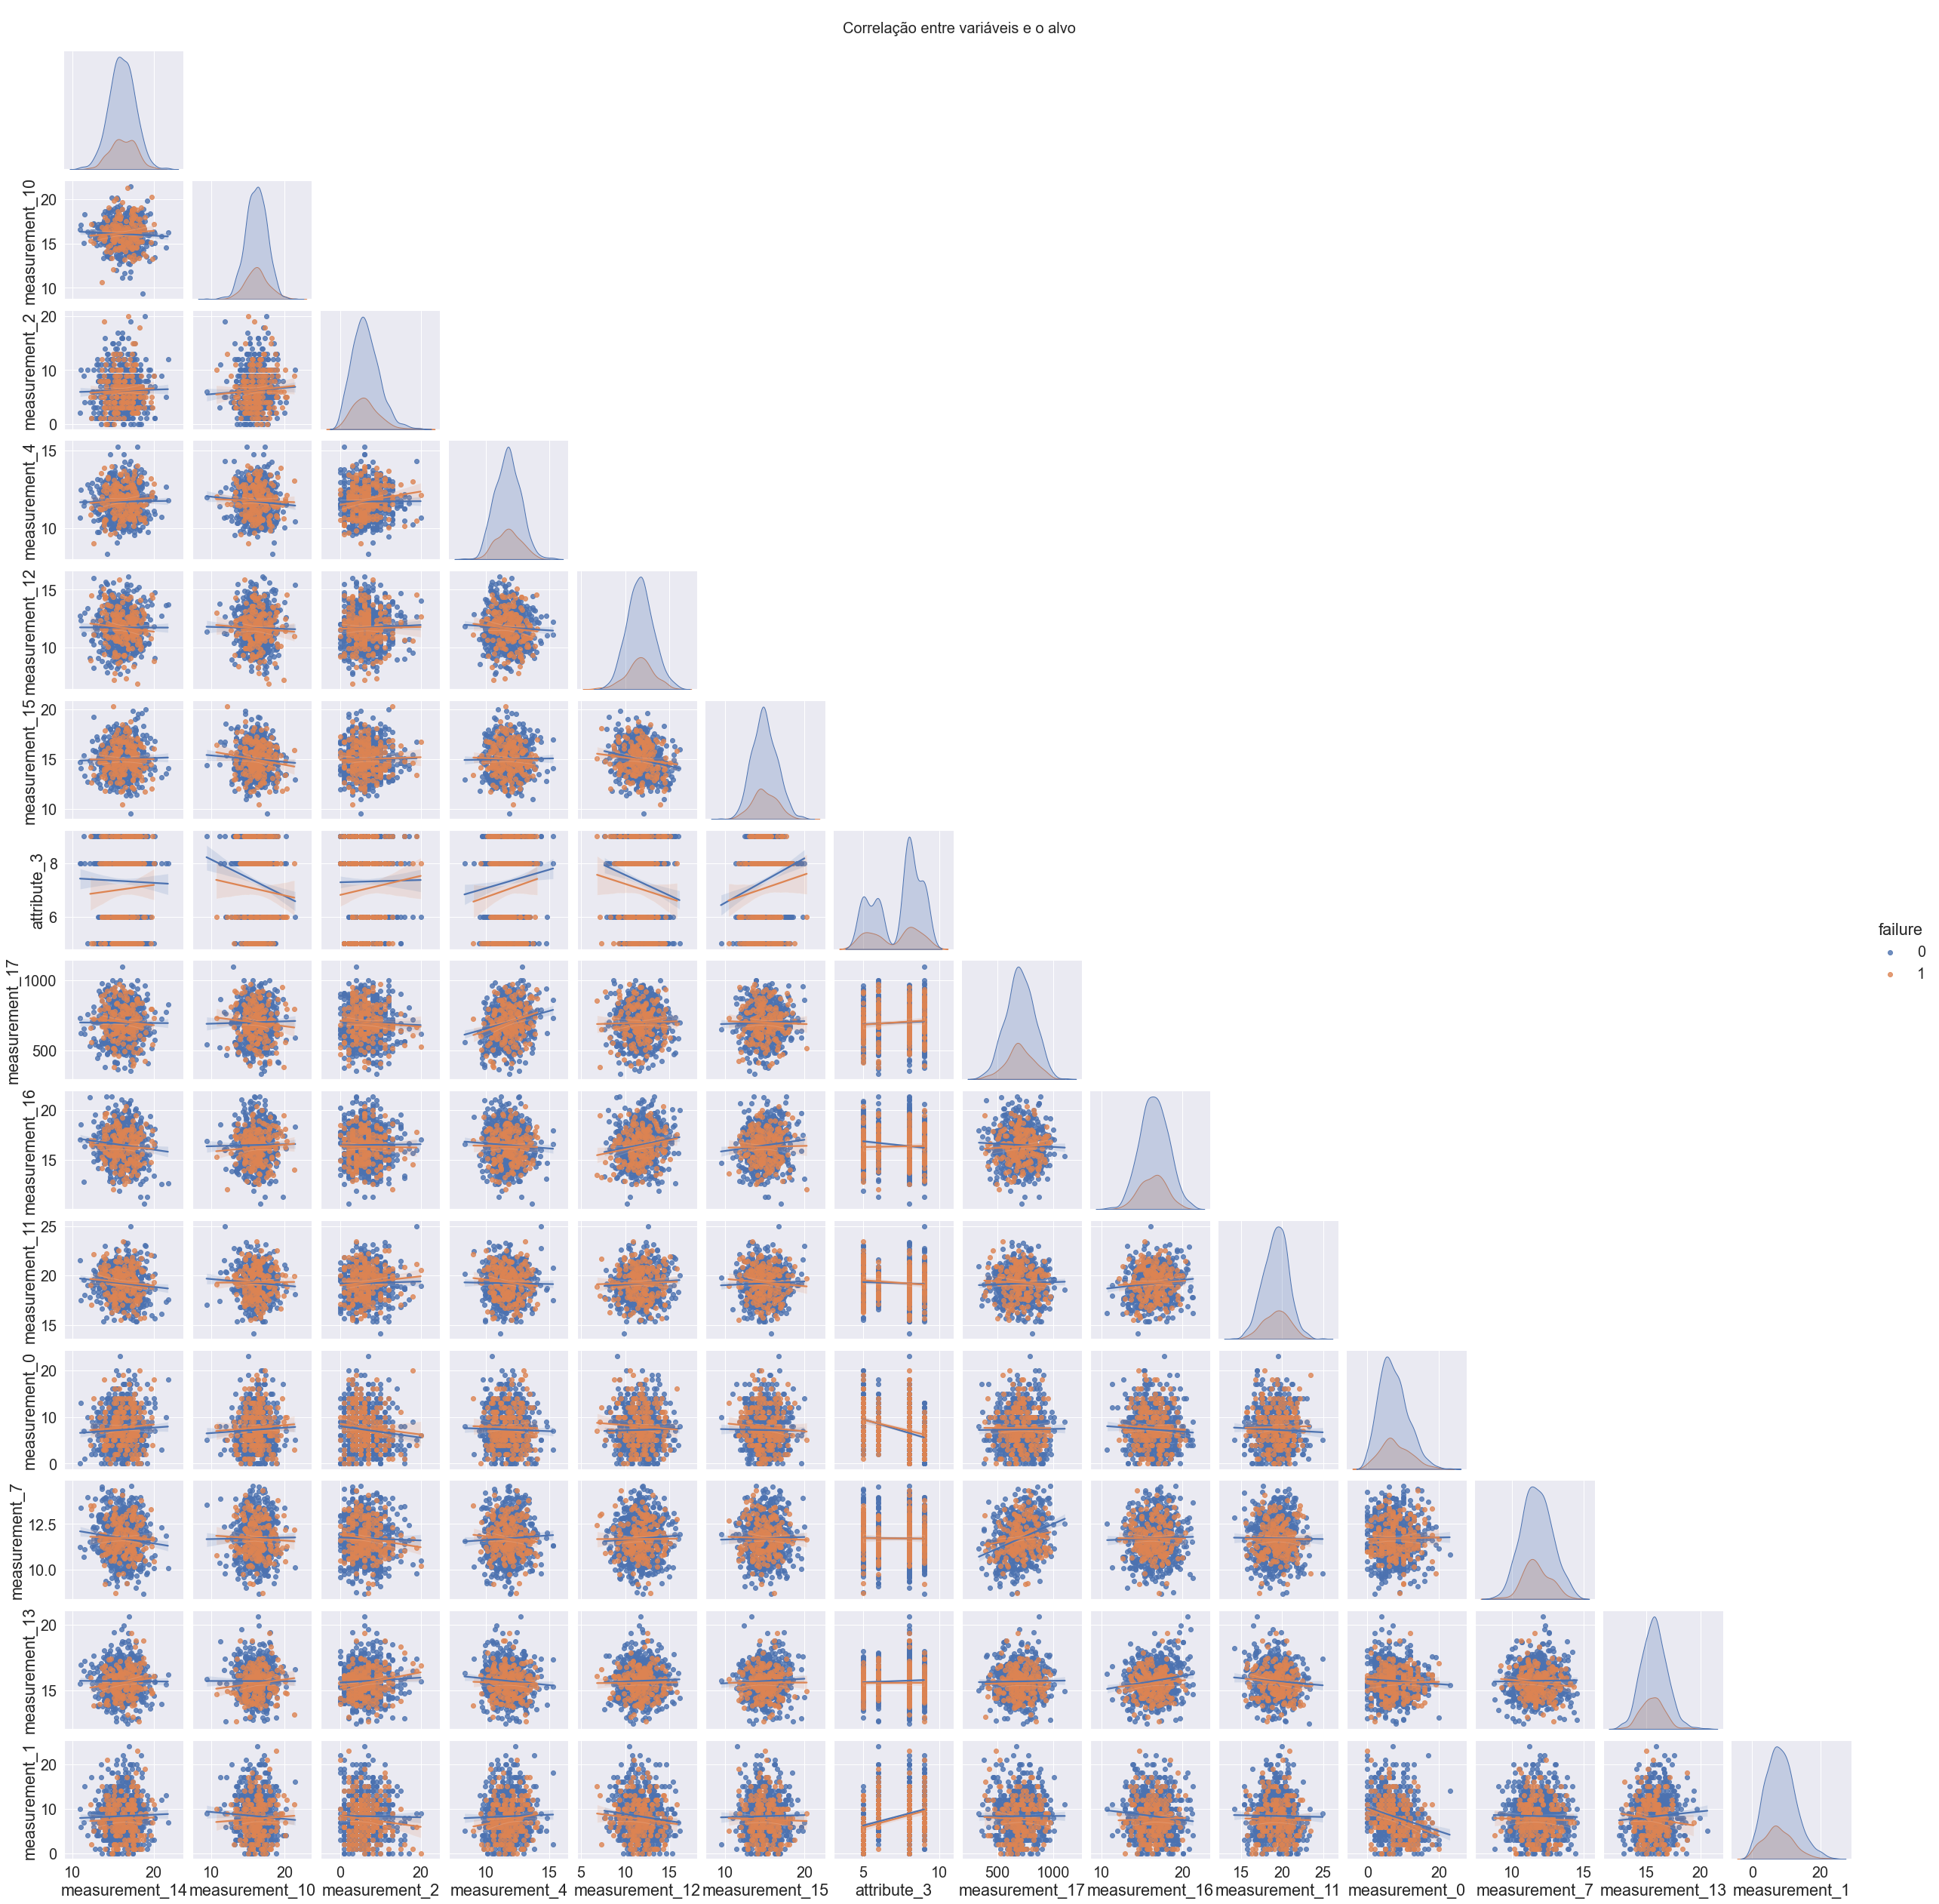

In [47]:
df_aux = df2_train[feature_corr].sample(n=1000)

sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=1.8)
g1 = sns.pairplot(df_aux, hue='failure', corner=True, kind="reg")
g1.fig.suptitle("\nCorrelação entre variáveis e o alvo", y=1.01, fontsize=20)
plt.show();
del df_aux

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
A variável measurement_17 tem uma pequena relação linear com algumas variáveis, fora isso, não é possível identificar outras relações entre as variáveis. Podemos utilizar a clusterização para identificar padrões relevantes e criar uma nova variável com os clustering. <p> <br> 
    
    
<b>OBSERVAÇÕES da EDA:</b> <P> 
    
Primeiro com relação aos dados categóricos: Nenhuma de nossas variáveis categóricas são altamente correlacionadas com a variável alvo e podemos tentar descartar uma de cada vez para ver se isso afeta a precisão do nosso modelo, isso fica comprovado nos teste qui-quadrado; 
    

    
</div>

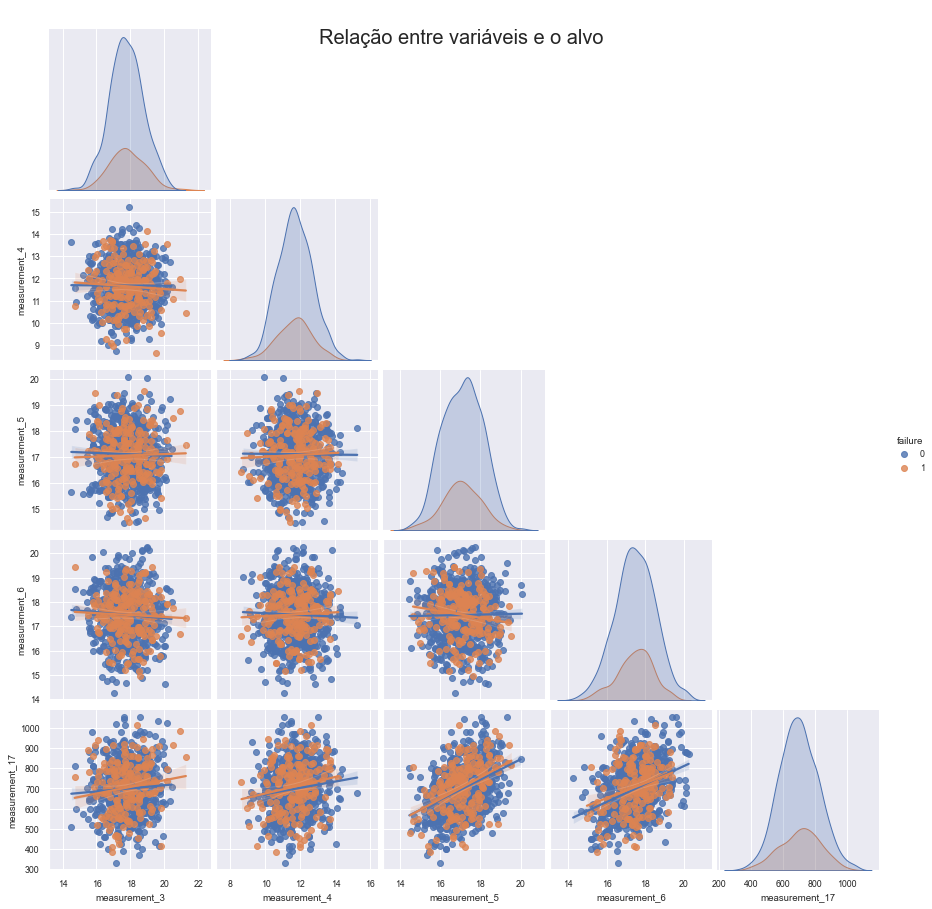

In [48]:
f_float = ['measurement_3','measurement_4', 'measurement_5', 
           'measurement_6', 'measurement_17',]

df_aux = df2_train[f_float+['failure']].sample(n=1000)

#sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=.8)
g1 = sns.pairplot(df_aux, hue='failure', corner=True, kind="reg")
g1.fig.suptitle("\nRelação entre variáveis e o alvo", y=1.01, fontsize=20)
plt.show();
del df_aux

### 2.6.3. Histograma

Vamos plotar apenas as variáveis float. 

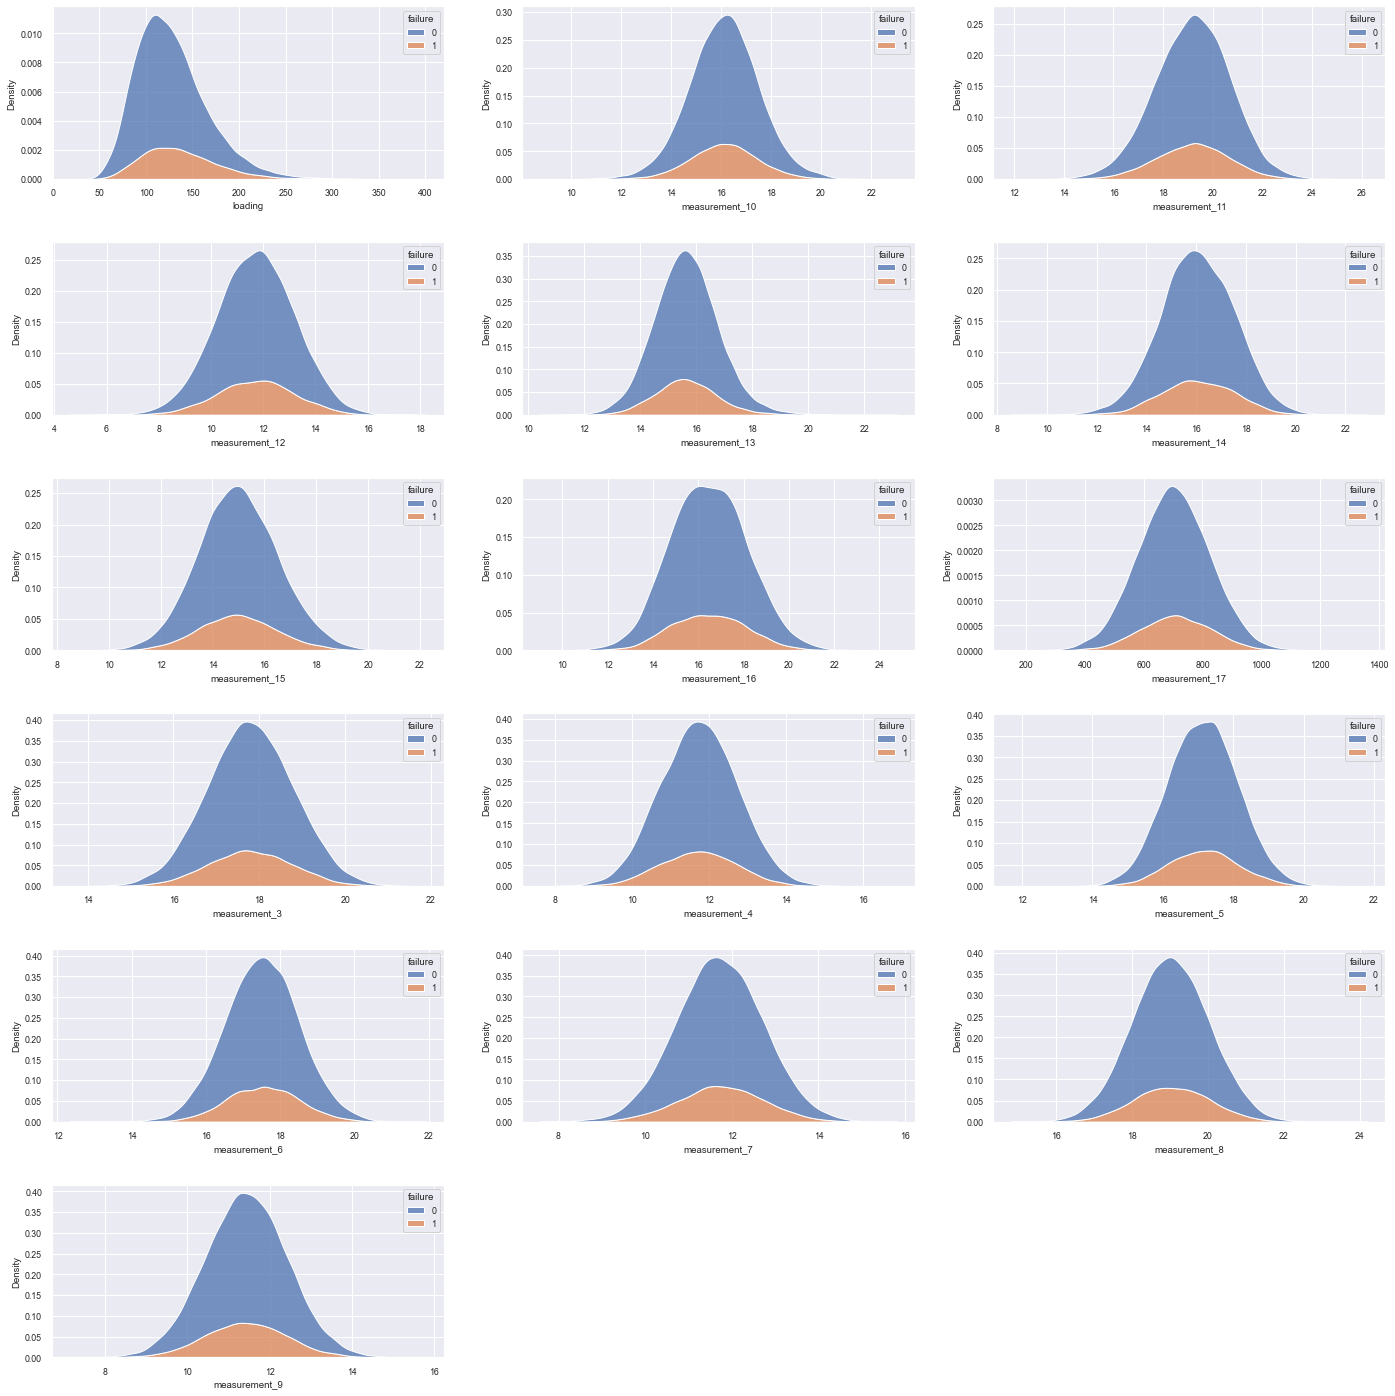

In [49]:
plt.subplots(figsize=(20, 20))

for i, col in enumerate(feature_float):    
    plt.subplot(int(len(feature_float)/3 +1),3,i+1)
    sns.kdeplot(data=df2_train, x=col, hue=target, legend=True, shade=True, multiple='stack');
    
plt.tight_layout(pad=3.0)

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
A maioria das variáveis parecem seguir uma distribuição normal, temos duas observações em relação a distribuições acima. <br> 
    
- Em relação a classe positiva temos uma curtose achatada (platicúrtica), isso é explicado pelo desbalanceamento do dataset, uma trabalho de balanceamento pode ajudar na performance da modelagem; <p> 
    
- A variável loading tem uma distribuíção assimétrica positiva, uma transformação como: log, raiz quadrada, box-cox, etc, pode melhorar a assimetria. <p> <br>
    
</div>

### 2.6.4. Outliers

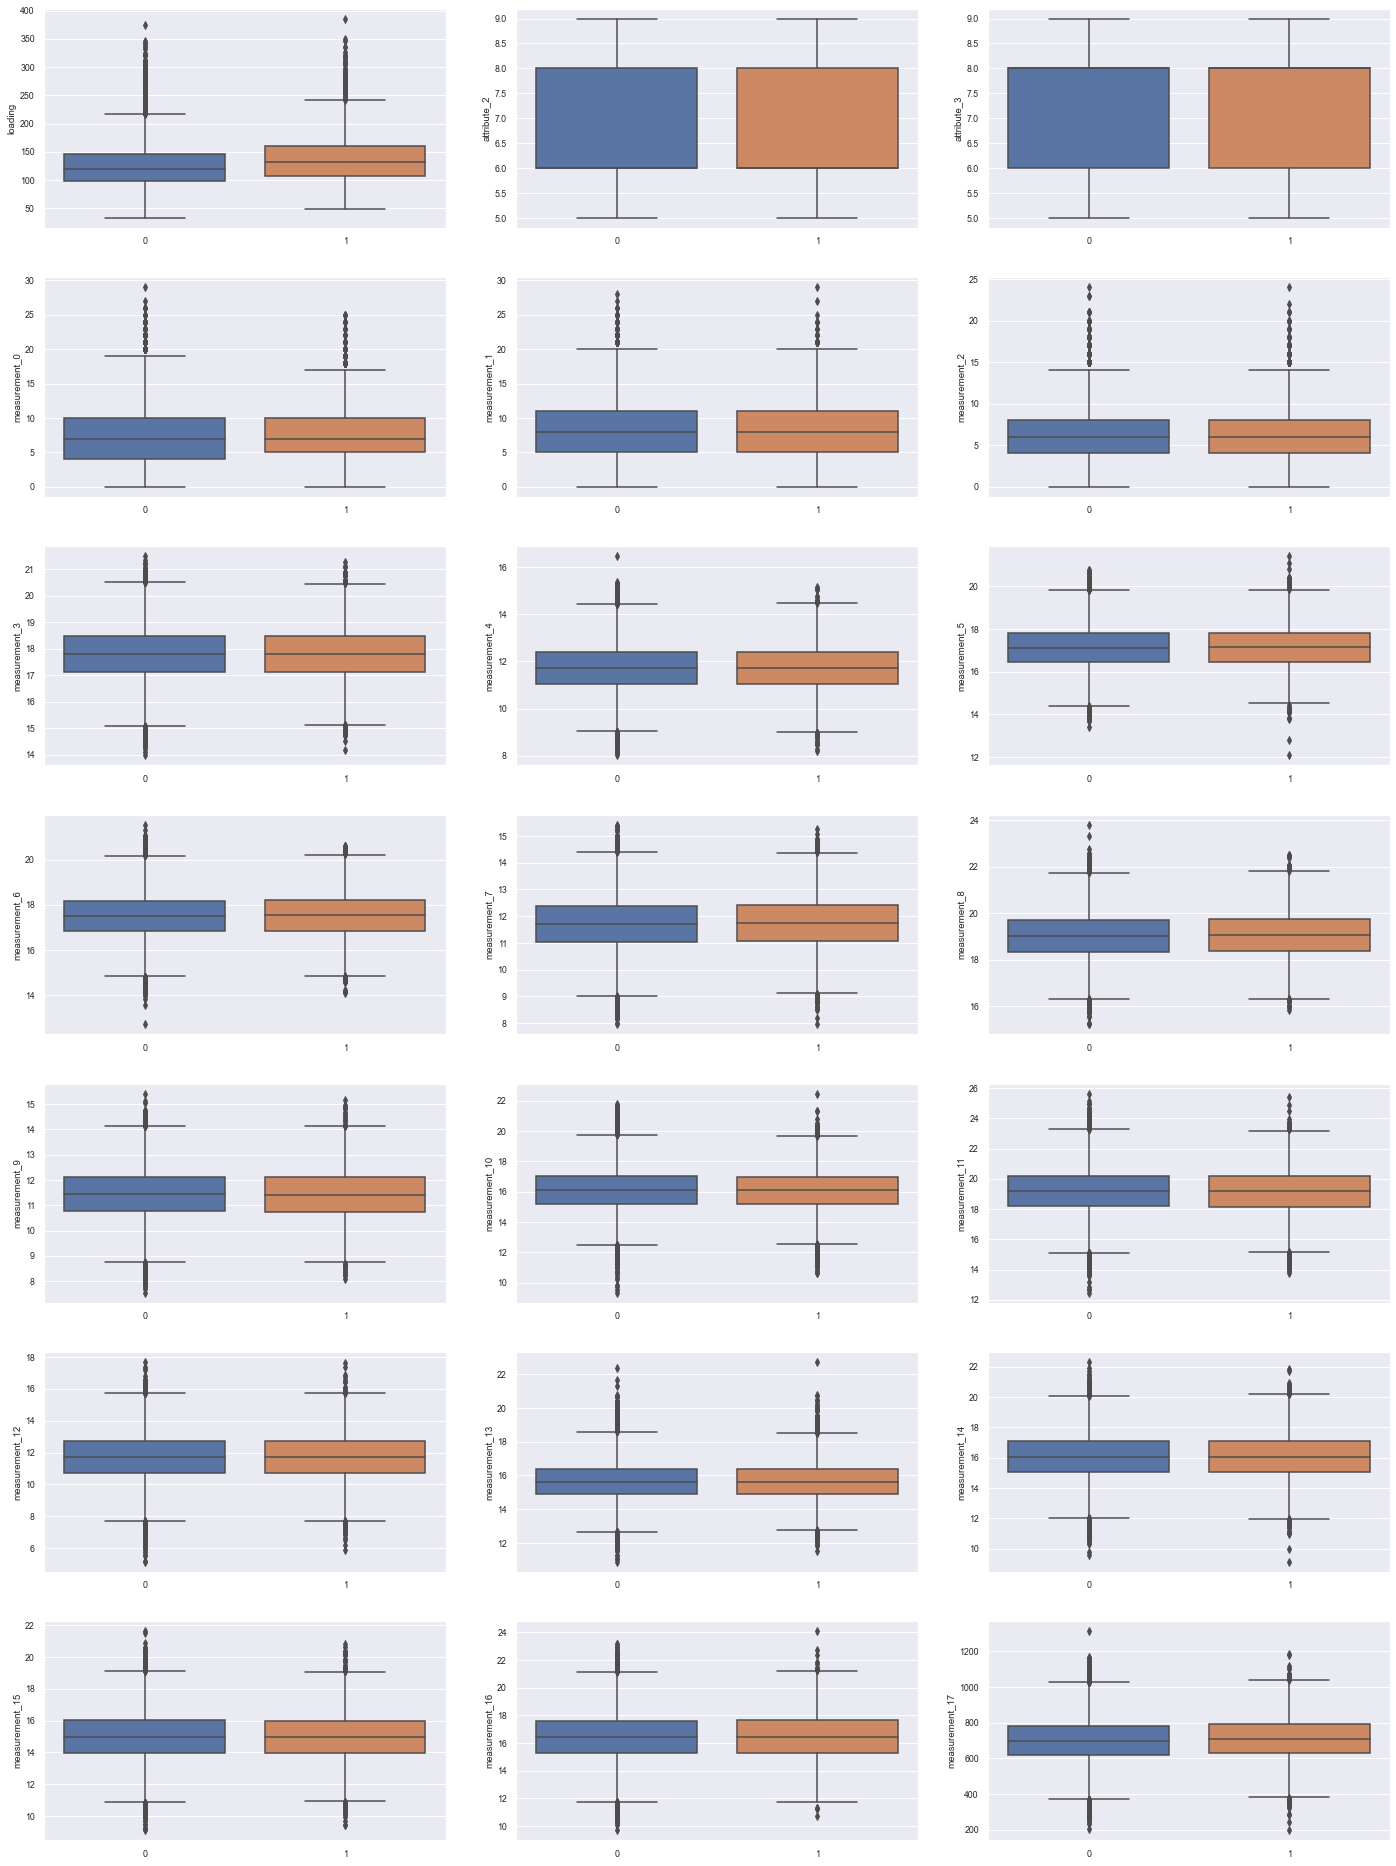

In [50]:
f, ax   = plt.subplots(figsize=(20, 30))
feature = df2_train.select_dtypes(np.number).columns.drop(['id', target]).to_list() 
row     = int(len(feature)/3 +1)

for i, col in enumerate(feature): 
    plt.subplot(row, 3, i+1)
    sns.boxplot(data=df2_train, y=col, x=target) 
    plt.xlabel('')
    
plt.tight_layout(pad=3.0)

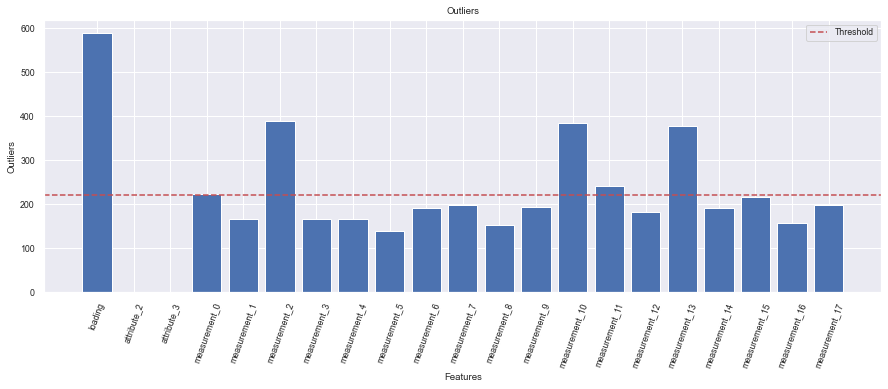

In [51]:
out = []
od  = {f:utility.iqr_outliers(df2_train,f) for f in feature}

# Plotting Outliers
plt.figure(figsize=(15,5))
plt.bar(x=od.keys(),height=od.values())
plt.xlabel("Features")
plt.ylabel("Outliers")
plt.title('Outliers')
plt.xticks(rotation=70)
plt.axhline(y=220, color='r', linestyle='--', label='Threshold')
plt.legend()

plt.show()

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
- Todas as variáveis tem outliers, talvez a criação de uma variável que indique que aquele dados (amostra) é um outlier pode ajudar na modelagem, podemos utilizar o intervalo interquartil para identificar os outliers e criar a nova variável; <p>  
    
- A variável <b>loading</b> se destaca com maior número de outliers, seguidas das variáveis <b>measurements_2, measurements_10 e measurements_13</b>. <p> <br>    
    
</div>

### 2.6.5. Variáveis discretas

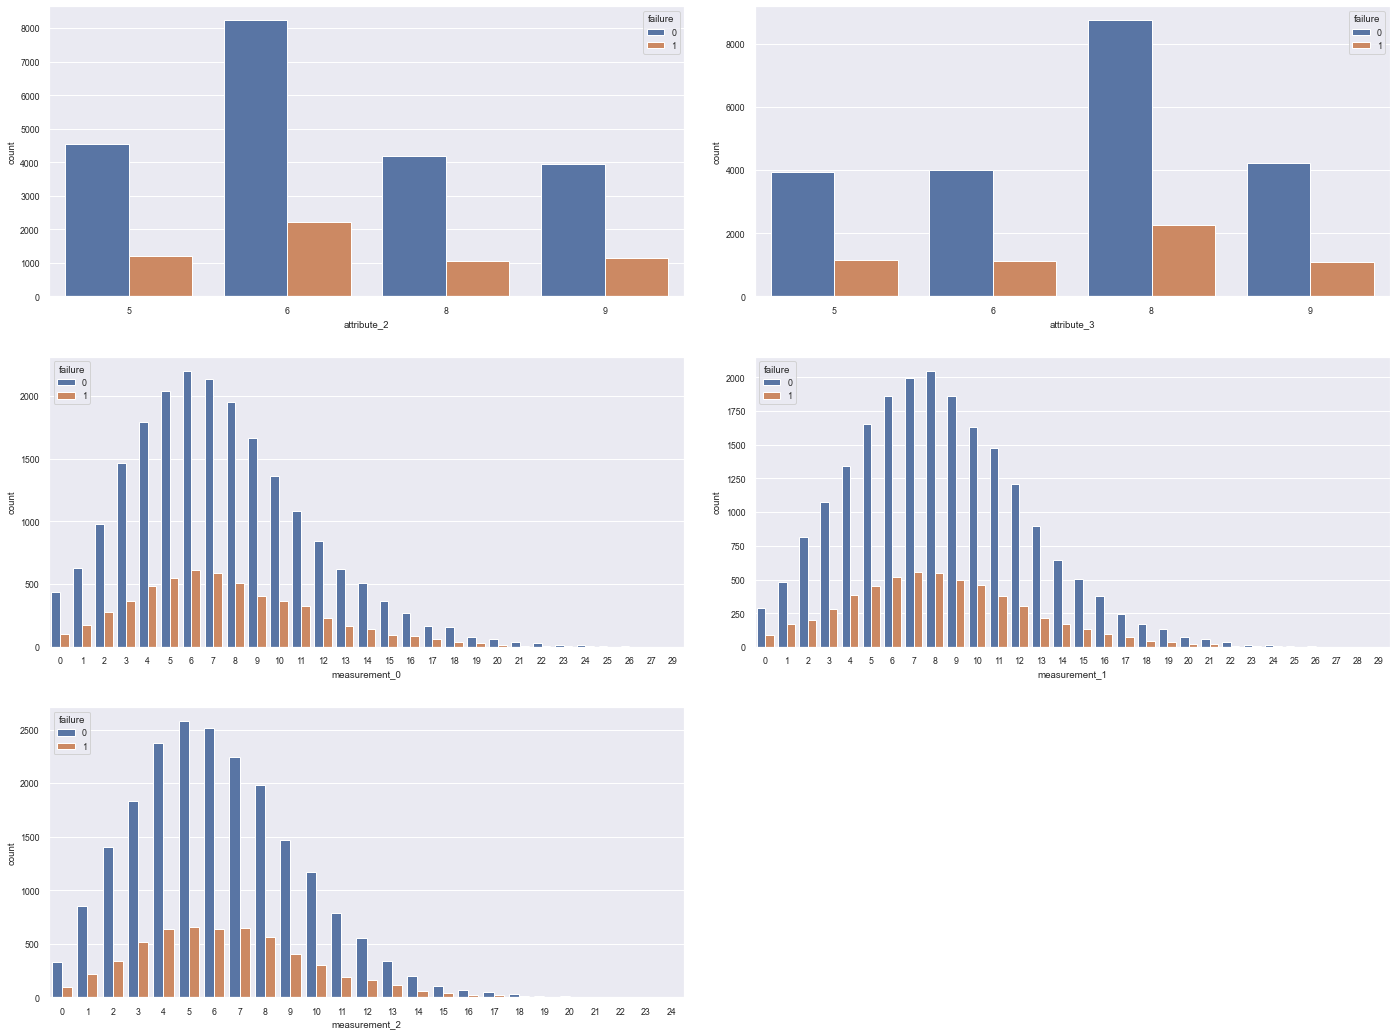

In [52]:
plt.figure(figsize=(20,15))

feature = feature_int.copy()
feature.sort()

row = int(len(feature)/2)+1

for i, col in enumerate(feature):
    plt.subplot(row, 2, i+1)
    sns.countplot(data=df2_train, x=col, hue=target)  
    
plt.tight_layout(pad=3.0)

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
Podemos destacar os sequintes ponto:     
- A variável <b>attribute_2</b> na categoria 6 tanto para classe positiva e negativa parece ter uma relevância maior que as outras categoria, transforma essa variável em <b>one hot encoding</b> ou outra transformação pode gerar bons resultado na modelagem, o mesmo pode ser adotado com as variáveis: <b>attribute_1, attribute_3;  <p>
    
- As variáveis <b>measuremente_0, measuremente_1  e measuremente_2</b>, podemos criar uma classe que agrupem os valores com pouca frequência, o que pode reduzir os outliers.<p> <br>
    
</div>

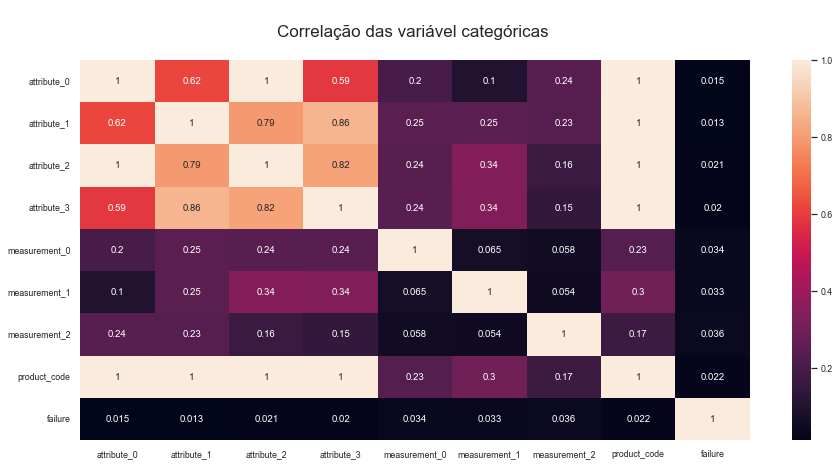

In [53]:
plt.figure(figsize=(15,7))

df         = df2_train[feature_cat].astype(object)
df[target] = df2_train[target].astype(object)

corr = utility.generate_category_table(df)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True,) #  mask=mask
plt.title('\nCorrelação das variável categóricas \n', fontsize=17);

del df

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
- Ao fazemos a transformação das variáveis do tipo inteiro para categóricas (object) melhoramos a correlação de algumas variáveis com a variável alvo, e podemos observar que o produto (product_code) tem alto correção com quatro variáveis; <p>     
    
- As variaveis attibute_0 e attribute_2 estão alto correlacionadas, a remoçao da variável <b> attribute_0</b> é a melhor opção, pois tem a menor correlação com o alvo; <br> 
        
    
<b>OBSERVAÇÃO:</b><br>
A variável <b>product_code</b> merece uma análise mais aprofundada, foi observado nas análises acima que os produtos do dataset de treino não tem nos dados de teste, uma das solução para isso é fazer uma previsão para os produtos do dataset de teste, pode resultar em melhoria no score.  <p> <br>
    
Vamos dar uma olhada nas variáveis alto correlacionadas com o produto. <p> <br>  
    
</div>

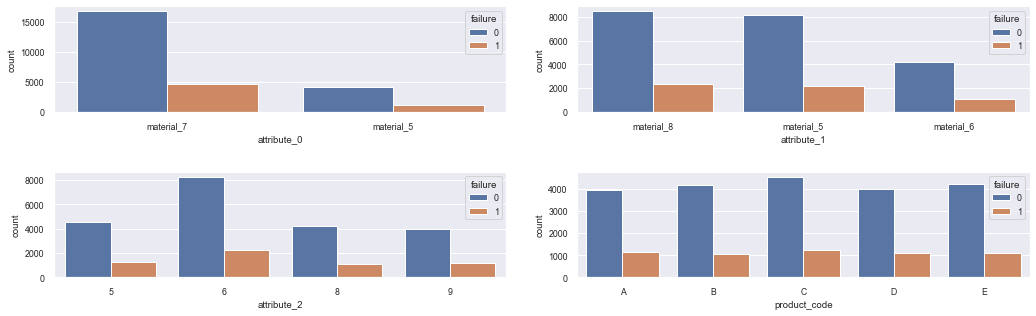

In [54]:
plt.figure(figsize=(15,5))

list_p = ['attribute_0',  'attribute_1','attribute_2', 'product_code']
rows   = int(len(list_p)/2)

for i, col in enumerate(list_p):
    plt.subplot(rows,2,i+1)
    sns.countplot(data=df2_train, x=col, hue='failure')

plt.tight_layout(pad=3.0)

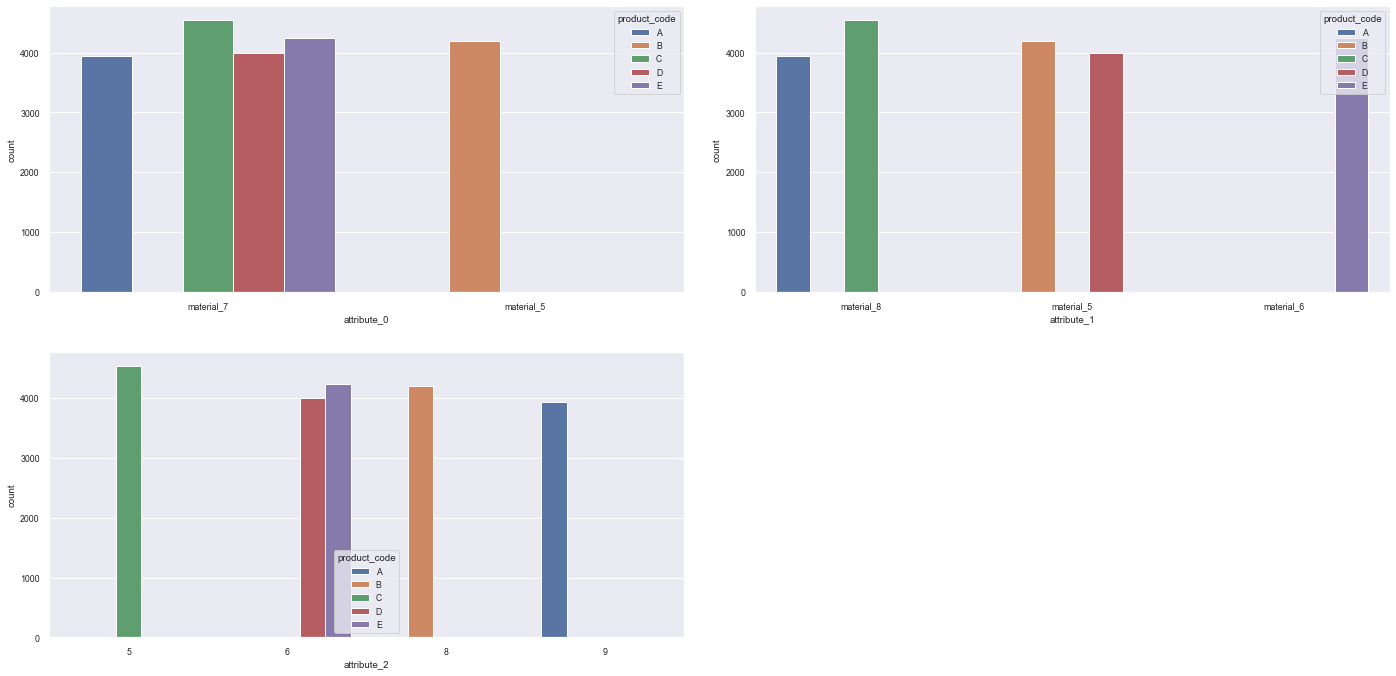

In [55]:
plt.figure(figsize=(20,10))

list_p = ['attribute_0',  'attribute_1','attribute_2', ]
rows   = int(len(list_p)/2) +1

for i, col in enumerate(list_p):
    plt.subplot(rows,2,i+1)
    sns.countplot(data=df2_train[df2_train[target]==0], x=col, hue='product_code')

plt.tight_layout(pad=3.0)

In [56]:
df_aux = []
f      = 'product_code'
fig    = make_subplots(specs=[[{"secondary_y": True}]])
df_aux = df2_train.copy() 
    
for i, classe in enumerate(df_aux[f].unique()):    
    f_float_int = feature_int
    df= df_aux[f_float_int][df_aux[f]==classe]
    
    fig.add_trace(go.Scatter(y    = df[f_float_int].mean(),
                             x    = f_float_int,
                             name = str(classe),
                             line = dict(color=colors[i], width=2, dash='solid')))
    
fig.update_layout(title       = '<b>Valor médio por classe categórica<b>',
                  xaxis_title = 'Features',
                  yaxis_title = 'Valor médio',
                  titlefont   = {'size': 28, 'family':'Serif'},
                  template    = 'simple_white',
                  showlegend  = True,
                  width       = 900, 
                  height      = 500)

fig.update_yaxes(title_text="<b>values</b>", secondary_y=True)

fig.show()    

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
Com base nos gráficos acima, não é possível indentificar se as variáveis realmente afetam a falha, vamos fazer um  teste estatítico para temos uma resposta. Vamos utilizar o teste qui-quadrado, a finalidade desse teste é testar a correlação entre as variáveis dependentes e indepentes.  
    
</div>

In [57]:
for col in list_p: 
    df_crosstab = pd.crosstab(df2_train[col], df2_train[target], margins=True, margins_name="Total")
    stat, p, dof, expected = chi2_contingency(df_crosstab)    
    print('p-value: {:2.5f} => {}'.format(p, col))    

p-value: 0.21117 => attribute_0
p-value: 0.60917 => attribute_1
p-value: 0.18682 => attribute_2


<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>
  
Observamos que com um nível de significância de 0.05, falharíamos em rejeita a hipótese nula e concluimos que não há relação entre as variáveis dependentes e independente, sendo assim, podemos excluí-las da modelagem.   

</div>

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 3. MODELAGEM </h1>    
</div>

## 3.1. Processamento
Abaixo temos uma função que faz a criação de novas variáveis e um pré-processamento básico. 

In [1033]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [1034]:
class Kimputer():
    
    def __init__(self, n_=10, weights_="uniform"):
        self.n       = n_
        self.weights = weights_
        self.cats    = ["product_code", "attribute_0", "attribute_1", "attribute_2", "attribute_3"]
        self.ints    = ["measurement_0", "measurement_1", "measurement_2"]
        
    def __imputer(self, X):
        knn_imp = KNNImputer(n_neighbors=self.n, weights=self.weights).fit_transform(X)        
        return pd.DataFrame(knn_imp, index=X.index, columns=X.columns)
    
    def fit(self, X, y=None):
        cats  = self.cats
        ints  = self.ints         
        right = pd.concat([self.__imputer(gdf.drop(columns=cats)) \
                           for g, gdf in X.groupby("product_code")], axis="rows")
        
        right[ints] = right[ints].round().astype(int)
        df = pd.concat([X[cats], right], axis="columns").reindex(columns=X.columns)
        return df
    
    def transform(self, X, y=None):
        return self.fit(X)        
        
    def fit_transform(self, X, y=None):
        return self.fit(X, y)    

In [1035]:
# https://www.kaggle.com/code/ffisegydd/sklearn-multicollinearity-class
class ReduceVIF(BaseEstimator, TransformerMixin):
    
    def __init__(self, thresh=5.0, impute=True, impute_strategy="median"):
        # Observando a documentação, valores entre 5 e 10 estão "ok".
        # Acima de 10 é muito alto e por isso deve ser removido.
        self.thresh = thresh

        # A função statsmodel falhará com valores NaN, como tal, temos que imputá-los.
        # Por padrão, imputamos usando o valor mediano.
        # Esta imputação pode ser retirada e adicionada como parte de um Pipeline sklearn.
        if impute:
            self.imputer = SimpleImputer(strategy='median') # Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):        
        if hasattr(self, "imputer"):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):        
        columns = X.columns.tolist()
        if hasattr(self, "imputer"):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        iter    = 0
        dropped = True
        
        while dropped:
            variables = X.columns
            dropped   = False
            exog      = X[variables].values
            exog_idx  = X.columns            
            vif       = [variance_inflation_factor(exog, exog_idx.get_loc(var))
                         for var in X.columns]
        
            iter    = iter + 1
            max_vif = max(vif)
            
            if max_vif>thresh:
                maxloc  = vif.index(max_vif)                
                X       = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped = True
                
        return X

In [1036]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [1037]:
def treatment_featuare(df_tr_, df_ts_):
   
    feature_tagEncoder = []
    
    y = df_tr_[target]
    #
    #kimp   = Kimputer()
    #df_tr_ = kimp.fit(df_tr_.drop(target, axis=1)) 
    #df_ts_ = kimp.transform(df_ts_)
    #
    #df_tr_[target] = y_
    
    ######## Teste ############
    
    feature_1 = ['measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 
                 'measurement_7', 'measurement_8', 'measurement_9']
    
    feature_2 = ['measurement_10', 'measurement_11', 'measurement_12', 'measurement_14', 
                'measurement_15']
        
    feature_3 = ['measurement_3', 'measurement_5', 'measurement_6','measurement_8', 
                 'measurement_11', 'measurement_13']
    
    df_tr_['fe_mea_3_ate_9'] = df_tr_[feature_1].sum(axis=1)
    df_ts_['fe_mea_3_ate_9'] = df_ts_[feature_1].sum(axis=1)
    
    df_tr_['fe_mea_10_ate_15'] = df_tr_[feature_2].sum(axis=1)
    df_ts_['fe_mea_10_ate_15'] = df_ts_[feature_2].sum(axis=1)
    
    df_tr_['fe_mea_gr_3_min'] = df_tr_[feature_3].sum(axis=1)
    df_ts_['fe_mea_gr_3_min'] = df_ts_[feature_3].sum(axis=1)
    
    df_ts_[df_ts_['attribute_2']==7] = 6
        
    
    df_tr_["fe_mean_measurement"]   = df_tr_.loc[:, "measurement_3": "measurement_16"].mean(axis=1)
    df_tr_["fe_median_measurement"] = df_tr_.loc[:, "measurement_3": "measurement_16"].median(axis=1)
    #df_tr_["fe_std_measurement"]    = df_tr_.loc[:, "measurement_3": "measurement_16"].std(axis=1)
    
    df_ts_["fe_mean_measurement"]   = df_ts_.loc[:, "measurement_3": "measurement_16"].mean(axis=1)
    df_ts_["fe_median_measurement"] = df_ts_.loc[:, "measurement_3": "measurement_16"].median(axis=1)
    #df_ts_["fe_std_measurement"]    = df_ts_.loc[:, "measurement_3": "measurement_16"].std(axis=1)
    
    
    X = df_tr_.drop(target, axis=1) 
    y = df_tr_[target]

    woe_encoder = WoEEncoder(variables=['attribute_0'])
    woe_encoder.fit(X, y)
    X = woe_encoder.transform(X)
    test = woe_encoder.transform(df_ts_)

    df_tr_['fe_attribute_0_woe'] = X['attribute_0']
    df_ts_['fe_attribute_0_woe'] = test['attribute_0']
    
    ############################
    
    feature_outlier = ['measurement_2', 'measurement_10','measurement_13', 'loading']
    df_tr_, df_ts_  = \
        utility.outlier_create_feature_check(df_tr_       = df_tr_, 
                                             df_ts_       = df_ts_, 
                                             cols_        = feature_outlier, 
                                             qt_inferior_ = .25, 
                                             qt_superior_ = .7,                              
                                             flg_ts_      = False, 
                                             input_limete_= True, 
                                             verbose_     = False
                                             )
    
    feature_obj   = df_ts_.select_dtypes(object).columns.to_list()
    feature_cat   = df_ts_.select_dtypes(int).columns.to_list()               
    feature_float = df_ts_.select_dtypes(np.float64).columns.to_list()
    feature_cat   = feature_cat + feature_obj

    feature_cat.sort()
    feature_float.sort()
    

    df_tr_['fe_attribute_2*3'] = df_tr_['attribute_2'] * df_tr_['attribute_3']
    df_ts_['fe_attribute_2*3'] = df_ts_['attribute_2'] * df_tr_['attribute_3']

    df_tr_['fe_m3_missing'] = df_tr_['measurement_3'].isnull().astype(np.int8)
    df_tr_['fe_m5_missing'] = df_tr_['measurement_5'].isnull().astype(np.int8)
    
    df_ts_['fe_m3_missing'] = df_ts_['measurement_3'].isnull().astype(np.int8)
    df_ts_['fe_m5_missing'] = df_ts_['measurement_5'].isnull().astype(np.int8)
        
    df_tr_["fe_early_mea_prod"] = df_tr_["measurement_0"] * df_tr_["measurement_0"] * df_tr_["measurement_0"]
    df_ts_["fe_early_mea_prod"] = df_ts_["measurement_0"] * df_ts_["measurement_0"] * df_ts_["measurement_0"]
        
        
    #df_tr_["early_mea_prod"] = df_tr_["measurement_0"] * df_tr_["measurement_0"] * df_tr_["measurement_0"]
    #df_ts_["early_mea_prod"] = df_ts_["measurement_0"] * df_ts_["measurement_0"] * df_ts_["measurement_0"]
    # feature_float.append('early_mea_prod')
    
    feature_tagEncoder.append('fe_attribute_2*3')
    
    feature_cat.append('fe_m3_missing')
    feature_cat.append('fe_m5_missing')
    
    
    ###############################
    
    #df_tr_['loading']       = np.log(df_tr_['loading'])
    #df_ts_['loading']       = np.log(df_ts_['loading'])
    
    df_tr_['fe_count_null'] = df_tr_.isnull().sum(axis=1)
    df_ts_['fe_count_null'] = df_ts_.isnull().sum(axis=1)
    feature_float.append('fe_count_null')
    
    df_tr_['fe_missing_3*5']     = df_tr_['fe_m5_missing'] * (df_tr_['fe_m3_missing'])
    df_ts_['fe_missing_3*5']     = df_ts_['fe_m5_missing'] * (df_ts_['fe_m3_missing'])        
    feature_cat.append('fe_missing_3*5')
    
    df_tr_['fe_measurement(3*5)'] = df_tr_['measurement_3'] * df_tr_['measurement_5']
    df_ts_['fe_measurement(3*5)'] = df_ts_['measurement_3'] * df_ts_['measurement_5']
    feature_float.append('fe_measurement(3*5)')
    
    feature_avg = ['measurement_10', 'measurement_17', 'measurement_3', 'measurement_4', 
                   'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8','measurement_9']
    
    df_tr_['fe_nd_measurement_avg'] = df_tr_[feature_avg].mean(axis=1)
    df_ts_['fe_nd_measurement_avg'] = df_ts_[feature_avg].mean(axis=1)
    feature_float.append('fe_nd_measurement_avg')
    
    ###############################    
    
    feature_mean           = [f'measurement_{i}' for i in range(3, 17)]
    df_tr_['fe_measu_avg'] = df_tr_[feature_mean].mean(axis=1)
    df_ts_['fe_measu_avg'] = df_ts_[feature_mean].mean(axis=1)
    
    feature_float.append('fe_measu_avg')
    
    # Variáveis com alto correlação produto 
    feature_drop       = ['attribute_0', 'attribute_1','attribute_3', 'attribute_2',  ] #,   'product_code'
    feature_lb_encoder = 'product_code'
    
    for col in feature_drop:     
        df_tr_ = df_tr_.drop(col, axis=1)
        df_ts_ = df_ts_.drop(col, axis=1)
        feature_cat.remove(col)

    for df_m in [df_tr_, df_ts_]:
        df_m['measurement_0'][df_m['measurement_0']>16]=-1
        df_m['measurement_1'][df_m['measurement_1']>18]=-1
        df_m['measurement_2'][df_m['measurement_2']>13]=-1      
        
        # melhoria de 0.58617 para 0,58668 
        df_m['measurement_0'][df_m['measurement_0'].\
                              isin([5, 12, 10, 13, 8, 15, 3, 9, 0, 2, 6, 1, 14, 7, 4, 11])] = -2
        
        # melhoria de 0,58668 para 0,58682
        df_m['measurement_1'][df_m['measurement_1'].\
                              isin([14, 8, 9, 15, 3, 11, 12, 16, 18, 2, 13])] = -2
        
        df_m['fe_attribute_2*3'][df_m['fe_attribute_2*3'].\
                      isin([40, 54, 64])] = -2        
        
    feature_float.append('measurement_0')
    feature_float.append('measurement_1')
    
    feature_cat.remove('measurement_0')
    feature_cat.remove('measurement_1')
    
    for t in ['measurement_2']: # 'measurement_0',  'measurement_1',
        feature_tagEncoder.append(t)
        feature_cat.remove(t)
        df_tr_[t] = df_tr_[t].astype(object)
        df_ts_[t] = df_ts_[t].astype(object)
       
    for c in feature_tagEncoder: 
        df_tr_[c]=df_tr_[c].astype(object)
        df_ts_[c]=df_ts_[c].astype(object)
                
    # Filtro de variáveis numéricas
    transf_vif    = ReduceVIF(thresh=100.0, impute=True, impute_strategy='median')
    X_train       = df_tr_[feature_float]
    y_train       = df_tr_[target]    
    X_train       = transf_vif.fit_transform(X_train, y)
    feature_float = X_train.columns.tolist()

    #df_tr_ = Util.reduce_memory_usage(df_tr_, verbose=False)
    #df_ts_ = Util.reduce_memory_usage(df_ts_, verbose=False)
    
    return df_tr_, df_ts_, feature_cat, feature_float, feature_tagEncoder #, feature_lb_encoder   

In [1008]:
seed      = 12359
df3_train = df2_train.copy().drop('id', axis=1)
df3_test  = df2_test.copy().drop('id', axis=1)


df3_train, df3_test, feature_cat, feature_float, feature_tagEncoder = \
    treatment_featuare(df3_train, df3_test)

print()
print('CATEGÓRICAS: \n{} \n'.format(feature_cat))
print('CONTÍNUAS: \n{} \n'.format(feature_float) )
print('OUTRAS: \n{} \n\n'.format(feature_tagEncoder))
#print('LEBEL ENCODER: \n{} \n\n'.format(feature_lb_encoder))



CATEGÓRICAS: 
['fe_outlier', 'product_code', 'fe_m3_missing', 'fe_m5_missing', 'fe_missing_3*5'] 

CONTÍNUAS: 
['fe_attribute_0_woe', 'loading', 'measurement_12', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17', 'fe_count_null', 'fe_nd_measurement_avg', 'measurement_0', 'measurement_1'] 

OUTRAS: 
['fe_attribute_2*3', 'measurement_2'] 




## 3.2. Pipeline
Abaixo temos um pipeline para o processamento e transformações dos dados, temos duas classe para a transformação target encoder que vamos testar neste primeiro momento. 

In [1011]:
class TargetEncoderCV(TargetEncoder):
    """Cross-fold target encoder.
    """
    # https://brendanhasz.github.io/2019/03/04/target-encoding.html
    
    def __init__(self, n_splits=3, shuffle=True, cols=None):
        """Cross-fold target encoding for categorical features.
        
        Parameters
        ----------
        n_splits : int
            Number of cross-fold splits. Default = 3.
        shuffle : bool
            Whether to shuffle the data when splitting into folds.
        cols : list of str
            Columns to target encode.
        """
        self.n_splits = n_splits
        self.shuffle  = shuffle
        self.cols     = cols

    def fit(self, X, y):
        """Fit cross-fold target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        self._target_encoder = TargetEncoder(cols=self.cols)
        self._target_encoder.fit(X, y)        
        return self
    
    def transform(self, X, y=None):
        """Perform the target encoding transformation.

        Uses cross-fold target encoding for the training fold,
        and uses normal target encoding for the test fold.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """

        # Use target encoding from fit() if this is test data
        if y is None:
            return self._target_encoder.transform(X)

        # Compute means for each fold
        self._train_ix = []
        self._test_ix  = []
        self._fit_tes  = []
        kf             = KFold(n_splits=self.n_splits, shuffle=self.shuffle)
        
        for train_ix, test_ix in kf.split(X):
            self._train_ix.append(train_ix)
            self._test_ix.append(test_ix)
            te = TargetEncoder(cols=self.cols)
            
            if isinstance(X, pd.DataFrame):
                self._fit_tes.append(te.fit(X.iloc[train_ix,:],
                                            y.iloc[train_ix]))
            elif isinstance(X, np.ndarray):
                self._fit_tes.append(te.fit(X[train_ix,:],
                                            y[train_ix]))
            else:
                raise TypeError('X deve ser DataFrame ou ndarray')

        # Aplicar meios nas dobras
        Xo = X.copy()
        
        for ix in range(len(self._test_ix)):
            test_ix = self._test_ix[ix]
            if isinstance(X, pd.DataFrame):
                Xo.iloc[test_ix,:] = \
                    self._fit_tes[ix].transform(X.iloc[test_ix,:])
            elif isinstance(X, np.ndarray):
                Xo[test_ix,:] = \
                    self._fit_tes[ix].transform(X[test_ix,:])
            else:
                raise TypeError('X deve ser DataFrame ou ndarray')
                
        return Xo
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [1012]:
class TargetEncoderLOO(TargetEncoder):
    """Leave-one-out target encoder.
    """
    
    def __init__(self, cols=None):
        """Leave-one-out target encoding for categorical features.
        
        Parameters
        ----------
        cols : list of str
            Columns to target encode.
        """
        self.cols = cols
        
    def fit(self, X, y):
        """Fit leave-one-out target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to target encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.sum_count = dict()
        for col in self.cols:
            self.sum_count[col] = dict()
            uniques = X[col].unique()
            for unique in uniques:
                ix = X[col]==unique
                self.sum_count[col][unique] = \
                    (y[ix].sum(),ix.sum())
            
        # Return the fit object
        return self
    
    def transform(self, X, y=None):
        """Perform the target encoding transformation.

        Uses leave-one-out target encoding for the training fold,
        and uses normal target encoding for the test fold.

        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        
        # Create output dataframe
        Xo = X.copy()

        # Use normal target encoding if this is test data
        if y is None:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    vals[X[col]==cat] = sum_count[0]/sum_count[1]
                Xo[col] = vals

        # LOO target encode each column
        else:
            for col in self.sum_count:
                vals = np.full(X.shape[0], np.nan)
                for cat, sum_count in self.sum_count[col].items():
                    ix = X[col]==cat
                    vals[ix] = (sum_count[0]-y[ix])/(sum_count[1]-1)
                Xo[col] = vals
            
        # Return encoded DataFrame
        return Xo
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [1013]:
utility.free_gpu_cache() 

transformer_woe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    #('woe_encoder', WoEEncoder()), 
    #
])

transformer_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power', PowerTransformer())
])

transformer_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

transformer_ce = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('targetEncoder', TargetEncoder())
])

transformer_target_encoder = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target', ce.TargetEncoder(smoothing=100, min_samples_leaf=10)) 
])

transformer_target_encoder_CV = Pipeline(steps=[
    ('target', TargetEncoderCV()),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

transformer_target_encoder_LOO = Pipeline(steps=[
    ('target', TargetEncoderLOO()), 
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

transformer_vif = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    #('imputer', ReduceVIF())
])

preprocessor_1 = ColumnTransformer([
        ('num', transformer_num, feature_float),
        ('cat', transformer_cat, feature_cat), 
        ('target', transformer_target_encoder_LOO, feature_tagEncoder) ,
        #('woe', transformer_woe, feature_tagEncoder)
    
    ],
    remainder='drop',     
    sparse_threshold=0.3
    )

preprocessor_2 = ColumnTransformer([
        ('num', transformer_num, feature_float),
        ('cat', transformer_cat, feature_cat), 
        ('target', transformer_target_encoder_CV, feature_tagEncoder)
    ],
    remainder='drop',     
    sparse_threshold=0.3
    )

percentage = .35
over     = SMOTE(sampling_strategy=percentage, random_state=seed) 
under    = RandomUnderSampler(sampling_strategy=percentage, random_state=seed)

pipeline_transf_feature = Pipeline(steps=[
    ('preprocessor', preprocessor_1),        
    ('sampler_over',  over), 
    ('sampler_under', under), 
    #('VIF', reduce_VIF),     
    ('variancethreshold', VarianceThreshold(threshold=0.0)),    
    ('selectpercentile', SelectPercentile(f_classif, percentile=90))
], verbose=True)
    
set_config(display='diagram')
display(HTML(estimator_html_repr(pipeline_transf_feature)))
_ = pipeline_transf_feature.fit_transform(df3_train.drop(target, axis=1), df3_train[target])

[Pipeline] ...... (step 1 of 5) Processing preprocessor, total=   0.6s
[Pipeline] ...... (step 2 of 5) Processing sampler_over, total=   0.7s
[Pipeline] ..... (step 3 of 5) Processing sampler_under, total=   0.0s
[Pipeline] . (step 4 of 5) Processing variancethreshold, total=   0.0s
[Pipeline] .. (step 5 of 5) Processing selectpercentile, total=   0.0s


## 3.3. Classificadores

In [1014]:
# scale_pos_weight = sqrt(count(negative examples)/count(Positive examples)) 
num_negative = df3_train[target].value_counts()[0] 
num_positive = df3_train[target].value_counts()[1]
scale_pos_weight = np.sqrt(num_negative/num_positive) 

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=df3_train[target]
)

params_xgb = {'objective'            : 'binary:logistic', 
              'eval_metric'          : 'mlogloss',
              'max_depth'            : 4,
              #'learning_rate'        : .03,
              'n_estimators'         : 1000,              
              'reg_lambda'           : 0.75, 
              #'colsample_bytree'     : 0.5,
              'scale_pos_weight'     : scale_pos_weight,
              'random_state'         : seed}  # 

params_xgb_ = {'eval_metric'          : 'auc',
              'max_depth'            : 5,
              'scale_pos_weight'     : 1,
              'early_stopping_rounds':10,
              'random_state'         : seed}  #

if torch.cuda.is_available():           
    params_xgb.update({'tree_method': 'gpu_hist','predictor': 'gpu_predictor'})

params_lgbm = {'metric'         : "binary_logloss",
               'objective'      : 'binary',   
               'class_weight'   : 'balanced', 
               'max_depth'      : 5,
               'max_bin'        : 55,
               'num_leaves'     : 5, 
               'num_iterations' : 1000,
               'num_leaves'     : 100,        
               'learning_rate'  : 0.001,
               'seed'           : seed,
               'n_jobs'         : -1}   

params_poisson = {'alpha'         : 1, 
                  'fit_intercept' : True, 
                  'max_iter'      : 500, 
                  'tol'           : 0.01, 
                  'verbose'       : 0}

params_cat = {'iterations'         : 5000,
              'depth'              : 5,
              'learning_rate'      : 0.001,
              #'random_strength'    : 1e-9,
              #'bagging_temperature': .9,
              #'border_count'       : 255,
              #'l2_leaf_reg'        : 30,
              'scale_pos_weight'   : scale_pos_weight
             }

model_lgbm   = LGBMClassifier(**params_lgbm)

model_lr     = LogisticRegression(penalty      = 'elasticnet',
                                  class_weight = 'balanced',
                                  l1_ratio     = 0.6, 
                                  C            = 0.05, 
                                  tol          = 1e-2, 
                                  solver       = 'saga', 
                                  max_iter     = 5000,
                                  random_state = seed)

model_ridge  = RidgeClassifier()

model_lr_l2  = LogisticRegression(penalty = 'l2', max_iter = 2500)

model_rf     = RandomForestClassifier(class_weight      = 'balanced', 
                                      n_estimators      = 1000,
                                      max_depth         = 5, 
                                      #max_features      = 10, 
                                      min_samples_split = 50, 
                                      min_samples_leaf  = 10, 
                                      bootstrap         = True, 
                                      random_state      = seed)

model_xgb    = xgb.XGBClassifier(**params_xgb) 

model_cat    = CatBoostClassifier(**params_cat, verbose=0) # task_type='GPU',

model_knn_2  = KNeighborsClassifier(n_neighbors=2, metric='cosine')

model_knn_5  = KNeighborsClassifier(n_neighbors = 5, 
                                    metric      = 'cosine',  # metric      = 'minkowski', 
                                    weights     = 'distance', 
                                    p           = 2,                                    
                                    n_jobs      = -1)

model_knn_10 = KNeighborsClassifier(n_neighbors=10, metric='cosine')

model_etc    = ExtraTreesClassifier(n_estimators = 700,
                                    criterion    = "entropy",
                                    max_depth    = 2,
                                    random_state = seed,
                                    bootstrap    = True,
                                    max_samples  = 0.8,
                                    class_weight = {0: 0.78, 1: 0.22})

model_gboosting  = GradientBoostingClassifier(n_estimators=1000, random_state=seed)

model_gaussianNB = GaussianNB()

## 3.4. Modelos 1  - Validação Cruzada

Nesta fase do processo de modelagem vamos treinar diversos modelo e armazenar as previsões em arquivos para serem recuperados nos próximos notebooks, além disso vamos criar um dataset com essas previsões para fazermos alguns testes e análises.    

In [1015]:
# Referência: https://www.kaggle.com/code/pietromaldini1/standing-on-the-head-of-giants-nn-optuna
# @pietromaldini1

def create_model_keras(n_features, initial_size, n_layers, dropout, reduction,
                       regularizer_l1,regularizer_l2,lr,**kwargs):
    
    inputs = Input(shape=(None, n_features), name="inputs")
    x      = inputs
    
    for i in range(n_layers):
        x=Dense(initial_size//(reduction**i),
                activation         = "gelu",
                name               = f"dense_{i}",
                kernel_regularizer = regularizers.L1L2(l1=regularizer_l1, l2=regularizer_l2))(x)
        
        x=Dropout(dropout,name=f"dropout_{i}")(x)
        
    output=Dense(1, 
                 activation         = "sigmoid",
                 name               = "failure_rate",
                 kernel_regularizer = regularizers.L1L2(l1=regularizer_l1, l2=regularizer_l2))(x)
    
    model=tf.keras.Model(inputs=inputs,outputs=output)
    
    model.compile(tf.keras.optimizers.Adam(learning_rate=lr),
                  loss    = "binary_crossentropy",
                  metrics = [tf.keras.metrics.AUC(name="auc")])
    return model

In [1016]:
def get_oof_roc_score(df_, y_, weight_, pred_model1_, pred_model2_):
    blend_pred = (df_[pred_model1_] * weight_) + (df_[pred_model2_] * (1 - weight_))
    score      = roc_auc_score(y_, blend_pred)
    return score

In [1017]:
def delete_files(namefile):

        path = ['model/train', 'model/test', 'model/valid', 'model/params', 'model/score',
                'model/test_f', 'model/cv_model', 'model/preds', 'model/optuna', 
                'model/preds/train', 'model/preds/test', 'model/preds/test/n1', 
                'model/preds/test/n2', 'model/preds/test/n3', 'model/preds/train/n1', 
                'model/preds/train/n2', 'model/preds/train/n3','model/preds/param', 
                'Data/submission/tunning', 'Data/submission', 'model/mdl'
                
               ]

        for path_ in path:
            for raiz, diretorios, arquivos in os.walk(path_):
                for arquivo in arquivos:
                    if arquivo.startswith(namefile):                    
                        os.remove(os.path.join(raiz, arquivo))

In [1018]:
def save_data_model(model_, model_name_, path_, y_pred_train_prob_, y_pred_test_prob_, y_pred_test_, score_, 
                    seed_, level_='1', target_='target', cutoff_value_=.6, gera_submission_=True):    
    
    level = 'n' + level_ + '/'

    if score_>cutoff_value_:    
        
        path_name_param = path_ + 'model/preds/param/' + model_name_.format(score_, seed_) + '.pkl.z'
        path_name_train = path_ + 'model/preds/train/' + level + model_name_.format(score_, seed_)  + '.pkl.z'
        path_name_test  = path_ + 'model/preds/test/'  + level + model_name_.format(score_, seed_)  + '.pkl.z'   
        path_name_model = path_ + 'model/mdl/'         + model_name_.format(score_, seed_)  + '.pkl.z'   
        
        delete_files(model_name_)
        
        jb.dump(y_pred_train_prob_, path_name_train)
        jb.dump(y_pred_test_prob_, path_name_test)
        jb.dump(model_, path_name_model)
                
        if gera_submission_:
            df_submission[target] = y_pred_test_
            df_submission.to_csv(path + 'Data/submission/' + model_name_+ '.csv', index=False)

In [1019]:
def upsample_positive(X_, y_, target_, seed_, frac_=0.1):
        
    X = X_.copy()

    X[target_] = y_
    ep         = 1

    X = pd.concat([X[X[target_]==0].sample(frac=1, random_state=seed_), 
                   X[X[target_]==1],
                   X[X[target_]==1].sample(frac=0.1, random_state=seed_)], 
                   ignore_index=True).copy(deep=True)
    y = X[target]
    X = X.drop(target, axis=1)

    return X, y

In [1028]:
def model_train (model, X_, y_, X_ts_, type_=0, threshold_=.5, fold_=5, seed_=12359, 
                 model_feature_=None, gera_submission_=False, print_result_=True, frac_=0.1, 
                 path_=path, name_submission_=None, target_=target, print_report_=False): 
    
    utility.free_gpu_cache()
    
    clf_name_1 = model[len(model)-1].__class__.__name__
    clf_name_2 = ''
    auc_list   = []
    f1_list    = []
    llog_list  = []        
    folds      = StratifiedKFold(n_splits=fold_, shuffle=True, random_state=seed_)
    folds      = StratifiedShuffleSplit(n_splits=fold_, test_size=int(X_.shape[0]*.2), random_state=seed_)    
    
    preds_oof  = np.zeros(len(X_))
    preds_test = np.zeros(len(X_ts_))
    
    if model_feature_ is not None: 
        clf_name_2 = '-> ' + model_feature_.__class__.__name__
        
    delete_files(name_submission_) 
    
    if print_result_:
        print('=> {} {}'.format(clf_name_1, clf_name_2))
        print('='*70)
    
    for fold_idx, (train_idx, val_idx) in enumerate(folds.split(X_, y_)):
    
        x_train, x_val = X_.iloc[train_idx], X_.iloc[val_idx]
        y_train, y_val = y_.iloc[train_idx], y_.iloc[val_idx]
        
        if model_feature_ is not None: 
            mdl_feature = Pipeline(steps=[
                            ('preprocessor', preprocessor_2),
                            ('sampler_over', over), 
                            ('sampler_under', under),    
                            ('variancethreshold', VarianceThreshold(threshold=0.05)),    
                            ('selectpercentile', SelectPercentile(f_classif, percentile=90)), 
                            ('model', model_feature_)])

            if fold_idx>0:
                feature_float.remove('fe_model')
           
            mdl_feature.fit(x_train, y_train)
            
            x_train['fe_model'] = (mdl_feature.predict_proba(x_train)[:,1]>threshold_).astype(int)
            x_val['fe_model']   = (mdl_feature.predict_proba(x_val)[:,1]>threshold_).astype(int)
            X_ts_['fe_model']   = (mdl_feature.predict_proba(X_ts_)[:,1]>threshold_).astype(int)
            
            feature_float.append('fe_model')
        
        model.fit(x_train, y_train) 
        
        val_preds  = model.predict_proba(x_val)[:, 1]        
        y_pred     = (val_preds>.5).astype(int)
        auc        = roc_auc_score(y_val, val_preds)
        f1         = f1_score(y_val, y_pred)
        llog       = log_loss(y_val, val_preds)
        
        auc_list.append(auc)
        f1_list.append(f1)
        llog_list.append(llog)
        
        if print_result_:
            msg = 'FOLD: {} - AUC: {:2.5f} - F1-score: {:2.5f} - L. Loss: {:2.5f}'
            print(msg.format(fold_idx+1, auc, f1, llog))

        preds_test        += model.predict_proba(X_ts_)[:, 1]/folds.n_splits 
        preds_oof[val_idx] = val_preds 
        
        fpr, tpr, threshold = roc_curve(y_val, y_pred)
        
        utility.free_gpu_cache()
    
    if model_feature_ is not None:
        feature_float.remove('fe_model')
        
    auc_mean  = np.round(np.mean(auc_list), 5) 
    f1_mean   = np.round(np.mean(f1_list), 5)
    llog_mean = np.round(np.mean(llog_list), 5)
    
    msg = "[Fold Mean]: AUC: {:2.5f} - F1: {:2.5f} - L.Log: {:2.5f} {}"
      
    if print_result_:
        print('-'*70)
        print(msg.format(auc_mean, f1_mean, llog_mean, ''))
        print('='*70)
    else: 
        mdl = '=> {} {}'.format(clf_name_1, clf_name_2)
        print(msg.format(auc_mean, f1_mean, llog_mean, mdl))
            
    if gera_submission_:
        if target_ is None: target_=target
        name_submission_ = name_submission_ + '_{:2.5f}_folds_{}_oof.csv'.format(auc_mean, fold_)
                
        save_data_model(model_             = model, 
                        model_name_        = name_submission_, 
                        path_              = path_, 
                        y_pred_train_prob_ = preds_oof, 
                        y_pred_test_prob_  = preds_test, 
                        y_pred_test_       = preds_test, 
                        score_             = auc_mean, 
                        seed_              = seed_, 
                        level_             = '1', 
                        target_            = target_, 
                        cutoff_value_      = .5, 
                        gera_submission_   = True)
                    
    if print_report_: 
        y_pred = (preds_oof>.5).astype(int)
        print()
        print(classification_report(y_, y_pred))
        print(confusion_matrix(y_, y_pred))    
            
    utility.free_gpu_cache()
                
    return model, preds_test, preds_oof, auc_mean, f1_mean

In [1031]:
X      = df3_train.drop(target, axis=1)
y      = df3_train[target]
X_test = df3_test.copy() 
X, y   = upsample_positive(X, y, target, seed, frac_=0.1)

In [1032]:
%%time 

mdl_list = [('LR', model_lr, None, 1),
            ('LGBM', model_lgbm, None, 0), 
            ('XGB', model_xgb, None, 0), 
            ('CatBoost', model_cat, None, 0),                          
            ('Extra', model_etc, None, 0),                                           
            ('RForest', model_rf, None, 0),
            ('KNN 2', model_knn_2, None, 0),
            ('KNN 5', model_knn_5, None, 0),
            ('GBoosting', model_gboosting, None, 0),    
            ('GaussianNB', model_gaussianNB, None, 1)
           ]

#mdl_list = [('LR', model_lr, None, 1)]

models       = [] 
preds_ts_1   = []
preds_oof_1  = []
f_columns    = []
list_score_1 = []

for i, mdl in enumerate(mdl_list): 
    col = mdl[0]    
    name_submission = col 
    
    if mdl[3] == 1:
        model_pipeline = Pipeline(steps=[        
            ('preprocessor', preprocessor_1),
            #('sampler_over', over),  # 0,58522
            #('sampler_under', under),   # 0,58561
            #('variancethreshold', VarianceThreshold(threshold=0.1)), # 0,58680 => 0.58693  kaggle   
            #('selectpercentile', SelectPercentile(f_classif, percentile=90)),  # 0,58680 => 0.58693  kaggle
            ('model', mdl[1])
            ])
    else: 
        model_pipeline = Pipeline(steps=[        
            ('preprocessor', preprocessor_1),
            #('sampler_over', over),  # 0,58522
            #('sampler_under', under),   # 0,58561
            ('variancethreshold', VarianceThreshold(threshold=0.1)),    
            ('selectpercentile', SelectPercentile(f_classif, percentile=90)),  
            ('model', mdl[1])
            ])

    m, p_ts, p_tr_oof, auc, f1 = \
        model_train(model_pipeline, 
                    X_               = X.copy(), 
                    y_               = y, 
                    X_ts_            = X_test.copy(),                    
                    type_            = 0,                     
                    model_feature_   = mdl[2], 
                    name_submission_ = name_submission, 
                    gera_submission_ = True, 
                    path_            = path , 
                    target_          = target, 
                    fold_            = 5, 
                    print_report_    = True, 
                    print_result_    = True, 
                    frac_            = 0.1
                    )

    f_columns.append(col)
    models.append(m)    
    preds_ts_1.append(p_ts)
    preds_oof_1.append(p_tr_oof)
   
    list_score_1.append({'model':col, 'auc':auc, 'f1': f1})
        
    print()

df_score_1 = display(pd.DataFrame(list_score_1).sort_values(by='auc',ascending=False))
df_score_1

# [Fold Mean]: AUC: 0.58996 - F1: 0.35317 - L.Log: 0.68021 => 0.58682
# [Fold Mean]: AUC: 0.59062 - F1: 0.35276 - L.Log: 0.67990 => 0.58693
# [Fold Mean]: AUC: 0.59063 - F1: 0.35349 - L.Log: 0.67976 => 0,58676 
# [Fold Mean]: AUC: 0.59213 - F1: 0.37258 - L.Log: 0.68013 => 0,58732 

=> LogisticRegression 
FOLD: 1 - AUC: 0.58198 - F1-score: 0.36500 - L. Loss: 0.68253
FOLD: 2 - AUC: 0.59542 - F1-score: 0.37281 - L. Loss: 0.67987
FOLD: 3 - AUC: 0.59606 - F1-score: 0.37450 - L. Loss: 0.67909
FOLD: 4 - AUC: 0.60206 - F1-score: 0.37940 - L. Loss: 0.67740
FOLD: 5 - AUC: 0.58512 - F1-score: 0.37118 - L. Loss: 0.68175
----------------------------------------------------------------------
[Fold Mean]: AUC: 0.59213 - F1: 0.37258 - L.Log: 0.68013 

              precision    recall  f1-score   support

           0       0.79      0.71      0.75     20921
           1       0.28      0.38      0.32      6214

    accuracy                           0.64     27135
   macro avg       0.54      0.55      0.54     27135
weighted avg       0.68      0.64      0.65     27135

[[14941  5980]
 [ 3864  2350]]

=> LGBMClassifier 
FOLD: 1 - AUC: 0.58816 - F1-score: 0.36899 - L. Loss: 0.68021
FOLD: 2 - AUC: 0.59542 - F1-score: 0.36515 - L. Loss: 0.67966
FOLD: 3 - AUC: 0.59853 - F1-score: 

KeyboardInterrupt: 

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

O melhor modelo foi <b>Cat Boosting</b> que não teve uma boa performance nas submissões da competição, a <b>Logistic Regression</b> teve melhor performance na competição, em segundo lugar nas submissões foi <b>Random Forest</b>. Um ponto importante em relação a <b>Logistic Regression</b> é que no pipeline temos apenas o processamento das variáveis em relação ao pipeline dos outros modelos, isso fez a diferença no score da submissão. <p> <br>
    
<b>OBSERVAÇÃO:</b><br> 
Um ponto importante que devemos levar em consideração e que podemos pegar como exemplo é <b>ExtraTrees</b>, que tever o quarto melhor desempenho nos testes realizados acima, porém obsevamos que não é um bom modelo nas previsões dos <b>verdadeiros positivos</b>, não acerta nada.  <p> <br>

Vamos dar uma olhada nas previsões nos dados de treino e teste. 
    
</div>

### 4.4.1. Comparação Previsão - Treino x Teste

In [1024]:
df_pred_ts_mdl_none = pd.DataFrame(preds_ts_1).T
df_pred_tr_mdl_none = pd.DataFrame(preds_oof_1).T

df_pred_ts_mdl_none.columns = f_columns 
df_pred_tr_mdl_none.columns = f_columns 

df_pred_tr_mdl_none.head()

LR      LGBM       XGB  CatBoost     Extra   RForest  KNN 2  \
0  0.583549  0.572707  0.783036  0.461441  0.081294  0.584430    0.5   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
3  0.466106  0.481497  0.105848  0.305779  0.073142  0.455281    0.0   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   

      KNN 5  GBoosting  GaussianNB  
0  0.415107   0.449377    0.153505  
1  0.000000   0.000000    0.000000  
2  0.000000   0.000000    0.000000  
3  0.000000   0.161344    0.922335  
4  0.000000   0.000000    0.000000

In [76]:
sns.set(style="darkgrid") 

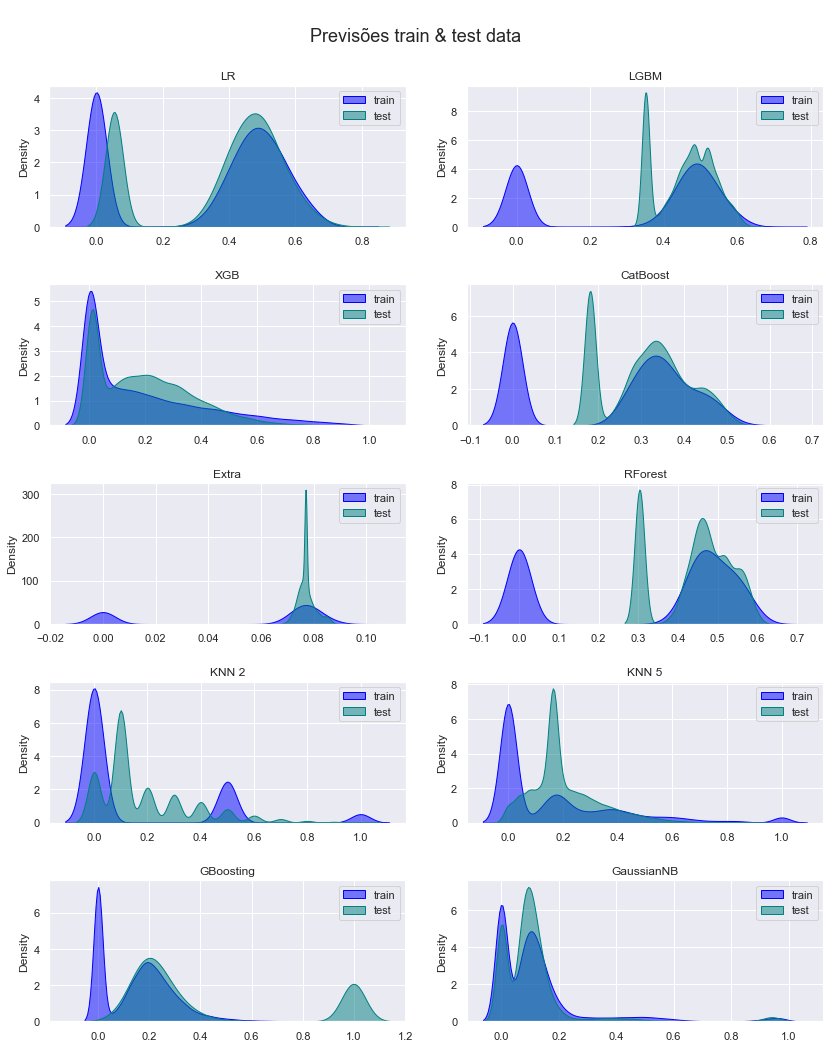

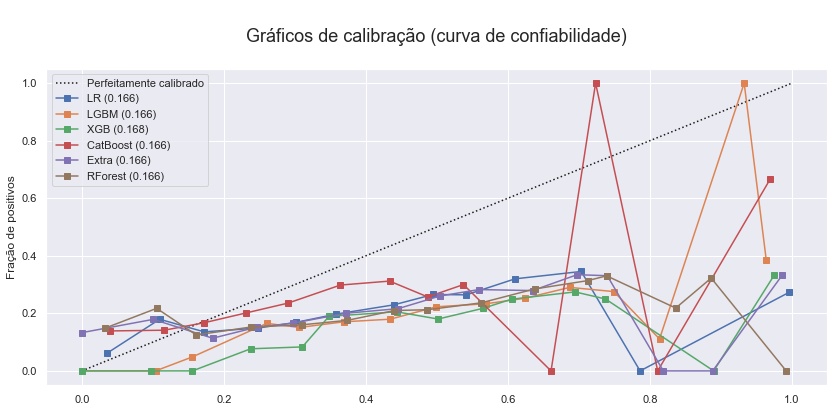

In [1025]:
mdl_name = df_pred_ts_mdl_none.columns
lines    = int(len(mdl_name)/2)
fig, ax  = plt.subplots(lines,2 ,figsize=(12,15))

for i,feature in enumerate(mdl_name):
    plt.subplot(lines,2,i+1)
    sns.kdeplot(df_pred_tr_mdl_none[feature],color='blue', alpha=0.5, label='train', shade=True)
    sns.kdeplot(df_pred_ts_mdl_none[feature] ,color='teal', alpha=0.5, label='test', shade=True)  
    plt.title(feature, fontsize=12)
    plt.xlabel('')
    plt.legend()
         
plt.suptitle('\nPrevisões train & test data', fontsize=18)
plt.tight_layout(pad=2.0)
plt.show();

mdl_list = [('LR', model_lr),
            ('LGBM', model_lgbm), 
            ('XGB', model_xgb), 
            ('CatBoost', model_cat),                          
            ('Extra', model_etc),                                           
            ('RForest', model_rf),
            #('KNN 2', model_knn_2),
            #('KNN 5', model_knn_5),
            #('GBoosting', model_gboosting),    
            #('GaussianNB', model_gaussianNB)
           ]

utility. calibrated_classifier_graf_model(mdl_list, X, y, figsize_=(14,9))

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Como podemos observar acima, os modelo são muitos ruins com baixa probalidade de acertar a classe positiva, todos os modelos tem a distribuição distorcida em relação as previsões no dados de teste, no gráfico de calibração observamos péssima calibração dos modelos.  <p> <b>
    
</div>

## 3.5. Modelo 2 - Ensamble (Média Ponderada)

In [1027]:
df_pred_tr_mdl_none.shape

(27135, 10)

In [1026]:
%%time 

feature_mdl      = df_pred_tr_mdl_none.columns.to_list()
myscores_mdl     = []
best_mdl_score_1 = []

for mdl_1 in feature_mdl:     
    f = feature_mdl.copy() 
    f.remove(mdl_1)
    for mdl_2 in f: 
        myscores    = {}
        best        = 0
        best_weight = 0

        for weight in range(100):
            weight /= 100
            score = get_oof_roc_score(df_          = df_pred_tr_mdl_none, 
                                      y_           = y,
                                      weight_      = weight, 
                                      pred_model1_ = mdl_1,  
                                      pred_model2_ = mdl_2)

            if np.round(score,5) > np.round(best,5):
                best        = score
                best_weight = weight                

            myscores[weight] = score
            
    best_mdl_score_1.append({'model_1' : mdl_1, 
                             'model_2' : mdl_2, 
                             'score'   : round(best, 5), 
                             'weight'  : best_weight})
        
    msg = 'Best Weight: {:2.5f} - Score: {:2.5f} => {} - {}'
    print(msg.format(best_weight, best, mdl_1, mdl_2))  
    
print()

ValueError: Found input variables with inconsistent numbers of samples: [26570, 27135]

In [79]:
best_weight = 0.99000
score       = 0.59052 
mdl_1       = 'LR'
mdl_2       = 'GaussianNB'
name_file   = mdl_1 + '_' + str(best_weight) +'_'+ mdl_2 +'_{:2.5f}.csv'.format(score) 
name_sub    = 'Data/submission/ensamble_' + name_file
df_submission[target] = (df_pred_ts_mdl_none[mdl_1]*best_weight)+(df_pred_ts_mdl_none[mdl_2]*(1-best_weight)) 
df_submission.to_csv(path + name_sub, index=False)

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Com <b>Ensamble (Média Ponderada)</b> tive uma melhoria nas submissões: 
    
- LR com  KNN 5: de 0.58572 para 0.58639; 
- RForest com KNN 5: de 0,57940 para 0.58399; 
- LR - GaussianNB: de 0.58693 para 0.58701. <p> <br>
    
</div>

## 3.4.2. Modelos 2 

Nesta parte do processo vamos gerar diversos modelo, porém vamos criar uma nova variável com as previsões de um segundo modelo, em outro notebook vamos reaproveitar essas previsões para gerar um stanking de segundo nível. 

In [81]:
mdl_list   = []
mdl_list_1 = [('LR', model_lr),
              ('LGBM', model_lgbm), 
              ('XGB', model_xgb), 
              ('CatBoost', model_cat),                          
              ('Extra', model_etc),                                           
              ('RForest', model_rf),
              ('KNN 2', model_knn_2),
              ('KNN 5', model_knn_5), 
              ('GBoosting', model_gboosting),    
              ('GaussianNB', model_gaussianNB)
             ]

for m_1 in mdl_list_1:     
    for m_2 in mdl_list_1:        
        name_models = '{} - {}'.format(m_1[0], m_2[0])
        moldes      = (name_models, m_1[1], m_2[1])
        mdl_list.append(moldes)
        #print(name_models)
        
overall_model = len(mdl_list)
print('Total de {} modelos.'.format(overall_model))

Total de 100 modelos.


Acima montamos as combinações dos modelos, além de gerar um dataset salvamos as previsões em arquivos.

In [82]:
%%time 
models       = [] 
preds_ts_2   = []
preds_oof_2  = []
f_columns_2  = []
list_score_2 = []

for i, mdl in enumerate(mdl_list): 
    col = mdl[0]    
    name_submission = col + '_{}'.format(overall_model)
    overall_model  -= 1
    model_pipeline  = Pipeline(steps=[
        ('preprocessor', preprocessor_1),
        #('sampler_over', over), 
        #('sampler_under', under),    
        ('variancethreshold', VarianceThreshold(threshold=0.1)),    
        ('selectpercentile', SelectPercentile(f_classif, percentile=90)), 
        ('model', mdl[1])
        ])

    m, p_ts, p_tr_oof, auc, f1 = \
        model_train(model_pipeline, 
                    X_               = X.copy(), 
                    y_               = y, 
                    X_ts_            = X_test.copy(),                    
                    type_            = 0,                     
                    model_feature_   = mdl[2], 
                    name_submission_ = name_submission, 
                    gera_submission_ = True, 
                    path_            = path , 
                    target_          = target, 
                    fold_            = 5,  
                    print_report_    = False, 
                    print_result_    = False
                   )

    f_columns_2.append(col)
    models.append(m)    
    preds_ts_2.append(p_ts)
    preds_oof_2.append(p_tr_oof)
   
    list_score_2.append({'model':col, 'auc':auc, 'f1': f1})
        
print()

df_pred_ts_mdl_feature = pd.DataFrame(preds_ts_2).T
df_pred_tr_mdl_feature = pd.DataFrame(preds_oof_2).T

df_pred_ts_mdl_feature.columns = f_columns_2 
df_pred_tr_mdl_feature.columns = f_columns_2 

df_score_2 = display(pd.DataFrame(list_score_2).sort_values(by='auc',ascending=False))
df_score_2

[Fold Mean]: AUC: 0.58992 - F1: 0.35328 - L.Log: 0.68021 => LogisticRegression -> LogisticRegression
[Fold Mean]: AUC: 0.58770 - F1: 0.34587 - L.Log: 0.68097 => LogisticRegression -> LGBMClassifier
[Fold Mean]: AUC: 0.51079 - F1: 0.20811 - L.Log: 0.93558 => LogisticRegression -> XGBClassifier
[Fold Mean]: AUC: 0.58977 - F1: 0.34642 - L.Log: 0.68044 => LogisticRegression -> CatBoostClassifier
[Fold Mean]: AUC: 0.58997 - F1: 0.35341 - L.Log: 0.68019 => LogisticRegression -> ExtraTreesClassifier
[Fold Mean]: AUC: 0.58866 - F1: 0.34814 - L.Log: 0.68087 => LogisticRegression -> RandomForestClassifier
[Fold Mean]: AUC: 0.57707 - F1: 0.13680 - L.Log: 0.92491 => LogisticRegression -> KNeighborsClassifier
[Fold Mean]: AUC: 0.54093 - F1: 0.25875 - L.Log: 1.38843 => LogisticRegression -> KNeighborsClassifier
[Fold Mean]: AUC: 0.58826 - F1: 0.32304 - L.Log: 0.69756 => LogisticRegression -> GradientBoostingClassifier
[Fold Mean]: AUC: 0.58980 - F1: 0.35306 - L.Log: 0.68027 => LogisticRegression -> 

[Fold Mean]: AUC: 0.55733 - F1: 0.03668 - L.Log: 0.52975 => GradientBoostingClassifier -> LGBMClassifier
[Fold Mean]: AUC: 0.51580 - F1: 0.21033 - L.Log: 1.22200 => GradientBoostingClassifier -> XGBClassifier
[Fold Mean]: AUC: 0.55819 - F1: 0.04318 - L.Log: 0.52874 => GradientBoostingClassifier -> CatBoostClassifier
[Fold Mean]: AUC: 0.56190 - F1: 0.03467 - L.Log: 0.52642 => GradientBoostingClassifier -> ExtraTreesClassifier
[Fold Mean]: AUC: 0.55889 - F1: 0.03584 - L.Log: 0.52869 => GradientBoostingClassifier -> RandomForestClassifier
[Fold Mean]: AUC: 0.54176 - F1: 0.13630 - L.Log: 0.90952 => GradientBoostingClassifier -> KNeighborsClassifier
[Fold Mean]: AUC: 0.53773 - F1: 0.12984 - L.Log: 3.76824 => GradientBoostingClassifier -> KNeighborsClassifier
[Fold Mean]: AUC: 0.55345 - F1: 0.04989 - L.Log: 0.57207 => GradientBoostingClassifier -> GradientBoostingClassifier
[Fold Mean]: AUC: 0.55964 - F1: 0.03270 - L.Log: 0.52734 => GradientBoostingClassifier -> GaussianNB
[Fold Mean]: AUC: 

model      auc       f1
4                LR - Extra  0.58997  0.35341
0                   LR - LR  0.58992  0.35328
34         CatBoost - Extra  0.58983  0.01452
9           LR - GaussianNB  0.58980  0.35306
3             LR - CatBoost  0.58977  0.34642
30            CatBoost - LR  0.58977  0.01180
39    CatBoost - GaussianNB  0.58963  0.03372
33      CatBoost - CatBoost  0.58886  0.13214
50             RForest - LR  0.58867  0.35020
5              LR - RForest  0.58866  0.34814
8            LR - GBoosting  0.58826  0.32304
54          RForest - Extra  0.58796  0.34699
59     RForest - GaussianNB  0.58775  0.34701
1                 LR - LGBM  0.58770  0.34587
53       RForest - CatBoost  0.58720  0.34572
40               Extra - LR  0.58701  0.00000
58      RForest - GBoosting  0.58644  0.32665
38     CatBoost - GBoosting  0.58629  0.04325
44            Extra - Extra  0.58624  0.00000
43         Extra - CatBoost  0.58584  0.00000
45          Extra - RForest  0.58560  0.00000
48        Extra - GBoosting  0.58478  0.00000
35       CatBoost - RForest  0.58403  0.01348
41             Extra - LGBM  0.58392  0.00000
19        LGBM - GaussianNB  0.58347  0.34556
49       Extra - GaussianNB  0.58347  0.00000
10                LGBM - LR  0.58313  0.34450
51           RForest - LGBM  0.58291  0.34570
31          CatBoost - LGBM  0.58283  0.01790
55        RForest - RForest  0.58265  0.34763
14             LGBM - Extra  0.58238  0.34463
13          LGBM - CatBoost  0.58171  0.34533
18         LGBM - GBoosting  0.58127  0.33933
90          GaussianNB - LR  0.58095  0.06834
95     GaussianNB - RForest  0.58072  0.06482
91        GaussianNB - LGBM  0.58012  0.06570
93    GaussianNB - CatBoost  0.57992  0.15364
99  GaussianNB - GaussianNB  0.57867  0.14360
94       GaussianNB - Extra  0.57865  0.06360
56          RForest - KNN 2  0.57744  0.13014
98   GaussianNB - GBoosting  0.57730  0.04199
6                LR - KNN 2  0.57707  0.13680
57          RForest - KNN 5  0.57662  0.25352
15           LGBM - RForest  0.57619  0.34589
47            Extra - KNN 5  0.57522  0.00000
36         CatBoost - KNN 2  0.57508  0.12862
46            Extra - KNN 2  0.57455  0.00000
11              LGBM - LGBM  0.57378  0.34359
42              Extra - XGB  0.57078  0.00000
96       GaussianNB - KNN 2  0.56877  0.12935
92         GaussianNB - XGB  0.56646  0.20349
84        GBoosting - Extra  0.56190  0.03467
52            RForest - XGB  0.56142  0.20286
80           GBoosting - LR  0.55979  0.03402
89   GBoosting - GaussianNB  0.55964  0.03270
85      GBoosting - RForest  0.55889  0.03584
83     GBoosting - CatBoost  0.55819  0.04318
81         GBoosting - LGBM  0.55733  0.03668
88    GBoosting - GBoosting  0.55345  0.04989
16             LGBM - KNN 2  0.55286  0.25339
37         CatBoost - KNN 5  0.54422  0.12145
86        GBoosting - KNN 2  0.54176  0.13630
7                LR - KNN 5  0.54093  0.25875
27              XGB - KNN 5  0.54071  0.18955
17             LGBM - KNN 5  0.53799  0.27335
87        GBoosting - KNN 5  0.53773  0.12984
97       GaussianNB - KNN 5  0.53699  0.14474
24              XGB - Extra  0.53611  0.17831
20                 XGB - LR  0.53486  0.18957
28          XGB - GBoosting  0.53420  0.18169
23           XGB - CatBoost  0.53407  0.18873
21               XGB - LGBM  0.53350  0.18390
29         XGB - GaussianNB  0.53178  0.18484
25            XGB - RForest  0.53125  0.18359
26              XGB - KNN 2  0.52564  0.16771
22                XGB - XGB  0.52164  0.20888
79       KNN 5 - GaussianNB  0.51654  0.13868
12               LGBM - XGB  0.51604  0.22146
32           CatBoost - XGB  0.51583  0.20205
82          GBoosting - XGB  0.51580  0.21033
73         KNN 5 - CatBoost  0.51564  0.14275
75          KNN 5 - RForest  0.51563  0.13278
71             KNN 5 - LGBM  0.51439  0.13757
70               KNN 5 - LR  0.51387  0.13092
74            KNN 5 - Extra  0.51344  0.13193
78        KNN 5 - GBoosting  0.51335  0.13470
72              KNN 

CPU times: total: 9h 52min 53s
Wall time: 3h 47min 6s


In [84]:
jb.dump(df_pred_tr_mdl_feature, 'Data/df_pred_tr_mdl_feature.pkl.z')
jb.dump(df_pred_ts_mdl_feature, 'Data/df_pred_ts_mdl_feature.pkl.z')     

['Data/df_pred_ts_mdl_feature.pkl.z']

In [86]:
df_pred_tr_mdl_feature = jb.load('Data/df_pred_tr_mdl_feature.pkl.z')
df_pred_ts_mdl_feature = jb.load('Data/df_pred_ts_mdl_feature.pkl.z')

In [87]:
snakecase   = lambda x: inflection.underscore(x)
cols_new    = list(map(snakecase,cols_train_old))
df1_train.columns = cols_new

NameError: name 'cols_train_old' is not defined

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Acima alguns modelos teve uma pequena melhoria com o acrescimento da nova variável como previsão, tanto nos teste e em algumas submissões, são eles: 
    
- Logistic Regression; 
- CatBoost;  
- LGBM; 
- KNN. <p> <br> 

Vamos da uma olhada no comportamento linear de alguns modelos. 
    
</div>    

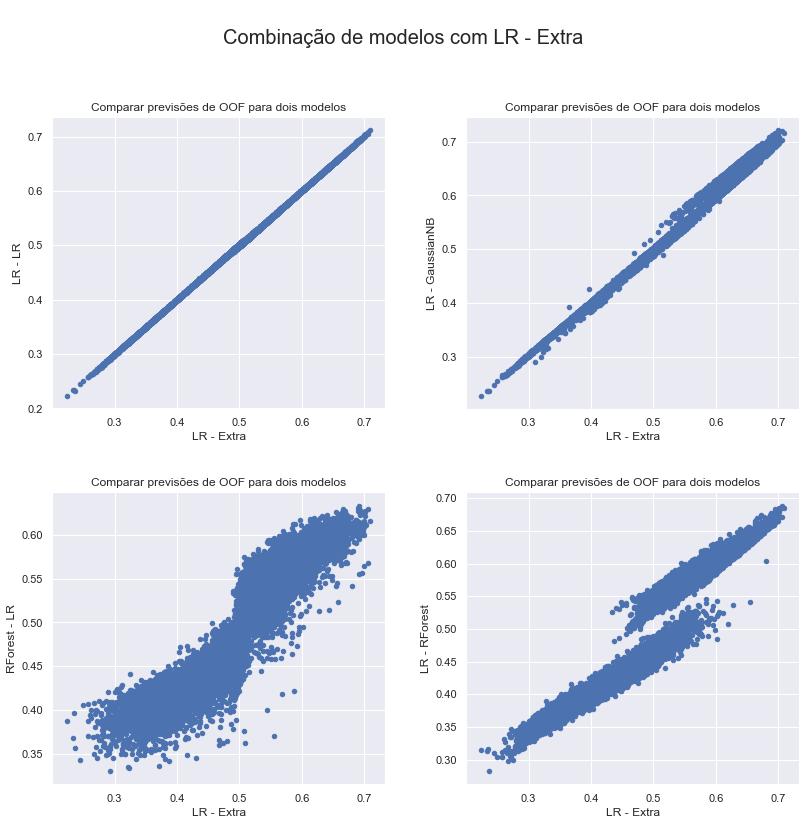

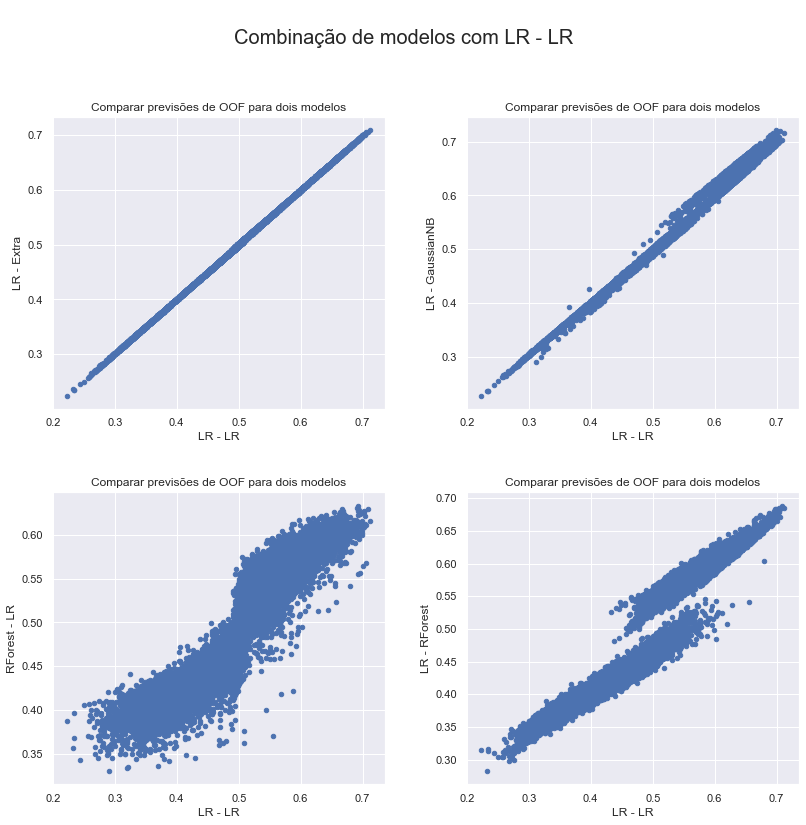

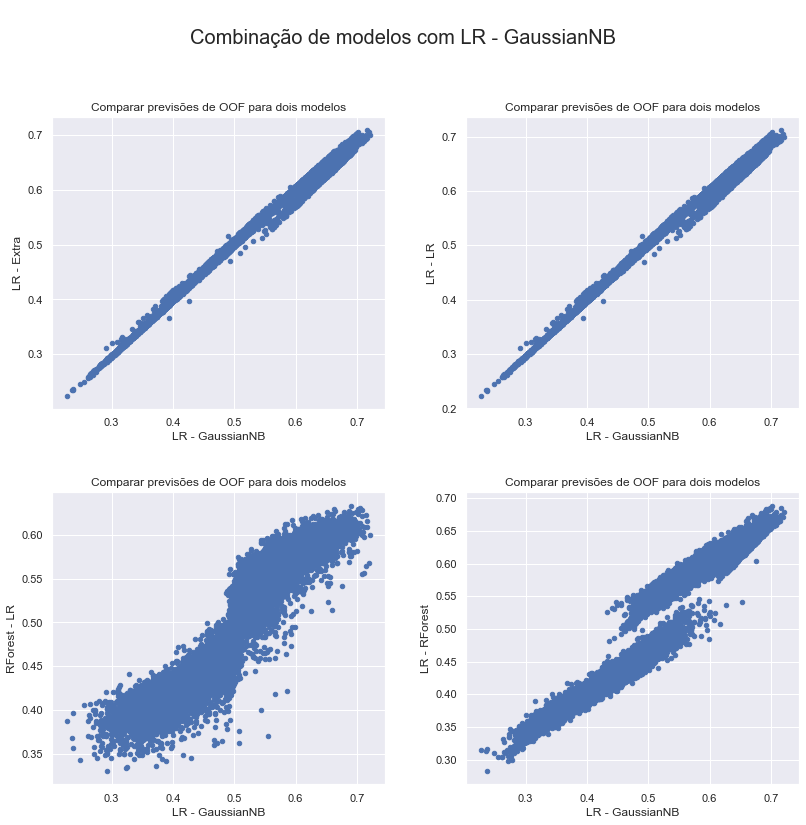

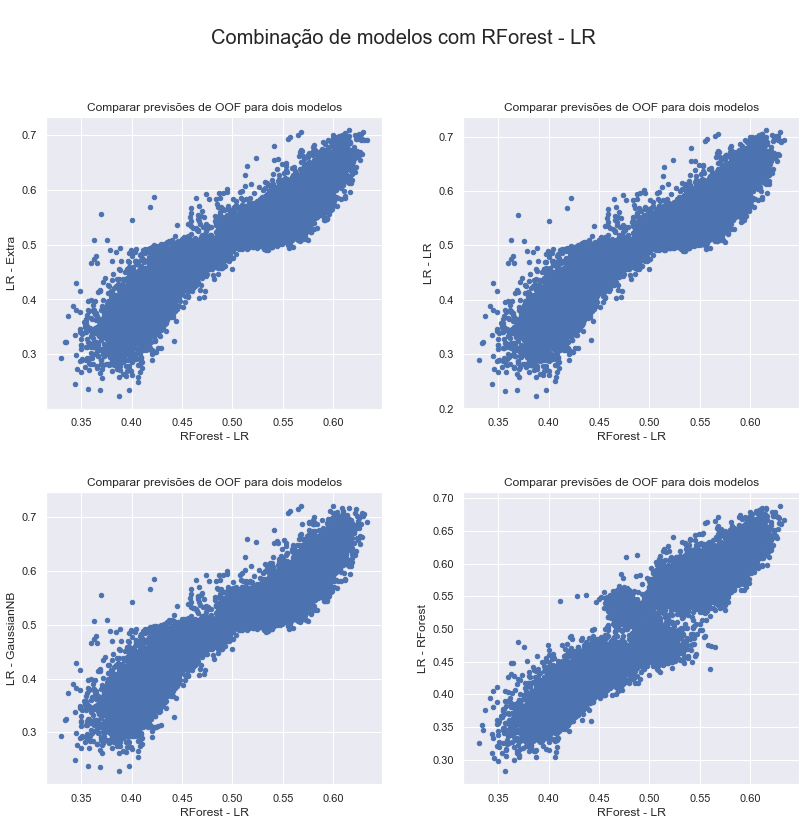

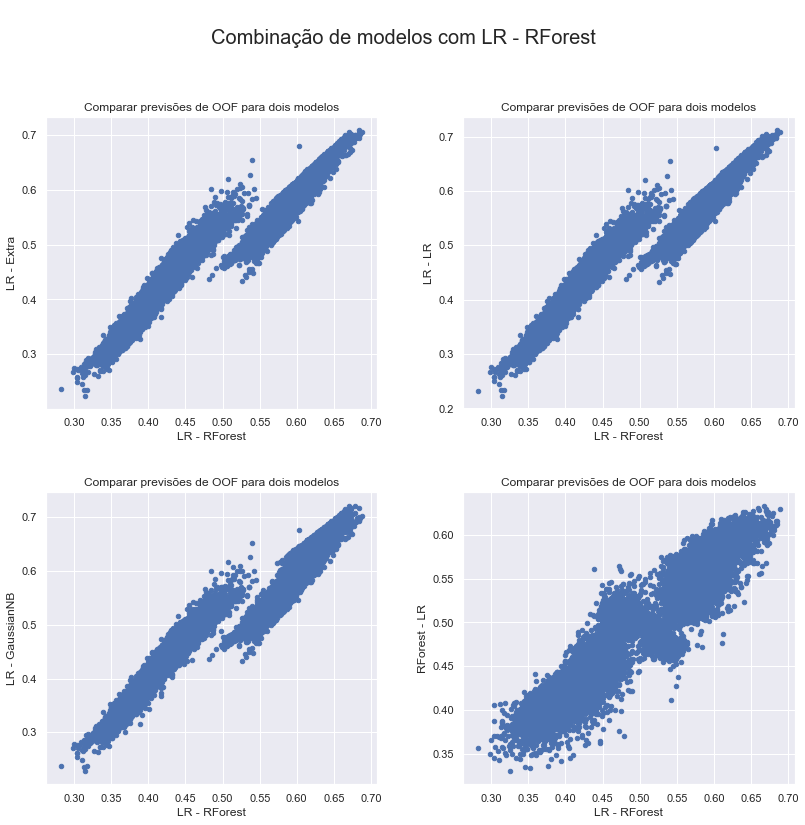

In [88]:
feature = pd.DataFrame(list_score_2).sort_values(by=['f1', 'auc',  ],ascending=False)\
          .head(5)['model'].values
feature = list(feature)
rows    = len(feature)-1
rows    = int(rows/2 if rows%2==0 else rows/2+1) 

for mdl in feature: 
    l       = 0 
    c       = 0 
    fig, ax = plt.subplots(rows, 2, figsize=(12, 12))
    f = feature.copy() 
    f.remove(mdl)
    for i, col in enumerate(f):        
        df_pred_tr_mdl_feature.plot(x     = mdl, 
                                     y     = col, 
                                     kind  = "scatter",
                                     title = "Comparar previsões de OOF para dois modelos", 
                                     ax    = ax[l][c])    
        c  = 1 if   c==0 else 0    
        l += 1 if i%2==1 else 0

    plt.suptitle('\nCombinação de modelos com {}'.format(mdl), fontsize=20)
    plt.tight_layout(pad=3.0)

<div class="alert alert-block alert-info">
<p style="color: black; font-family: Arial Black">NOTA:</p>

Observamos acima algumas padrões lineares na combinação de alguns modelos, sendo assim, vamos criar uma nova variável com a predição de modelo. 
    
</div>

## 3.6. Modelos 3 

In [411]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_1),        
    #('sampler_over',  over), 
    #('sampler_under', under), 
    #('VIF', reduce_VIF),     
    ('variancethreshold', VarianceThreshold(threshold=0.0)),    
    ('selectpercentile', SelectPercentile(f_classif, percentile=90))
])

tranform = preprocessor_1.fit(X, y)
X_       = tranform.transform(X)
X_test_  = tranform.transform(X_test)

cols = []
for i in range(X_.shape[1]):
    cols.append('feature_' + str(i))
    
X_      = pd.DataFrame(X_, columns=cols)
X_test_ = pd.DataFrame(X_test_, columns=cols)

X_       = pd.concat([X_, df_pred_tr_mdl_feature], axis=1)
X_test_  = pd.concat([X_test_, df_pred_ts_mdl_feature], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X_, y, 
                                                  test_size = .1, 
                                                  shuffle   = True, 
                                                  stratify  = y )

X_train.shape

(23913, 119)

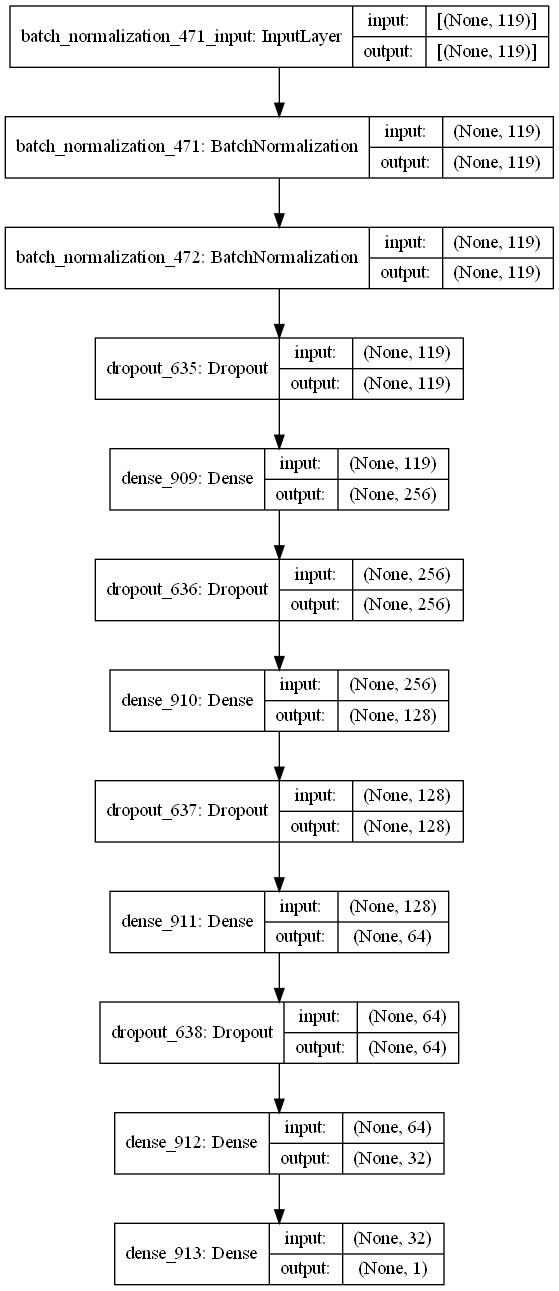

In [449]:
tf.random.set_seed(seed)



model_keras_ = keras.Sequential([
    
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    
    layers.Dense(512, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(512, activation='swish'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='swish'),
    layers.BatchNormalization(),
    
    layers.Dense(1, activation='sigmoid'),
])

    
model_keras = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    #layers.Dense(1024, activation="relu"),
    layers.BatchNormalization(),
    #layers.Dropout(0.6),
    #layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    #layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") 
])
    
    


reduce_lr      = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3 ,patience=4)
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/10))

model_keras.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(lr=0.0007),
                  metrics=["AUC"])
#


early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    # monitor='val_auc',
    restore_best_weights=True,
)

early_stopping = callbacks.EarlyStopping(monitor="val_loss",
                                         patience=15,
                                         restore_best_weights=True)

keras.utils.plot_model(model_keras, show_shapes=True)


Epoch 1/200
748/748 [==============================] - 6s 9ms/step - loss: 0.5109 - auc: 0.5813 - val_loss: 0.5090 - val_auc: 0.5960
Epoch 2/200
748/748 [==============================] - 6s 9ms/step - loss: 0.5106 - auc: 0.5836 - val_loss: 0.5097 - val_auc: 0.5891
Epoch 3/200
748/748 [==============================] - 6s 8ms/step - loss: 0.5108 - auc: 0.5823 - val_loss: 0.5084 - val_auc: 0.5972
Epoch 4/200
748/748 [==============================] - 6s 8ms/step - loss: 0.5112 - auc: 0.5806 - val_loss: 0.5118 - val_auc: 0.5804
Epoch 5/200
748/748 [==============================] - 6s 9ms/step - loss: 0.5104 - auc: 0.5833 - val_loss: 0.5109 - val_auc: 0.5875
Epoch 6/200
748/748 [==============================] - 6s 9ms/step - loss: 0.5105 - auc: 0.5827 - val_loss: 0.5106 - val_auc: 0.5915
Epoch 7/200
748/748 [==============================] - 6s 8ms/step - loss: 0.5113 - auc: 0.5792 - val_loss: 0.5098 - val_auc: 0.5943
Epoch 8/200
748/748 [==============================] - 7s 9ms/step - 

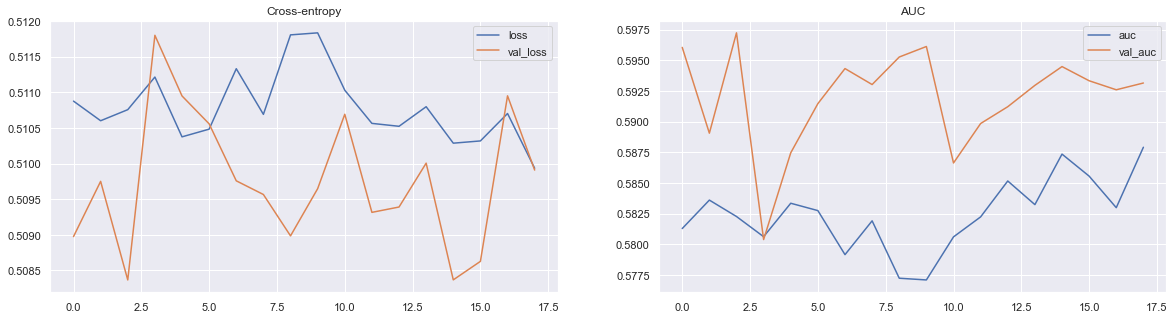

In [457]:

neg = y.shape[0]/y.value_counts()[0]
pos = y.shape[0]/y.value_counts()[1]

class_weights = {0:neg, 1:pos}

history = model_keras.fit(X_train,
                       y_train,
                       epochs          = 200,
                       batch_size      = 32,
                       callbacks       = [early_stopping],
                       validation_data = (X_val, y_val), 
                       #class_weight    = class_weights 
                      )

df_history = pd.DataFrame(history.history)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(df_history [['loss', 'val_loss']], label=['loss', 'val_loss'])
plt.title('Cross-entropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_history [['auc', 'val_auc']], label=['auc', 'val_auc'])
plt.title('AUC')
plt.legend()
plt.show();

In [460]:
# https://www.kaggle.com/code/mehrankazeminia/tps22aug-logisticr-lgbm-keras
print('VAL_ROC-AUC:', history.history['val_auc'][-1])
# VAL_ROC-AUC: 0.5870844721794128

VAL_ROC-AUC: 0.593144953250885


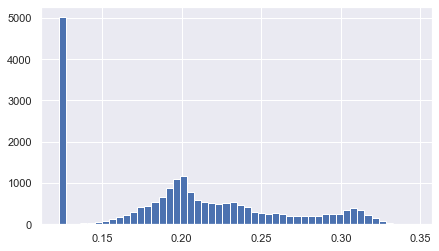

In [461]:
pred_keras = model_keras.predict(X_test_)

sns.set()
plt.figure(figsize=(7,4))
plt.hist(pred_keras, bins=50)
pred_keras, min(pred_keras), max(pred_keras);

In [463]:
y_pred_val = model_keras.predict(X_val)
f1_score(y_val, (y_pred_val).astype(int))

0.0

In [464]:
df_submission[target] = pred_keras
df_submission.to_csv(path + 'Data/submission/kera.csv', index=False)

In [ ]:
# https://www.kaggle.com/code/ffisegydd/sklearn-multicollinearity-class
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=False, impute_strategy="median"):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh

        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print("ReduceVIF fit")
        if hasattr(self, "imputer"):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print("ReduceVIF transform")
        columns = X.columns.tolist()
        if hasattr(self, "imputer"):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        iter = 0
        dropped = True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [
                variance_inflation_factor(X[variables].values, X.columns.get_loc(var))
                for var in X.columns
            ]
            # remove the last value from the list which is for the added intercept column
            ###            del vif[-1]
            iter = iter + 1
            print("\n Iteration %d:" % iter)
            print(vif)

            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(
                    "Dropping {maxx} with vif = {max_vif}".format(
                        maxx=X.columns[maxloc], max_vif=max_vif
                    )
                )
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped = True
            else:
                print(
                    "No VIF values were above the threshold in this iteration. Done!\n"
                )
        return X

In [ ]:
# https://www.kaggle.com/code/cabaxiom/tps-aug-22-eda-logistic-regression-baseline
# https://www.kaggle.com/code/ashaykatrojwar/tps-aug-neural-network-and-eda
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 4. ANÁLISE DAS PREVISÕES </h1>    
</div>

Vamos recupera as previsões realizadas nos processo de modelagem que foram gerados pelos modelos. 

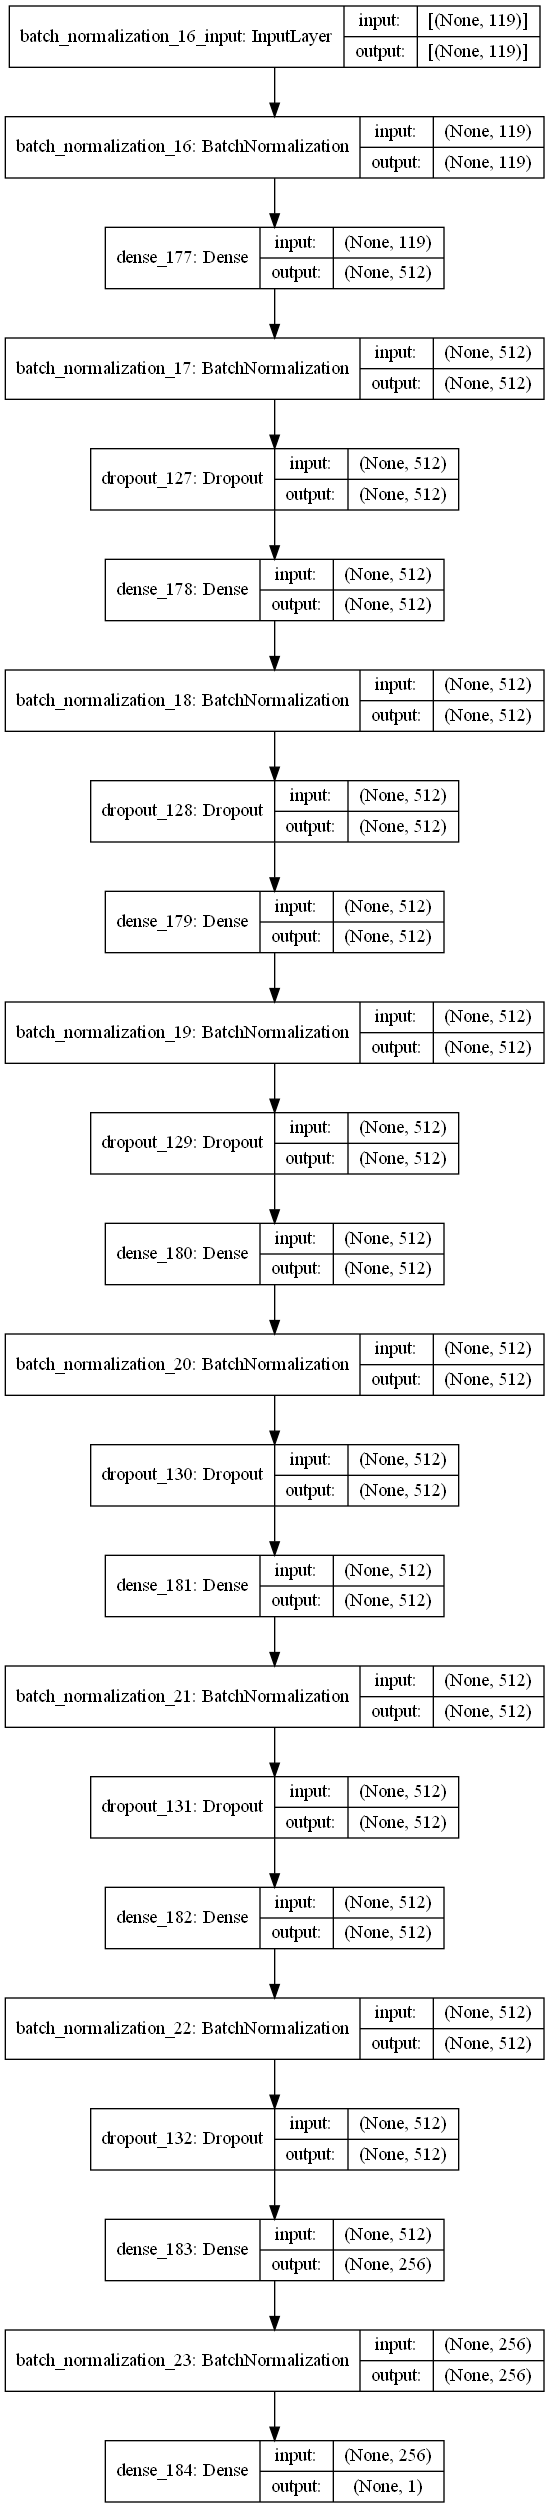

In [246]:
keras.utils.plot_model(model_keras, show_shapes=True)

In [250]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    #monitor='val_auc',
    restore_best_weights=True,
)

early_stopping = callbacks.EarlyStopping(monitor="val_loss",patience=15,restore_best_weights=True)
#reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3 ,patience=4)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

Epoch 1/20
52/52 [==============================] - 3s 30ms/step - loss: 1.4780 - auc: 0.5598 - val_loss: 0.9245 - val_auc: 0.5789- loss: 1.5304 - auc: 0.5 - ETA: 0s - loss: 1.5104 - auc: 0
Epoch 2/20
52/52 [==============================] - 1s 27ms/step - loss: 1.3803 - auc: 0.5890 - val_loss: 0.7227 - val_auc: 0.5687
Epoch 3/20
52/52 [==============================] - 1s 27ms/step - loss: 1.3733 - auc: 0.5985 - val_loss: 0.7516 - val_auc: 0.5826
Epoch 4/20
52/52 [==============================] - 1s 27ms/step - loss: 1.3482 - auc: 0.6134 - val_loss: 0.7038 - val_auc: 0.5667
Epoch 5/20
52/52 [==============================] - 1s 26ms/step - loss: 1.3464 - auc: 0.6195 - val_loss: 0.7063 - val_auc: 0.5749
Epoch 6/20
52/52 [==============================] - 1s 27ms/step - loss: 1.3464 - auc: 0.6215 - val_loss: 0.6882 - val_auc: 0.5724 0s - loss: 1.3308 - auc:  - ETA: 0s - loss: 1.3453 - auc: 0.62
Epoch 7/20
52/52 [==============================] - 1s 27ms/step - loss: 1.3376 - auc: 0.633

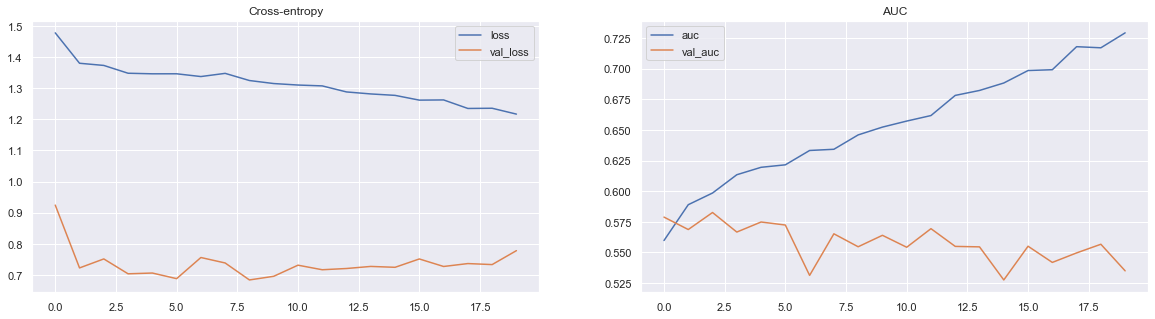

In [251]:
history = model_keras.fit(X_train, 
                          y_train,
                          validation_data = (X_val, y_val),
                          batch_size      = 256,
                          epochs          = 20,
                          callbacks       = [early_stopping], class_weight=class_weights)


df_history = pd.DataFrame(history.history)

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(df_history [['loss', 'val_loss']], label=['loss', 'val_loss'])
plt.title('Cross-entropy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_history [['auc', 'val_auc']], label=['auc', 'val_auc'])
plt.title('AUC')
plt.legend()

plt.show();

### 3.4.1.1. Feature Importance

In [ ]:
def return_feature_pipiline(model_, feature_float_):
    # https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
    # https://stackoverflow.com/questions/53413701/feature-importance-using-lightgbm

    feature_imp_values = model_.named_steps['model'].feature_importances_
    onehot_columns     = model_.named_steps['preprocessor'] \
                          .named_transformers_['cat'].named_steps['onehot'] \
                          .get_feature_names(input_features=feature_cat)
    return feature_float_ + list(onehot_columns)    

In [ ]:
def feature_importances_pipiline(model_, feature_float_, num_=500, name_model_=''):
    
    # https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
    # https://stackoverflow.com/questions/53413701/feature-importance-using-lightgbm

    feature_imp_values = model_.named_steps['model'].feature_importances_
    onehot_columns     = model_.named_steps['preprocessor'] \
                          .named_transformers_['cat'].named_steps['onehot'] \
                          .get_feature_names(input_features=feature_cat)

    df_feature_imp     = pd.DataFrame({'Feature': np.array(feature_float_ + list(onehot_columns)), 
                                       'Value'  : feature_imp_values})
    
    df_feature_imp.sort_values(by="Value", ascending=False, inplace=True)
    
    plt.figure(figsize=(20, 30))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=df_feature_imp[0:num_])
    plt.title('\nFeature Importance {} \n'.format(name_model_), fontsize=17)
    plt.tight_layout()
    #plt.savefig('lgbm_importances-01.png')
    plt.show()

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor="val_loss",patience=15,restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3 ,patience=4)

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/10))

model_14.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.0007),
                 metrics=["AUC"])

history = model_14.fit(X_train,
                       y_train,
                       epochs=200,
                       callbacks=[early_stopping],
                       validation_data=(X_test, y_test))

In [ ]:
feature_importance = FeatureImportance(models[0]) 
feature_importance.plot(top_n_features=41)

In [ ]:
# https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/ 
# https://machinelearningmastery.com/divergence-between-probability-distributions/


<div style="color:white;border-radius:8px;background-color:#a7d5ed">    
    <h1 style="padding:12px;color:black;"> 5. CONCLUSÃO </h1>    
</div>

# Referências: 

- [@pietromaldini1](https://www.kaggle.com/code/pietromaldini1/standing-on-the-head-of-giants-nn-optuna) 
 